In [22]:
import numpy as np
import pandas as pd
import math
import pandas
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Activation
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
from sklearn.utils import resample
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [24]:
node_list = pd.read_csv("data_new/nodes_list.csv",header = None)

In [25]:
node_list.head()

0
0  S1104119072
1  S1178185427
2  S1335949845
3  S1439953467
4  S1644405637

In [26]:
len(node_list)

200

In [27]:
len(node_list)

200

In [28]:
def normalize_moments(dataset):
    moments = np.zeros(2)
    moments[0] = dataset.mean()
    moments[1] = dataset.std()
    print(moments[0],moments[1])
    return moments

def normalize_fit(dataset,moments):
    dataset = (dataset-moments[0])/moments[1]
    return dataset

def normalize_invert(dataset,moments):
    dataset = dataset*moments[1]+moments[0]
    return dataset

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1,predict_len = 1):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back,predict_len):
            a = dataset[i:(i+look_back), 0]
            b = dataset[(i + look_back):(i+look_back+predict_len), 0]
            dataX.append(a)
            dataY.append(b)
    return np.array(dataX), np.array(dataY) 

def evaluation(predict,original):
    ae = np.abs(predict - original)
    se = ae**2
    #index = (original!=0)
    ape = np.abs(ae/original)
    ape[ape == -np.inf] = np.NaN
    ape[ape == np.inf] = np.NaN
    #print(ape)

    mae = np.nanmean(ae)
    rmse = np.sqrt(np.nanmean(se))
    mape = np.nanmean(ape)

#     plt.figure(figsize=(10,3))
#     plt.subplot(121)
#     plt.plot(np.mean(ae,axis = 0),label ='MAE varying according to days')
#     plt.legend()
#     #plt.show();
#     plt.subplot(122)
#     plt.plot(np.mean(ae,axis = 1),label ='MAE varying according to hours')
#     plt.legend()
#     plt.show();   

#     plt.figure(figsize=(10,3))
#     plt.subplot(121)
#     plt.plot(np.sqrt(np.mean(se,axis = 0)),label = 'RMSE varying according to days')
#     plt.legend()
#     #plt.show();

#     plt.subplot(122)
#     plt.plot(np.sqrt(np.mean(se,axis = 1)),label = 'RMSE varying according to hours')
#     plt.legend()
#     plt.show(); 

#     plt.figure(figsize=(10,3))
#     plt.subplot(121)
#     plt.plot(np.nanmean(ape,axis = 0),label = 'MAPE varying according to days')
#     plt.legend()
#     #plt.show(); 

#     plt.subplot(122)
#     plt.plot(np.nanmean(ape,axis = 1),label = 'MAPE varying according to hours')
#     plt.legend()
#     #plt.tight_layout()
#     plt.show();    

    return mae,rmse,mape


array([  487.14  ,   102.06  ,     3.0369, ..., -1051.5   , -1121.9   ,
       -1143.6   ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.9385945869373507 796.8797981631905


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.6124871 , 0.12925236, 0.00498883, 0.37506108, 0.53691736,
       0.66284601, 0.60125579])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - ETA: 0s - loss: 1.144 - 1s 2ms/step - loss: 1.1276 - val_loss: 1.5332
Epoch 2/50
459/459 [==============================] - 0s 181us/step - loss: 0.9283 - val_loss: 1.5236
Epoch 3/50
459/459 [==============================] - 0s 174us/step - loss: 0.9133 - val_loss: 1.5246
Epoch 4/50
459/459 [==============================] - 0s 182us/step - loss: 0.9120 - val_loss: 1.5249
Epoch 5/50
459/459 [==============================] - 0s 173us/step - loss: 0.9107 - val_loss: 1.5212
Epoch 6/50
459/459 [==============================] - 0s 185us/step - loss: 0.9048 - val_loss: 1.5098
Epoch 7/50
459/459 [==============================] - 0s 271us/step - loss: 0.9082 - val_loss: 1.5033
Epoch 8/50
459/459 [==============================] - 0s 228us/step - loss: 0.9104 - val_loss: 1.5063
Epoch 9/50
459/459 [==============================] - 0s 221us/step - loss: 0.9038 - val_loss: 1.5056
Epoch 10/50
459

> Training Time :  5.9588563442230225 s
dict_keys(['val_loss', 'loss'])


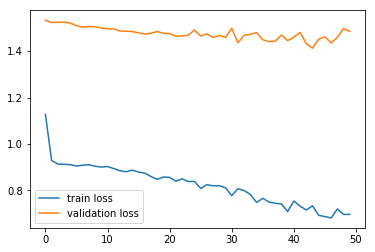

(541, 24)

(61, 24)

/Users/wangshuaizhandouji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


1trainFARCNN   2trainFAR  3testFARCNN     4testFAR
S1104119072                                                    
MAE            491.143670  581.890799  1006.360547   986.779569
RMSE           686.500431  798.931589  1293.957375  1248.955260
MAPE            10.025536   10.566129     1.208531     1.187602

array([21.901 , 11.681 , 10.806 , ..., 13.955 ,  5.102 ,  2.4136])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6475123341012774 30.004275205214057


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.75150998,  0.41089186,  0.38172935,  0.19686902,  0.0555325 ,
       -0.26998445, -0.12140562])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 5.2711
Epoch 2/50
459/459 [==============================] - 0s 219us/step - loss: 0.2921 - val_loss: 5.0663
Epoch 3/50
459/459 [==============================] - 0s 202us/step - loss: 0.2838 - val_loss: 5.0941
Epoch 4/50
459/459 [==============================] - 0s 238us/step - loss: 0.2830 - val_loss: 5.1453
Epoch 5/50
459/459 [==============================] - 0s 213us/step - loss: 0.2781 - val_loss: 5.1086
Epoch 6/50
459/459 [==============================] - 0s 205us/step - loss: 0.2747 - val_loss: 5.0953
Epoch 7/50
459/459 [==============================] - 0s 245us/step - loss: 0.2677 - val_loss: 5.0805
Epoch 8/50
459/459 [==============================] - 0s 213us/step - loss: 0.2646 - val_loss: 5.1410
Epoch 9/50
459/459 [==============================] - 0s 215us/step - loss: 0.2606 - val_loss: 5.0798
Epoch 10/50
459/459 [==================

> Training Time :  6.757163047790527 s
dict_keys(['val_loss', 'loss'])


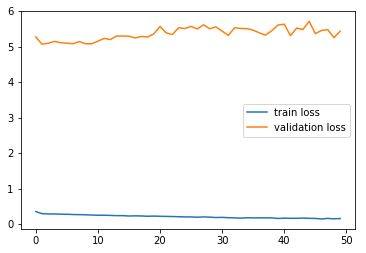

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S1178185427                                                 
MAE              8.929797  12.033358     9.654656  10.502967
RMSE            28.791663  30.133764    12.532190  13.417805
MAPE             1.197077   2.079053     0.133625   0.143974

array([ -3.4585,  -3.1874,  -3.2314, ...,  -8.3723, -10.308 ,  -5.4098])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.3466316607892335 21.252635654198073


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.1464227 , -0.13366664, -0.13573697, -0.0716555 ,  0.03625441,
       -0.03032981,  0.04721728])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: 1.1467 - val_loss: 1.2363
Epoch 2/50
459/459 [==============================] - 0s 210us/step - loss: 0.9747 - val_loss: 1.2224
Epoch 3/50
459/459 [==============================] - 0s 202us/step - loss: 0.9567 - val_loss: 1.2109
Epoch 4/50
459/459 [==============================] - 0s 167us/step - loss: 0.9572 - val_loss: 1.1982
Epoch 5/50
459/459 [==============================] - 0s 173us/step - loss: 0.9489 - val_loss: 1.1827
Epoch 6/50
459/459 [==============================] - 0s 203us/step - loss: 0.9388 - val_loss: 1.1629
Epoch 7/50
459/459 [==============================] - 0s 187us/step - loss: 0.9190 - val_loss: 1.1416
Epoch 8/50
459/459 [==============================] - 0s 194us/step - loss: 0.9171 - val_loss: 1.1140
Epoch 9/50
459/459 [==============================] - 0s 193us/step - loss: 0.8880 - val_loss: 1.0791
Epoch 10/50
459/459 [==================

> Training Time :  6.255184173583984 s
dict_keys(['val_loss', 'loss'])


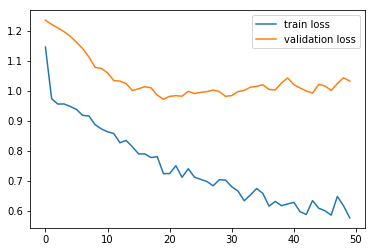

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S1335949845                                                 
MAE             11.696355  15.434657    12.467597  13.995592
RMSE            15.949812  21.328985    17.013797  19.390383
MAPE             0.068384   0.090367     0.061043   0.069273

array([ 499.27,  709.31,  660.19, ..., -251.72, -237.49, -238.43])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.11270705253953592 455.1007326480283


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.09730148, 1.55882568, 1.45089353, 1.51415425, 1.60239845,
       1.3913243 , 1.33452369])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 3ms/step - loss: 1.0785 - val_loss: 1.5024
Epoch 2/50
459/459 [==============================] - 0s 257us/step - loss: 0.9062 - val_loss: 1.4977
Epoch 3/50
459/459 [==============================] - 0s 241us/step - loss: 0.8913 - val_loss: 1.4928
Epoch 4/50
459/459 [==============================] - 0s 236us/step - loss: 0.8885 - val_loss: 1.4808
Epoch 5/50
459/459 [==============================] - 0s 205us/step - loss: 0.8802 - val_loss: 1.4751
Epoch 6/50
459/459 [==============================] - 0s 226us/step - loss: 0.8641 - val_loss: 1.4645
Epoch 7/50
459/459 [==============================] - 0s 234us/step - loss: 0.8579 - val_loss: 1.4547
Epoch 8/50
459/459 [==============================] - 0s 193us/step - loss: 0.8634 - val_loss: 1.4469
Epoch 9/50
459/459 [==============================] - 0s 188us/step - loss: 0.8307 - val_loss: 1.4555
Epoch 10/50
459/459 [==================

> Training Time :  7.459449052810669 s
dict_keys(['val_loss', 'loss'])


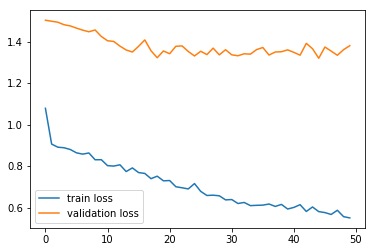

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
S1439953467                                                   
MAE            253.555331  332.060700   362.699671  363.301257
RMSE           353.753287  454.742156   482.002755  468.368388
MAPE             0.099730    0.130432     0.076289    0.077435

array([-57.793 ,  -8.656 ,  96.567 , ...,  10.03  ,  13.529 ,   4.6297])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-6.255755698296841 732.3382095967431


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.07037356, -0.00327751,  0.14040337,  0.04806762,  0.08653072,
        0.05867338,  0.05578537])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: 1.2763 - val_loss: 0.7522
Epoch 2/50
459/459 [==============================] - 0s 254us/step - loss: 1.0925 - val_loss: 0.7503
Epoch 3/50
459/459 [==============================] - 0s 223us/step - loss: 1.0712 - val_loss: 0.7375
Epoch 4/50
459/459 [==============================] - 0s 231us/step - loss: 1.0675 - val_loss: 0.7346
Epoch 5/50
459/459 [==============================] - 0s 271us/step - loss: 1.0683 - val_loss: 0.7317
Epoch 6/50
459/459 [==============================] - 0s 174us/step - loss: 1.0630 - val_loss: 0.7325
Epoch 7/50
459/459 [==============================] - 0s 175us/step - loss: 1.0640 - val_loss: 0.7329
Epoch 8/50
459/459 [==============================] - 0s 193us/step - loss: 1.0490 - val_loss: 0.7365
Epoch 9/50
459/459 [==============================] - 0s 223us/step - loss: 1.0591 - val_loss: 0.7343
Epoch 10/50
459/459 [==================

> Training Time :  6.426602125167847 s
dict_keys(['val_loss', 'loss'])


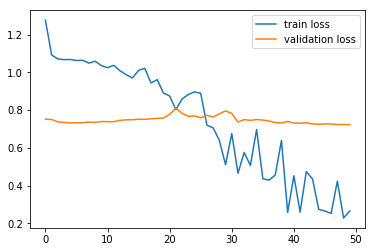

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
S1644405637                                                   
MAE            134.432512  155.840858    68.222257   66.486452
RMSE           413.736769  737.040522   122.511098  121.213150
MAPE             0.244971    0.230131     0.125340    0.124182

array([ -10.258,  -70.326,  -65.552, ...,  -50.85 ,  -76.388, -122.49 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 201us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 212us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 194us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 187us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 192us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 214us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 179us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 203us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 186us/step - loss: nan - val_loss: 

> Training Time :  5.785535097122192 s
dict_keys(['val_loss', 'loss'])


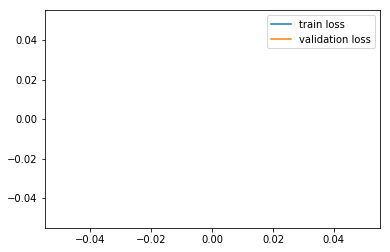

(541, 24)

(61, 24)

/Users/wangshuaizhandouji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/Users/wangshuaizhandouji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/Users/wangshuaizhandouji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/wangshuaizhandouji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
S1808912375                                                   
MAE                   NaN  260.764849          NaN  333.661352
RMSE                  NaN  476.517156          NaN  539.152025
MAPE                  NaN   26.474153          NaN    0.586085

array([454.89, 309.72, 267.76, ..., 264.81, 269.25, 178.41])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

8.030100093978104 369.8022300959421


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.20837535, 0.81581417, 0.70234812, 0.68874625, 0.72376497,
       0.8231965 , 0.96551581])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 3ms/step - loss: 1.1413 - val_loss: 1.3705
Epoch 2/50
459/459 [==============================] - 0s 193us/step - loss: 0.9267 - val_loss: 1.3627
Epoch 3/50
459/459 [==============================] - 0s 177us/step - loss: 0.9076 - val_loss: 1.3479
Epoch 4/50
459/459 [==============================] - 0s 243us/step - loss: 0.8819 - val_loss: 1.3037
Epoch 5/50
459/459 [==============================] - 0s 198us/step - loss: 0.8741 - val_loss: 1.2706
Epoch 6/50
459/459 [==============================] - 0s 220us/step - loss: 0.8596 - val_loss: 1.2569
Epoch 7/50
459/459 [==============================] - 0s 241us/step - loss: 0.8225 - val_loss: 1.2318
Epoch 8/50
459/459 [==============================] - 0s 216us/step - loss: 0.8042 - val_loss: 1.1876
Epoch 9/50
459/459 [==============================] - 0s 237us/step - loss: 0.7766 - val_loss: 1.1691
Epoch 10/50
459/459 [==================

> Training Time :  6.949602842330933 s
dict_keys(['val_loss', 'loss'])


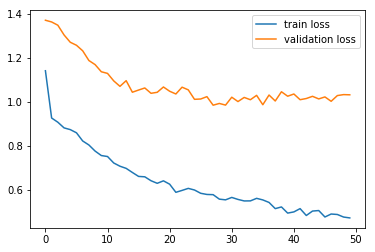

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
S1808946565                                                   
MAE            189.074126  280.431222   250.663432  284.241551
RMSE           254.392719  370.110879   322.022410  361.703861
MAPE             1.793738    4.149144     0.330457    0.363345

array([ 407.32,  671.31,  679.23, ..., 2244.6 , 2222.3 , 2293.5 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

11.527775373722625 1163.0502141468908


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.34030536, 0.5672861 , 0.57409578, 0.53500031, 0.56293547,
       0.51231857, 0.55810335])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 3ms/step - loss: 1.0857 - val_loss: 1.7168
Epoch 2/50
459/459 [==============================] - 0s 200us/step - loss: 0.8882 - val_loss: 1.7112
Epoch 3/50
459/459 [==============================] - 0s 292us/step - loss: 0.8714 - val_loss: 1.7165
Epoch 4/50
459/459 [==============================] - 0s 192us/step - loss: 0.8655 - val_loss: 1.7143
Epoch 5/50
459/459 [==============================] - 0s 197us/step - loss: 0.8722 - val_loss: 1.7144
Epoch 6/50
459/459 [==============================] - 0s 214us/step - loss: 0.8645 - val_loss: 1.7094
Epoch 7/50
459/459 [==============================] - 0s 194us/step - loss: 0.8650 - val_loss: 1.7083
Epoch 8/50
459/459 [==============================] - 0s 220us/step - loss: 0.8605 - val_loss: 1.7008
Epoch 9/50
459/459 [==============================] - 0s 230us/step - loss: 0.8653 - val_loss: 1.6940
Epoch 10/50
459/459 [==================

> Training Time :  6.122692108154297 s
dict_keys(['val_loss', 'loss'])


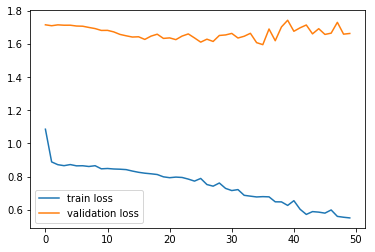

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN    4testFAR
S1827173160                                                    
MAE            537.511580   705.850911   682.085873  629.022309
RMSE           933.424534  1163.576259  1043.965603  998.077780
MAPE             3.091934     3.492078     0.249842    0.224607

array([ -365.75,   179.02,   191.01, ..., -1238.5 , -1165.1 , -1141.3 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-44.68457368385033 2680.4207217371886


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.11978173,  0.08345875,  0.08793193,  0.05513857, -0.00131227,
       -0.04567769, -0.02097261])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: 0.8529 - val_loss: 2.8794
Epoch 2/50
459/459 [==============================] - 0s 290us/step - loss: 0.7066 - val_loss: 2.8015
Epoch 3/50
459/459 [==============================] - 0s 231us/step - loss: 0.6918 - val_loss: 2.7848
Epoch 4/50
459/459 [==============================] - 0s 197us/step - loss: 0.6846 - val_loss: 2.7805
Epoch 5/50
459/459 [==============================] - 0s 173us/step - loss: 0.6874 - val_loss: 2.7714
Epoch 6/50
459/459 [==============================] - 0s 166us/step - loss: 0.6865 - val_loss: 2.7671
Epoch 7/50
459/459 [==============================] - 0s 191us/step - loss: 0.6842 - val_loss: 2.7782
Epoch 8/50
459/459 [==============================] - 0s 178us/step - loss: 0.6819 - val_loss: 2.7810
Epoch 9/50
459/459 [==============================] - 0s 172us/step - loss: 0.6793 - val_loss: 2.7735
Epoch 10/50
459/459 [==================

> Training Time :  6.974606990814209 s
dict_keys(['val_loss', 'loss'])


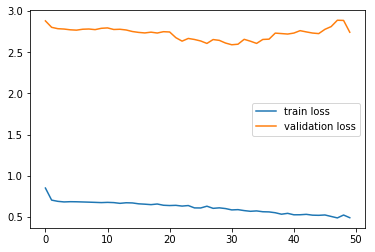

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S1877081582                                                     
MAE           1679.195571  1975.128487  1658.688109  1543.321506
RMSE          2379.271217  2691.157268  2060.256011  1959.347243
MAPE           220.570367   289.032831     0.253380     0.238159

array([ -79.596  ,  -86.149  ,   -0.72278, ..., -266.09   , -245.32   ,
       -131.28   ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-31.448447157998785 1016.2598285311262


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.04737721, -0.05382536,  0.03023407,  0.04009343,  0.08212511,
       -0.05752422, -0.13045045])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.2599 - val_loss: 0.6044
Epoch 2/50
459/459 [==============================] - 0s 241us/step - loss: 1.0823 - val_loss: 0.6031
Epoch 3/50
459/459 [==============================] - 0s 323us/step - loss: 1.0728 - val_loss: 0.6043
Epoch 4/50
459/459 [==============================] - 0s 225us/step - loss: 1.0780 - val_loss: 0.6051
Epoch 5/50
459/459 [==============================] - 0s 184us/step - loss: 1.0759 - val_loss: 0.6047
Epoch 6/50
459/459 [==============================] - 0s 202us/step - loss: 1.0703 - val_loss: 0.6029
Epoch 7/50
459/459 [==============================] - 0s 227us/step - loss: 1.0780 - val_loss: 0.6019
Epoch 8/50
459/459 [==============================] - 0s 200us/step - loss: 1.0689 - val_loss: 0.6060
Epoch 9/50
459/459 [==============================] - 0s 177us/step - loss: 1.0659 - val_loss: 0.6039
Epoch 10/50
459/459 [==================

> Training Time :  8.367828130722046 s
dict_keys(['val_loss', 'loss'])


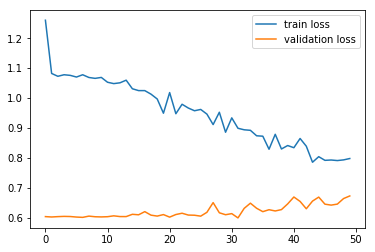

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN    4testFAR
S2033796147                                                    
MAE            598.067557   720.903682   639.884187  662.593397
RMSE           836.093962  1019.740172   911.374813  966.566392
MAPE             1.428177     2.197901     1.472930    1.500358

array([-88.257 , -80.893 , -17.639 , ...,   1.5094,  -7.2936, -93.742 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

15.37615782314477 951.3397828428124


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.10893391, -0.10119324, -0.03470385, -0.03113836,  0.6718355 ,
        1.86224089,  1.84710434])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.2652 - val_loss: 0.5491
Epoch 2/50
459/459 [==============================] - 0s 283us/step - loss: 1.0988 - val_loss: 0.5378
Epoch 3/50
459/459 [==============================] - 0s 300us/step - loss: 1.0833 - val_loss: 0.5363
Epoch 4/50
459/459 [==============================] - 0s 174us/step - loss: 1.0777 - val_loss: 0.5354
Epoch 5/50
459/459 [==============================] - 0s 207us/step - loss: 1.0791 - val_loss: 0.5358
Epoch 6/50
459/459 [==============================] - 0s 258us/step - loss: 1.0726 - val_loss: 0.5354
Epoch 7/50
459/459 [==============================] - 0s 218us/step - loss: 1.0726 - val_loss: 0.5354
Epoch 8/50
459/459 [==============================] - 0s 207us/step - loss: 1.0704 - val_loss: 0.5351
Epoch 9/50
459/459 [==============================] - 0s 197us/step - loss: 1.0639 - val_loss: 0.5363
Epoch 10/50
459/459 [==================

> Training Time :  6.87772274017334 s
dict_keys(['val_loss', 'loss'])


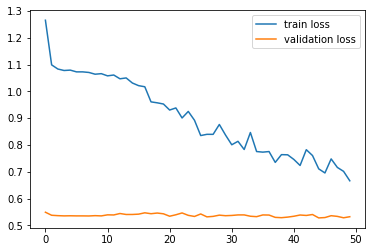

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN     4testFAR
S2506622170                                                    
MAE            477.187914  616.044462   799.383131   780.517287
RMSE           730.829666  948.805053  1353.438867  1426.250588
MAPE            51.498243   50.834985    73.677254    69.567150

array([-12.281, -16.528, -17.655, ...,  10.807,  14.607,  10.414])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.1002654928299877 13.740503513994275


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.88648385, -1.19557005, -1.27759034, -1.14244245, -0.65738017,
       -0.49429299, -0.57594938])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 3ms/step - loss: 1.2818 - val_loss: 0.7652
Epoch 2/50
459/459 [==============================] - 0s 195us/step - loss: 1.0355 - val_loss: 0.7591
Epoch 3/50
459/459 [==============================] - 0s 208us/step - loss: 1.0173 - val_loss: 0.7575
Epoch 4/50
459/459 [==============================] - 0s 216us/step - loss: 1.0164 - val_loss: 0.7552
Epoch 5/50
459/459 [==============================] - 0s 211us/step - loss: 1.0135 - val_loss: 0.7543
Epoch 6/50
459/459 [==============================] - 0s 190us/step - loss: 1.0074 - val_loss: 0.7528
Epoch 7/50
459/459 [==============================] - 0s 186us/step - loss: 1.0021 - val_loss: 0.7487
Epoch 8/50
459/459 [==============================] - 0s 209us/step - loss: 0.9981 - val_loss: 0.7424
Epoch 9/50
459/459 [==============================] - 0s 208us/step - loss: 0.9888 - val_loss: 0.7425
Epoch 10/50
459/459 [==================

> Training Time :  6.0729660987854 s
dict_keys(['val_loss', 'loss'])


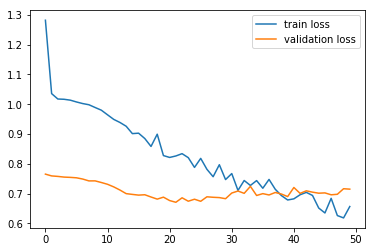

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S2936071850                                                 
MAE              7.199226   9.278157    11.273016  11.731420
RMSE            10.379044  13.594994    15.315494  16.622768
MAPE             0.368249   0.915409     0.150189   0.162446

array([ -420.78, -1169.3 , -1182.3 , ...,   494.91,   524.14,   567.13])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-49.5317470916971 1286.5411754145912


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.28856306, -0.8703711 , -0.88047571, -0.98292093, -0.93410788,
       -0.88933668, -1.01377887])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 3ms/step - loss: 1.1866 - val_loss: 0.9425
Epoch 2/50
459/459 [==============================] - 0s 172us/step - loss: 1.0188 - val_loss: 0.9381
Epoch 3/50
459/459 [==============================] - 0s 247us/step - loss: 1.0084 - val_loss: 0.9386
Epoch 4/50
459/459 [==============================] - 0s 197us/step - loss: 1.0060 - val_loss: 0.9368
Epoch 5/50
459/459 [==============================] - 0s 192us/step - loss: 1.0102 - val_loss: 0.9350
Epoch 6/50
459/459 [==============================] - 0s 211us/step - loss: 0.9995 - val_loss: 0.9316
Epoch 7/50
459/459 [==============================] - 0s 185us/step - loss: 0.9987 - val_loss: 0.9304
Epoch 8/50
459/459 [==============================] - 0s 179us/step - loss: 0.9902 - val_loss: 0.9317
Epoch 9/50
459/459 [==============================] - 0s 197us/step - loss: 0.9953 - val_loss: 0.9323
Epoch 10/50
459/459 [==================

> Training Time :  6.20862603187561 s
dict_keys(['val_loss', 'loss'])


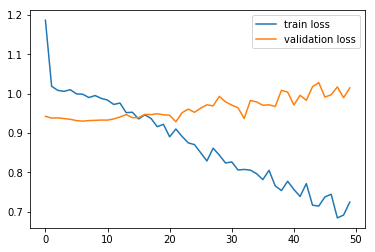

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S3040991847                                                     
MAE            752.879137   946.118969   929.776937   884.479867
RMSE          1045.082966  1287.820316  1432.905696  1414.828364
MAPE            14.502207    22.048623     9.850795     9.707931

array([ 28.606,  15.21 ,  15.871, ..., -19.925, -11.036,  14.811])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.27221612945559626 34.23422385477095


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.82764499, 0.43634066, 0.45564882, 0.54453648, 0.78324498,
       0.77357629, 0.56512991])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 2ms/step - loss: 1.1585 - val_loss: 1.0143
Epoch 2/50
459/459 [==============================] - 0s 182us/step - loss: 0.9958 - val_loss: 1.0032
Epoch 3/50
459/459 [==============================] - 0s 214us/step - loss: 0.9827 - val_loss: 0.9700
Epoch 4/50
459/459 [==============================] - 0s 200us/step - loss: 0.9550 - val_loss: 0.9251
Epoch 5/50
459/459 [==============================] - 0s 168us/step - loss: 0.9402 - val_loss: 0.8839
Epoch 6/50
459/459 [==============================] - 0s 186us/step - loss: 0.9106 - val_loss: 0.8502
Epoch 7/50
459/459 [==============================] - 0s 182us/step - loss: 0.8789 - val_loss: 0.7994
Epoch 8/50
459/459 [==============================] - 0s 214us/step - loss: 0.8336 - val_loss: 0.7374
Epoch 9/50
459/459 [==============================] - 0s 196us/step - loss: 0.8136 - val_loss: 0.7256
Epoch 10/50
459/459 [==================

> Training Time :  6.724506855010986 s
dict_keys(['val_loss', 'loss'])


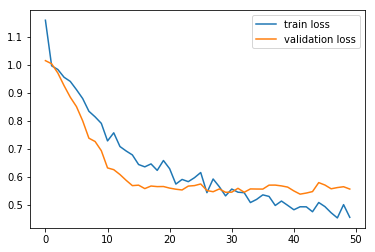

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S322229464                                                 
MAE            14.297631  22.563631    29.450718  39.132791
RMSE           21.606788  34.392797    40.721917  51.696152
MAPE            0.213819   0.358715     0.206367   0.260989

array([ 9.6475,  3.6744, -3.6868, ..., 15.047 ,  8.566 , 16.527 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5556476931394465 20.72323327664592


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.4387275 ,  0.15049545, -0.20471939, -0.69721976, -0.80762724,
       -1.04644133, -0.80328429])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.0545 - val_loss: 1.6820
Epoch 2/50
459/459 [==============================] - 0s 274us/step - loss: 0.9154 - val_loss: 1.6564
Epoch 3/50
459/459 [==============================] - 0s 242us/step - loss: 0.8868 - val_loss: 1.6566
Epoch 4/50
459/459 [==============================] - 0s 223us/step - loss: 0.8819 - val_loss: 1.6695
Epoch 5/50
459/459 [==============================] - 0s 235us/step - loss: 0.8661 - val_loss: 1.6771
Epoch 6/50
459/459 [==============================] - 0s 276us/step - loss: 0.8575 - val_loss: 1.6966
Epoch 7/50
459/459 [==============================] - 0s 224us/step - loss: 0.8408 - val_loss: 1.6904
Epoch 8/50
459/459 [==============================] - 0s 199us/step - loss: 0.8358 - val_loss: 1.6568
Epoch 9/50
459/459 [==============================] - 0s 242us/step - loss: 0.8143 - val_loss: 1.7033
Epoch 10/50
459/459 [==================

> Training Time :  7.887255907058716 s
dict_keys(['val_loss', 'loss'])


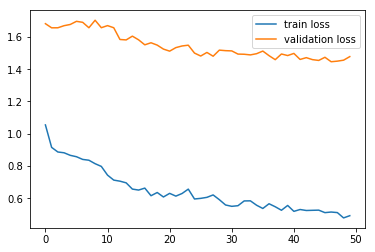

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S3354706692                                                 
MAE              8.067338  11.280188    12.547969  13.428460
RMSE            15.781423  20.841105    20.505218  21.136181
MAPE             0.034940   0.047380     0.044152   0.046897

array([26.367, 27.619, 29.924, ..., 15.026, 17.351, 18.462])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.5040470855132301 13.57253279447088


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.97981081, 2.07205593, 2.24188422, 1.92182605, 1.30565513,
       0.97233488, 0.76972716])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 1.1783 - val_loss: 0.8955
Epoch 2/50
459/459 [==============================] - 0s 361us/step - loss: 1.0331 - val_loss: 0.8990
Epoch 3/50
459/459 [==============================] - 0s 327us/step - loss: 1.0309 - val_loss: 0.8901
Epoch 4/50
459/459 [==============================] - 0s 202us/step - loss: 1.0152 - val_loss: 0.8901
Epoch 5/50
459/459 [==============================] - 0s 193us/step - loss: 1.0077 - val_loss: 0.8894
Epoch 6/50
459/459 [==============================] - 0s 210us/step - loss: 1.0037 - val_loss: 0.8928
Epoch 7/50
459/459 [==============================] - 0s 248us/step - loss: 0.9855 - val_loss: 0.8997
Epoch 8/50
459/459 [==============================] - 0s 223us/step - loss: 0.9822 - val_loss: 0.8955
Epoch 9/50
459/459 [==============================] - 0s 209us/step - loss: 0.9701 - val_loss: 0.8947
Epoch 10/50
459/459 [==================

> Training Time :  7.927693128585815 s
dict_keys(['val_loss', 'loss'])


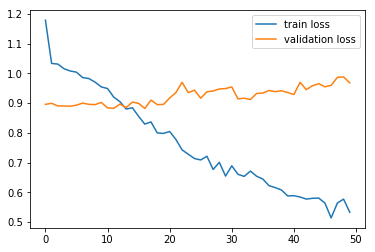

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
S3510028463                                                 
MAE              6.899475   9.383192    17.418477  18.197677
RMSE             9.802242  13.610578    22.027985  22.970094
MAPE             0.087824   0.108319     0.108143   0.113992

array([  95.491,  120.45 ,  153.4  , ..., 3790.4  , 3574.9  , 3538.9  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-4.032273922590905 1317.8077159037791


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.07552185, 0.09446164, 0.11946528, 0.09232172, 0.12979304,
       0.12143067, 0.12253098])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 1s 3ms/step - loss: 1.3483 - val_loss: 0.8354
Epoch 2/50
459/459 [==============================] - 0s 181us/step - loss: 1.0852 - val_loss: 0.8169
Epoch 3/50
459/459 [==============================] - 0s 260us/step - loss: 1.0470 - val_loss: 0.8146
Epoch 4/50
459/459 [==============================] - 0s 180us/step - loss: 1.0384 - val_loss: 0.8147
Epoch 5/50
459/459 [==============================] - 0s 208us/step - loss: 1.0411 - val_loss: 0.8148
Epoch 6/50
459/459 [==============================] - 0s 202us/step - loss: 1.0332 - val_loss: 0.8091
Epoch 7/50
459/459 [==============================] - 0s 207us/step - loss: 1.0313 - val_loss: 0.8042
Epoch 8/50
459/459 [==============================] - 0s 234us/step - loss: 1.0214 - val_loss: 0.8070
Epoch 9/50
459/459 [==============================] - 0s 189us/step - loss: 1.0195 - val_loss: 0.8040
Epoch 10/50
459/459 [==================

> Training Time :  6.631289958953857 s
dict_keys(['val_loss', 'loss'])


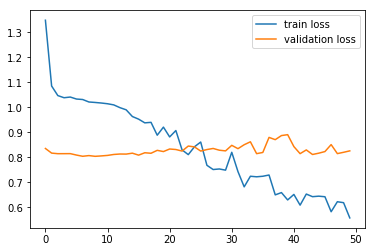

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S3589068424                                                     
MAE            632.403932   813.217495  1682.774507  1699.996803
RMSE           963.568216  1322.785397  2779.086544  2733.880462
MAPE            29.913626    34.264096     2.302463     2.283008

array([-5.0636e+02, -6.0549e+02, -4.5859e+02, ...,  7.4597e+01,
        5.5178e+01, -2.9138e-01])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

28.50456898874696 1434.5393951277238


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.3728476 , -0.44194992, -0.33954771, -0.31500325, -0.29717871,
       -0.29439733, -0.29881687])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 3ms/step - loss: 1.0853 - val_loss: 1.8148
Epoch 2/50
459/459 [==============================] - 0s 218us/step - loss: 0.8971 - val_loss: 1.8032
Epoch 3/50
459/459 [==============================] - 0s 247us/step - loss: 0.8748 - val_loss: 1.7958
Epoch 4/50
459/459 [==============================] - 0s 233us/step - loss: 0.8715 - val_loss: 1.7959
Epoch 5/50
459/459 [==============================] - 0s 252us/step - loss: 0.8693 - val_loss: 1.7962
Epoch 6/50
459/459 [==============================] - 0s 223us/step - loss: 0.8657 - val_loss: 1.7964
Epoch 7/50
459/459 [==============================] - 0s 273us/step - loss: 0.8634 - val_loss: 1.7935
Epoch 8/50
459/459 [==============================] - 0s 220us/step - loss: 0.8504 - val_loss: 1.7879
Epoch 9/50
459/459 [==============================] - 0s 219us/step - loss: 0.8652 - val_loss: 1.7908
Epoch 10/50
459/459 [==================

> Training Time :  7.201725959777832 s
dict_keys(['val_loss', 'loss'])


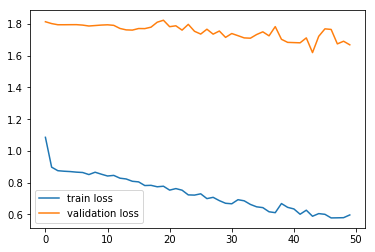

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S3694158618                                                     
MAE            833.464794  1039.865365  1247.295462  1150.585892
RMSE          1176.227288  1443.454673  1809.440886  1693.463482
MAPE            13.228126    13.612512     0.752262     0.632655

array([ 358.12,  549.3 ,  584.73, ..., 2639.8 , 2592.5 , 2601.1 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-9.109751730459255 1364.657298896849


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.26910035, 0.40919413, 0.43515669, 0.53102691, 0.59839181,
       0.67020471, 0.73608938])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.2099 - val_loss: 1.2895
Epoch 2/50
459/459 [==============================] - 0s 362us/step - loss: 0.9787 - val_loss: 1.2681
Epoch 3/50
459/459 [==============================] - 0s 462us/step - loss: 0.9653 - val_loss: 1.2695
Epoch 4/50
459/459 [==============================] - 0s 344us/step - loss: 0.9647 - val_loss: 1.2690
Epoch 5/50
459/459 [==============================] - 0s 273us/step - loss: 0.9569 - val_loss: 1.2688
Epoch 6/50
459/459 [==============================] - 0s 294us/step - loss: 0.9582 - val_loss: 1.2699
Epoch 7/50
459/459 [==============================] - 0s 355us/step - loss: 0.9554 - val_loss: 1.2685
Epoch 8/50
459/459 [==============================] - 0s 255us/step - loss: 0.9558 - val_loss: 1.2664
Epoch 9/50
459/459 [==============================] - 0s 318us/step - loss: 0.9510 - val_loss: 1.2683
Epoch 10/50
459/459 [==================

> Training Time :  10.11419415473938 s
dict_keys(['val_loss', 'loss'])


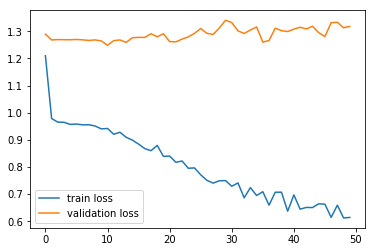

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S424944450                                                     
MAE           762.672063   953.375845  1199.982273  1152.461350
RMSE         1103.843572  1372.372200  1471.367939  1439.520796
MAPE            5.453194     6.484700     2.005239     1.884178

array([  110.06,   147.13,   151.88, ..., -1513.2 , -1522.5 , -1603.  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 198us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 223us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 226us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 254us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 224us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 237us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 260us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 230us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 251us/step - loss: nan - val_loss: 

> Training Time :  10.397623062133789 s
dict_keys(['val_loss', 'loss'])


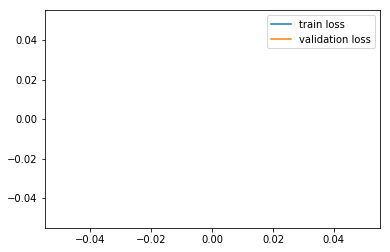

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN    4testFAR
S465798277                                                    
MAE                  NaN   673.349797          NaN  731.850981
RMSE                 NaN  6479.136080          NaN  970.532999
MAPE                 NaN    61.326588          NaN    0.782432

array([-454.27 , -739.36 ,  -87.419, ..., -651.79 , -801.17 , -533.96 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

73.59670098040603 2118.423423117116


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.24917903, -0.38375553, -0.07600733, -0.06922587, -0.12753669,
       -0.03313266, -0.07121556])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.1985 - val_loss: 1.1366
Epoch 2/50
459/459 [==============================] - 0s 154us/step - loss: 0.9894 - val_loss: 1.1255
Epoch 3/50
459/459 [==============================] - 0s 191us/step - loss: 0.9733 - val_loss: 1.1243
Epoch 4/50
459/459 [==============================] - 0s 187us/step - loss: 0.9729 - val_loss: 1.1238
Epoch 5/50
459/459 [==============================] - 0s 160us/step - loss: 0.9703 - val_loss: 1.1246
Epoch 6/50
459/459 [==============================] - 0s 188us/step - loss: 0.9689 - val_loss: 1.1261
Epoch 7/50
459/459 [==============================] - 0s 161us/step - loss: 0.9705 - val_loss: 1.1260
Epoch 8/50
459/459 [==============================] - 0s 182us/step - loss: 0.9657 - val_loss: 1.1273
Epoch 9/50
459/459 [==============================] - 0s 211us/step - loss: 0.9648 - val_loss: 1.1352
Epoch 10/50
459/459 [==================

> Training Time :  7.129872798919678 s
dict_keys(['val_loss', 'loss'])


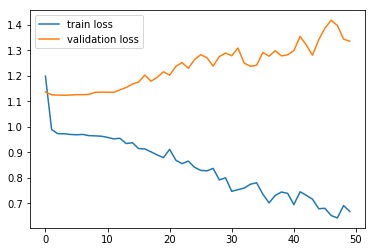

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S530109022                                                     
MAE          1136.584085  1373.054807   805.781566   859.173907
RMSE         1764.545167  2115.313742  1379.339808  1451.913069
MAPE            0.050444     0.061727     0.024118     0.025609

array([ 2.5347e+02,  4.3388e+02,  4.7854e+02, ..., -2.1316e-14,
       -1.7764e-15, -3.5527e-15])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

2348.7003355423835 56035.918953697044


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.03739084, -0.0341713 , -0.03337431, -0.03393913, -0.03340394,
       -0.03534626, -0.03419896])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.7184 - val_loss: 0.0013
Epoch 2/50
459/459 [==============================] - 0s 148us/step - loss: 1.4254 - val_loss: 0.0018
Epoch 3/50
459/459 [==============================] - 0s 164us/step - loss: 1.2978 - val_loss: 0.0020
Epoch 4/50
459/459 [==============================] - 0s 168us/step - loss: 1.2589 - val_loss: 0.0023
Epoch 5/50
459/459 [==============================] - 0s 151us/step - loss: 1.2211 - val_loss: 0.0022
Epoch 6/50
459/459 [==============================] - 0s 171us/step - loss: 1.2563 - val_loss: 0.0025
Epoch 7/50
459/459 [==============================] - 0s 136us/step - loss: 1.2258 - val_loss: 0.0027
Epoch 8/50
459/459 [==============================] - 0s 145us/step - loss: 1.2031 - val_loss: 0.0026
Epoch 9/50
459/459 [==============================] - 0s 159us/step - loss: 1.2057 - val_loss: 0.0025
Epoch 10/50
459/459 [==================

> Training Time :  7.00576114654541 s
dict_keys(['val_loss', 'loss'])


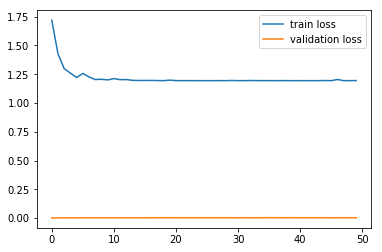

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN    4testFAR
S758407052                                                     
MAE          5374.139244   2859.780825  2914.811799   17.633917
RMSE        56399.060171  56446.640500  2918.935213  100.893725
MAPE         3814.319713    341.502385  4588.820434    1.041329

array([267.06 , 182.77 , 200.59 , ...,  75.542,  94.252,  57.95 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.8741704894920926 123.18449094119937


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([2.17506415, 1.49080594, 1.63546701, 1.58505481, 1.53245079,
       1.43430532, 1.05024723])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.2293 - val_loss: 0.7706
Epoch 2/50
459/459 [==============================] - 0s 153us/step - loss: 0.9961 - val_loss: 0.7552
Epoch 3/50
459/459 [==============================] - 0s 130us/step - loss: 0.9614 - val_loss: 0.7183
Epoch 4/50
459/459 [==============================] - 0s 127us/step - loss: 0.9161 - val_loss: 0.6715
Epoch 5/50
459/459 [==============================] - 0s 175us/step - loss: 0.8702 - val_loss: 0.6376
Epoch 6/50
459/459 [==============================] - 0s 121us/step - loss: 0.8450 - val_loss: 0.5860
Epoch 7/50
459/459 [==============================] - 0s 157us/step - loss: 0.7900 - val_loss: 0.5345
Epoch 8/50
459/459 [==============================] - 0s 138us/step - loss: 0.7530 - val_loss: 0.5093
Epoch 9/50
459/459 [==============================] - 0s 150us/step - loss: 0.7166 - val_loss: 0.4669
Epoch 10/50
459/459 [==================

> Training Time :  8.563086986541748 s
dict_keys(['val_loss', 'loss'])


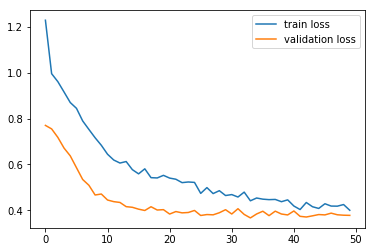

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
S833735080                                                   
MAE            49.421135   92.870318    84.345661  112.631722
RMSE           69.004219  122.830859   110.579105  141.234026
MAPE            0.076634    0.147828     0.076298    0.099781

array([41.084, 25.085, 22.848, ...,    nan,    nan,    nan])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 8ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 286us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 258us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 277us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 273us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 243us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 278us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 289us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 240us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 263us/step - loss: nan - val_loss: 

> Training Time :  11.147132873535156 s
dict_keys(['val_loss', 'loss'])


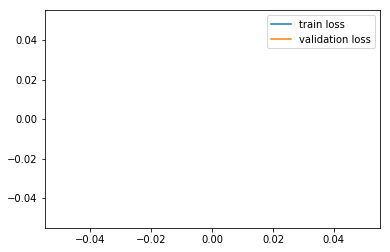

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN  4testFAR
S93024994                                                 
MAE                 NaN  179.229798          NaN       NaN
RMSE                NaN  368.628116          NaN       NaN
MAPE                NaN    1.334051          NaN       NaN

array([  21.517,  -73.841,   40.218, ..., 1537.7  , 1535.1  , 1426.3  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-35.51646741788322 1730.0897547061124


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.03296561, -0.02215176,  0.04377488,  0.07313925,  0.10132218,
        0.09958817,  0.12577178])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 3ms/step - loss: 0.9946 - val_loss: 2.0013
Epoch 2/50
459/459 [==============================] - 0s 150us/step - loss: 0.8318 - val_loss: 1.9989
Epoch 3/50
459/459 [==============================] - 0s 159us/step - loss: 0.8258 - val_loss: 2.0007
Epoch 4/50
459/459 [==============================] - 0s 147us/step - loss: 0.8194 - val_loss: 2.0032
Epoch 5/50
459/459 [==============================] - 0s 151us/step - loss: 0.8224 - val_loss: 2.0050
Epoch 6/50
459/459 [==============================] - 0s 155us/step - loss: 0.8197 - val_loss: 2.0041
Epoch 7/50
459/459 [==============================] - 0s 193us/step - loss: 0.8253 - val_loss: 2.0082
Epoch 8/50
459/459 [==============================] - 0s 249us/step - loss: 0.8253 - val_loss: 2.0071
Epoch 9/50
459/459 [==============================] - 0s 245us/step - loss: 0.8189 - val_loss: 2.0095
Epoch 10/50
459/459 [==================

> Training Time :  6.408099889755249 s
dict_keys(['val_loss', 'loss'])


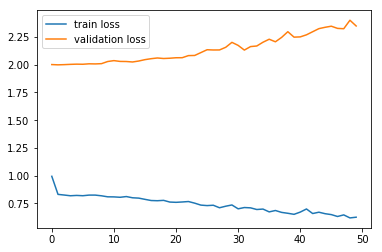

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
S998246299                                                     
MAE          1106.933044  1234.567304  1458.672362  1488.999369
RMSE         1585.658624  1732.865050  2079.777282  2147.895343
MAPE            5.224934     5.358187     0.976365     1.147916

array([32.064 , 23.964 , 26.97  , ...,  3.6826,  5.9689,  4.7831])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 199us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 185us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 197us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 169us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 165us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 182us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 162us/step - loss: nan - val_loss: 

> Training Time :  6.162145137786865 s
dict_keys(['val_loss', 'loss'])


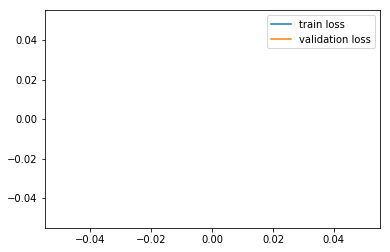

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147483813                                                 
MAE                   NaN   9.511971          NaN   8.099321
RMSE                  NaN  21.944988          NaN  10.638348
MAPE                  NaN   0.104724          NaN   0.050293

array([  1.4993,  -6.3606, -12.2   , ...,  20.27  ,  20.134 ,  14.7   ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1471.6014473596022 34425.22621171767


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.04270421, -0.04293253, -0.04310216, -0.0429798 , -0.04300452,
       -0.04322526, -0.04353579])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 7ms/step - loss: 1.6678 - val_loss: 0.0017
Epoch 2/50
459/459 [==============================] - 0s 240us/step - loss: 1.5829 - val_loss: 0.0014
Epoch 3/50
459/459 [==============================] - 0s 226us/step - loss: 1.3039 - val_loss: 0.0018
Epoch 4/50
459/459 [==============================] - 0s 229us/step - loss: 1.2351 - val_loss: 0.0021
Epoch 5/50
459/459 [==============================] - 0s 256us/step - loss: 1.2247 - val_loss: 0.0021
Epoch 6/50
459/459 [==============================] - 0s 628us/step - loss: 1.2082 - val_loss: 0.0024
Epoch 7/50
459/459 [==============================] - 0s 268us/step - loss: 1.2035 - val_loss: 0.0023
Epoch 8/50
459/459 [==============================] - 0s 234us/step - loss: 1.2019 - val_loss: 0.0021
Epoch 9/50
459/459 [==============================] - 0s 341us/step - loss: 1.2117 - val_loss: 0.0024
Epoch 10/50
459/459 [==================

> Training Time :  12.31463885307312 s
dict_keys(['val_loss', 'loss'])


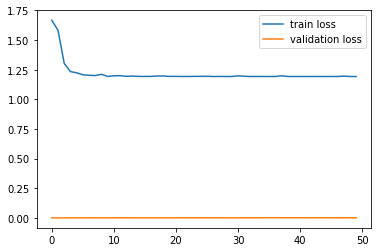

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN   4testFAR
T2147484123                                                    
MAE           3246.702292   1503.157330  1761.075646  12.121087
RMSE         34647.859872  34678.836533  1761.878469  15.964672
MAPE            54.157312     17.176639    16.490264   0.113830

array([ -0.37964,  -0.6297 ,   1.6948 , ..., -13.526  ,  -1.1427 ,
        -8.6491 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.41610308504409976 25.33603788057581


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.03140756, -0.04127729,  0.05046949,  0.04535819, -0.00251038,
       -0.05762555,  0.05093918])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: 1.3222 - val_loss: 0.8371
Epoch 2/50
459/459 [==============================] - 0s 365us/step - loss: 1.0161 - val_loss: 0.8302
Epoch 3/50
459/459 [==============================] - 0s 238us/step - loss: 1.0080 - val_loss: 0.8280
Epoch 4/50
459/459 [==============================] - 0s 236us/step - loss: 0.9945 - val_loss: 0.8222
Epoch 5/50
459/459 [==============================] - 0s 255us/step - loss: 0.9915 - val_loss: 0.8112
Epoch 6/50
459/459 [==============================] - 0s 229us/step - loss: 0.9848 - val_loss: 0.8019
Epoch 7/50
459/459 [==============================] - 0s 226us/step - loss: 0.9754 - val_loss: 0.8019
Epoch 8/50
459/459 [==============================] - 0s 216us/step - loss: 0.9550 - val_loss: 0.7908
Epoch 9/50
459/459 [==============================] - 0s 238us/step - loss: 0.9326 - val_loss: 0.7693
Epoch 10/50
459/459 [==================

> Training Time :  9.921979904174805 s
dict_keys(['val_loss', 'loss'])


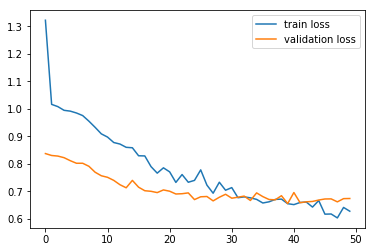

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147484232                                                 
MAE             12.703878  16.855965    14.048110  18.395922
RMSE            18.980035  25.124168    18.634357  23.974162
MAPE             1.670453   2.088390     2.315737   2.355651

array([ -7.8855, -21.27  , -13.463 , ...,  -4.4868,   8.5994,   7.4273])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 209us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 209us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 197us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 181us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 172us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 168us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 163us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 176us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 208us/step - loss: nan - val_loss: 

> Training Time :  6.559072017669678 s
dict_keys(['val_loss', 'loss'])


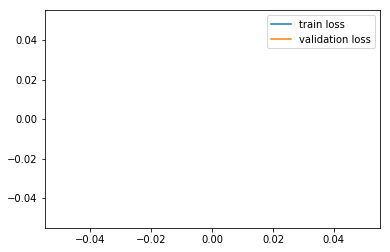

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147484249                                                 
MAE                   NaN  22.805343          NaN  28.511067
RMSE                  NaN  53.393424          NaN  37.014032
MAPE                  NaN   0.264635          NaN   0.079027

array([ 81.411 , 167.74  , 204.95  , ...,   1.8956, 165.68  , 173.6   ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-4.5349250315541365 147.12355614843878


0.9999999999999998

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.58417515, 1.17095406, 1.42387073, 1.65449321, 1.79553113,
       1.5831926 , 0.7762518 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 4ms/step - loss: 1.2233 - val_loss: 0.9534
Epoch 2/50
459/459 [==============================] - 0s 171us/step - loss: 1.0151 - val_loss: 0.9486
Epoch 3/50
459/459 [==============================] - 0s 167us/step - loss: 1.0051 - val_loss: 0.9476
Epoch 4/50
459/459 [==============================] - 0s 173us/step - loss: 1.0033 - val_loss: 0.9462
Epoch 5/50
459/459 [==============================] - 0s 175us/step - loss: 0.9996 - val_loss: 0.9423
Epoch 6/50
459/459 [==============================] - 0s 196us/step - loss: 0.9954 - val_loss: 0.9377
Epoch 7/50
459/459 [==============================] - 0s 180us/step - loss: 0.9860 - val_loss: 0.9353
Epoch 8/50
459/459 [==============================] - 0s 163us/step - loss: 0.9795 - val_loss: 0.9232
Epoch 9/50
459/459 [==============================] - 0s 168us/step - loss: 0.9718 - val_loss: 0.9026
Epoch 10/50
459/459 [==================

> Training Time :  6.8264710903167725 s
dict_keys(['val_loss', 'loss'])


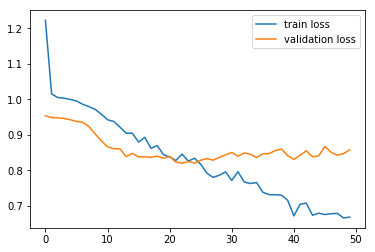

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147484270                                                   
MAE             85.409383  111.546863   115.594658  122.357277
RMSE           114.206718  146.997812   151.831262  159.125530
MAPE             4.181810    5.582050     0.131163    0.141371

array([-116.17, -222.3 , -167.53, ...,  300.17,  294.22,  266.06])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 223us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 246us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 278us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 253us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 210us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 225us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 273us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 239us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 254us/step - loss: nan - val_loss: 

> Training Time :  9.020082950592041 s
dict_keys(['val_loss', 'loss'])


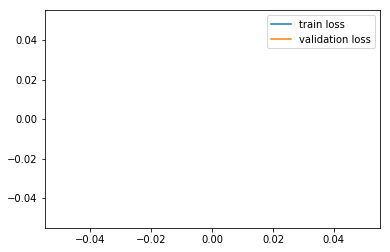

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147484280                                                   
MAE                   NaN  115.307322          NaN  184.392281
RMSE                  NaN  174.507166          NaN  242.987043
MAPE                  NaN    7.055557          NaN    0.701133

array([17.833  ,  5.637  ,  7.5477 , ...,  8.471  ,  8.4486 ,  0.62352])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.4050205407671837 9.907814553836587


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.84077129,  0.60982374,  0.80267152,  0.39896998, -0.20725857,
       -0.27926234, -0.1145035 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 11ms/step - loss: 1.3026 - val_loss: 0.9512
Epoch 2/50
459/459 [==============================] - 0s 306us/step - loss: 1.0171 - val_loss: 0.9380
Epoch 3/50
459/459 [==============================] - 0s 261us/step - loss: 0.9888 - val_loss: 0.9320
Epoch 4/50
459/459 [==============================] - 0s 256us/step - loss: 0.9704 - val_loss: 0.9298
Epoch 5/50
459/459 [==============================] - 0s 242us/step - loss: 0.9606 - val_loss: 0.9221
Epoch 6/50
459/459 [==============================] - 0s 258us/step - loss: 0.9354 - val_loss: 0.9057
Epoch 7/50
459/459 [==============================] - 0s 272us/step - loss: 0.9304 - val_loss: 0.8983
Epoch 8/50
459/459 [==============================] - 0s 385us/step - loss: 0.9026 - val_loss: 0.8720
Epoch 9/50
459/459 [==============================] - 0s 264us/step - loss: 0.8958 - val_loss: 0.8569
Epoch 10/50
459/459 [=================

> Training Time :  13.938182353973389 s
dict_keys(['val_loss', 'loss'])


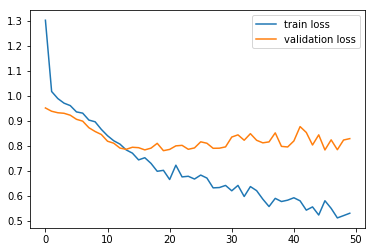

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147484327                                                 
MAE              4.892756   6.861851     8.870188   9.742173
RMSE             6.875439   9.895618    11.277574  12.381612
MAPE             0.103369   0.135182     0.092046   0.100843

array([ -64.852, -232.19 , -238.33 , ...,   46.549,   84.11 ,   91.269])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-4.273683448502129 102.27476021121568


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.59230954, -2.2284708 , -2.28850516, -1.94531198, -2.41121383,
       -2.85540945, -3.0546766 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: 1.0783 - val_loss: 1.7629
Epoch 2/50
459/459 [==============================] - 0s 333us/step - loss: 0.8768 - val_loss: 1.7488
Epoch 3/50
459/459 [==============================] - 0s 274us/step - loss: 0.8557 - val_loss: 1.7473
Epoch 4/50
459/459 [==============================] - 0s 294us/step - loss: 0.8530 - val_loss: 1.7492
Epoch 5/50
459/459 [==============================] - 0s 262us/step - loss: 0.8500 - val_loss: 1.7471
Epoch 6/50
459/459 [==============================] - 0s 321us/step - loss: 0.8428 - val_loss: 1.7404
Epoch 7/50
459/459 [==============================] - 0s 230us/step - loss: 0.8492 - val_loss: 1.7376
Epoch 8/50
459/459 [==============================] - 0s 252us/step - loss: 0.8449 - val_loss: 1.7373
Epoch 9/50
459/459 [==============================] - 0s 356us/step - loss: 0.8327 - val_loss: 1.7358
Epoch 10/50
459/459 [==================

> Training Time :  9.449632167816162 s
dict_keys(['val_loss', 'loss'])


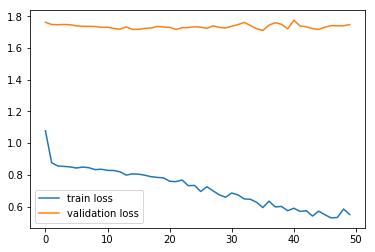

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147484604                                                   
MAE             54.766678   66.627201    95.865034   92.197780
RMSE            82.173366  101.890813   124.385124  120.712023
MAPE             0.189215    0.226513     0.120097    0.119665

array([-2.3947 ,  0.9997 ,  0.33336, ...,  3.973  ,  6.3625 ,  3.2882 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.13111814403284666 9.650252762376125


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.26173596,  0.09000612,  0.02095716, -0.50839271, -0.48533632,
       -0.45251852,  0.49033761])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 1.2013 - val_loss: 1.3218
Epoch 2/50
459/459 [==============================] - 0s 226us/step - loss: 0.9436 - val_loss: 1.3166
Epoch 3/50
459/459 [==============================] - 0s 189us/step - loss: 0.9240 - val_loss: 1.3188
Epoch 4/50
459/459 [==============================] - 0s 234us/step - loss: 0.9144 - val_loss: 1.2957
Epoch 5/50
459/459 [==============================] - 0s 226us/step - loss: 0.9071 - val_loss: 1.2745
Epoch 6/50
459/459 [==============================] - 0s 265us/step - loss: 0.8732 - val_loss: 1.2595
Epoch 7/50
459/459 [==============================] - 0s 248us/step - loss: 0.8689 - val_loss: 1.1972
Epoch 8/50
459/459 [==============================] - 0s 209us/step - loss: 0.8317 - val_loss: 1.1730
Epoch 9/50
459/459 [==============================] - 0s 225us/step - loss: 0.8187 - val_loss: 1.1437
Epoch 10/50
459/459 [==================

> Training Time :  8.247802257537842 s
dict_keys(['val_loss', 'loss'])


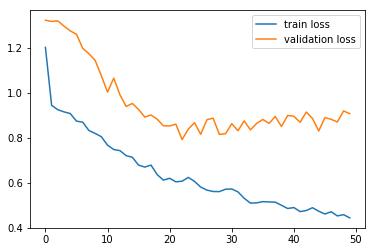

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147484650                                                 
MAE              4.799153   7.271998     8.617694  10.202636
RMSE             6.436061   9.653739    10.742005  12.950707
MAPE             0.108550   0.173513     0.102270   0.123138

array([-0.66832, -0.79528, -0.86052, ...,  1.891  ,  1.7894 ,  2.0881 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.009975991350517032 1.2558160097623774


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.5401237 , -0.64122131, -0.6931716 , -0.63138707, -0.33177312,
        0.0491107 ,  0.141895  ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.2565 - val_loss: 1.4247
Epoch 2/50
459/459 [==============================] - 0s 223us/step - loss: 0.9705 - val_loss: 1.4140
Epoch 3/50
459/459 [==============================] - 0s 225us/step - loss: 0.9392 - val_loss: 1.4138
Epoch 4/50
459/459 [==============================] - 0s 247us/step - loss: 0.9358 - val_loss: 1.4140
Epoch 5/50
459/459 [==============================] - 0s 235us/step - loss: 0.9313 - val_loss: 1.4147
Epoch 6/50
459/459 [==============================] - 0s 257us/step - loss: 0.9262 - val_loss: 1.4171
Epoch 7/50
459/459 [==============================] - 0s 268us/step - loss: 0.9303 - val_loss: 1.4165
Epoch 8/50
459/459 [==============================] - 0s 312us/step - loss: 0.9251 - val_loss: 1.4147
Epoch 9/50
459/459 [==============================] - 0s 266us/step - loss: 0.9219 - val_loss: 1.4120
Epoch 10/50
459/459 [=================

> Training Time :  14.215457201004028 s
dict_keys(['val_loss', 'loss'])


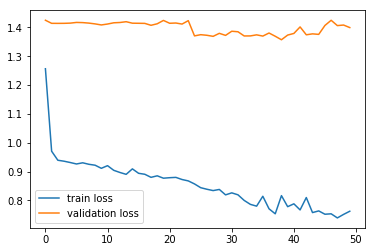

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147484789                                                
MAE              0.652109   0.762524     3.419556  2.550862
RMSE             1.127046   1.256617    10.427678  9.125052
MAPE             0.012549   0.014591     0.053416  0.038302

array([ -0.57849, -16.761  , -24.583  , ...,   7.7337 ,  15.54   ,
        10.921  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.1292840571380778 14.029754669863303


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.05044807, -1.20389019, -1.76141954, -2.11103364,  1.28075767,
        1.47733987,  1.18104103])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 1.2198 - val_loss: 0.6979
Epoch 2/50
459/459 [==============================] - 0s 184us/step - loss: 0.9411 - val_loss: 0.6625
Epoch 3/50
459/459 [==============================] - 0s 184us/step - loss: 0.8833 - val_loss: 0.5998
Epoch 4/50
459/459 [==============================] - 0s 184us/step - loss: 0.8182 - val_loss: 0.5533
Epoch 5/50
459/459 [==============================] - 0s 189us/step - loss: 0.7689 - val_loss: 0.5073
Epoch 6/50
459/459 [==============================] - 0s 160us/step - loss: 0.7426 - val_loss: 0.4741
Epoch 7/50
459/459 [==============================] - 0s 158us/step - loss: 0.7006 - val_loss: 0.4368
Epoch 8/50
459/459 [==============================] - 0s 172us/step - loss: 0.6705 - val_loss: 0.4264
Epoch 9/50
459/459 [==============================] - 0s 155us/step - loss: 0.6334 - val_loss: 0.3984
Epoch 10/50
459/459 [==================

> Training Time :  9.072576999664307 s
dict_keys(['val_loss', 'loss'])


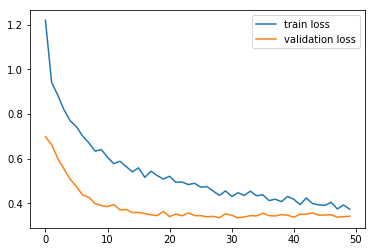

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147484918                                                 
MAE              5.704088  10.721299     8.148476  11.705439
RMSE             7.701278  13.980853    10.986706  15.528960
MAPE             0.392430   0.761146     0.077971   0.108153

array([ 78.407,  41.513,  46.966, ..., -63.794, -46.107, -62.668])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.33603297683242106 66.34888350368779


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.17667341, 0.62061281, 0.70279957, 1.04196127, 0.83888325,
       0.77915353, 0.72787912])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 1.3601 - val_loss: 0.9871
Epoch 2/50
459/459 [==============================] - 0s 190us/step - loss: 1.0178 - val_loss: 0.9844
Epoch 3/50
459/459 [==============================] - 0s 178us/step - loss: 0.9870 - val_loss: 0.9795
Epoch 4/50
459/459 [==============================] - 0s 194us/step - loss: 0.9903 - val_loss: 0.9655
Epoch 5/50
459/459 [==============================] - 0s 194us/step - loss: 0.9506 - val_loss: 0.9402
Epoch 6/50
459/459 [==============================] - 0s 210us/step - loss: 0.9568 - val_loss: 0.9209
Epoch 7/50
459/459 [==============================] - 0s 199us/step - loss: 0.9355 - val_loss: 0.8930
Epoch 8/50
459/459 [==============================] - 0s 200us/step - loss: 0.9075 - val_loss: 0.8639
Epoch 9/50
459/459 [==============================] - 0s 171us/step - loss: 0.8738 - val_loss: 0.8400
Epoch 10/50
459/459 [==================

> Training Time :  7.2193028926849365 s
dict_keys(['val_loss', 'loss'])


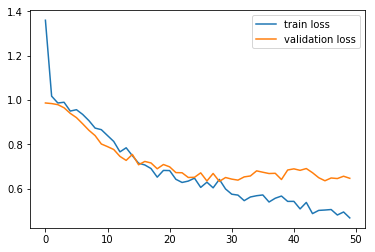

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN    4testFAR
T2147484959                                                  
MAE             30.460632  46.794518    57.882551   74.742204
RMSE            43.099098  66.427678    84.986796  102.330511
MAPE             0.067927   0.100721     0.100782    0.129507

array([ 99.309, 102.61 , -17.524, ..., 445.02 , 339.55 ,  19.656])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 441us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 283us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 272us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 593us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 366us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 261us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 599us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 260us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 347us/step - loss: nan - val_loss: 

> Training Time :  12.842031002044678 s
dict_keys(['val_loss', 'loss'])


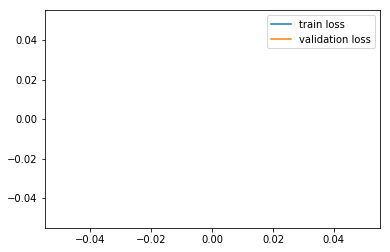

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147484978                                                   
MAE                   NaN  182.558877          NaN  174.253150
RMSE                  NaN  242.530855          NaN  225.286501
MAPE                  NaN    1.205222          NaN    0.453982

array([  9.1976 ,  12.177  ,   8.152  , ...,  -0.29822, -14.84   ,
        -9.6348 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5567634840632605 42.5394234993693


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.20312538,  0.27316394,  0.17854583,  0.30997685,  0.12998852,
       -0.05746113,  0.31402016])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: 1.3010 - val_loss: 0.5855
Epoch 2/50
459/459 [==============================] - 0s 206us/step - loss: 1.0981 - val_loss: 0.5816
Epoch 3/50
459/459 [==============================] - 0s 193us/step - loss: 1.0765 - val_loss: 0.5811
Epoch 4/50
459/459 [==============================] - 0s 194us/step - loss: 1.0767 - val_loss: 0.5809
Epoch 5/50
459/459 [==============================] - 0s 317us/step - loss: 1.0705 - val_loss: 0.5821
Epoch 6/50
459/459 [==============================] - 0s 345us/step - loss: 1.0730 - val_loss: 0.5824
Epoch 7/50
459/459 [==============================] - 0s 250us/step - loss: 1.0695 - val_loss: 0.5822
Epoch 8/50
459/459 [==============================] - 0s 198us/step - loss: 1.0691 - val_loss: 0.5842
Epoch 9/50
459/459 [==============================] - 0s 184us/step - loss: 1.0591 - val_loss: 0.5854
Epoch 10/50
459/459 [==================

> Training Time :  8.795354843139648 s
dict_keys(['val_loss', 'loss'])


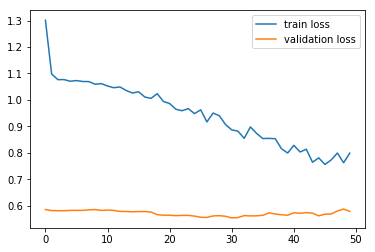

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485027                                                 
MAE             25.442988  30.744930    25.727523  24.030820
RMSE            34.463513  42.616313    34.617817  33.117462
MAPE             0.645099   0.813813     0.181326   0.172193

array([ 48.976,  71.628,  47.117, ...,  14.754, -13.124, -16.371])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.6075313318886866 21.536571262678173


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([2.24587601, 3.29766832, 2.15955772, 1.47634776, 0.97807903,
       1.12527052, 1.03969515])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: 1.1627 - val_loss: 0.8040
Epoch 2/50
459/459 [==============================] - 0s 250us/step - loss: 1.0006 - val_loss: 0.7989
Epoch 3/50
459/459 [==============================] - 0s 201us/step - loss: 0.9740 - val_loss: 0.7652
Epoch 4/50
459/459 [==============================] - 0s 194us/step - loss: 0.9521 - val_loss: 0.7481
Epoch 5/50
459/459 [==============================] - 0s 191us/step - loss: 0.9261 - val_loss: 0.7318
Epoch 6/50
459/459 [==============================] - 0s 183us/step - loss: 0.9054 - val_loss: 0.7018
Epoch 7/50
459/459 [==============================] - 0s 183us/step - loss: 0.8600 - val_loss: 0.6819
Epoch 8/50
459/459 [==============================] - 0s 181us/step - loss: 0.8552 - val_loss: 0.6911
Epoch 9/50
459/459 [==============================] - 0s 194us/step - loss: 0.8385 - val_loss: 0.6674
Epoch 10/50
459/459 [==================

> Training Time :  7.6669700145721436 s
dict_keys(['val_loss', 'loss'])


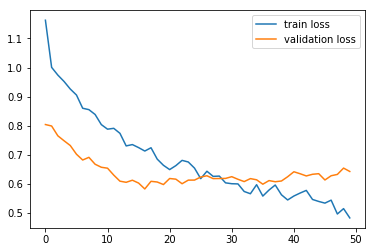

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485040                                                 
MAE             10.545407  15.346740    20.367534  22.731079
RMSE            14.454416  21.481908    26.560717  28.868487
MAPE             0.145914   0.200314     0.144978   0.167619

array([-11.834  , -25.411  , -29.197  , ...,  -1.8069 ,   1.873  ,
         0.51305])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.08734309527752432 10.049106705552045


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.16892548, -2.51999085, -2.89674075, -2.389631  ,  0.18023921,
        0.32556556,  0.40787139])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: 1.2951 - val_loss: 0.8102
Epoch 2/50
459/459 [==============================] - 0s 259us/step - loss: 1.0375 - val_loss: 0.8058
Epoch 3/50
459/459 [==============================] - 0s 296us/step - loss: 1.0239 - val_loss: 0.8032
Epoch 4/50
459/459 [==============================] - 0s 289us/step - loss: 1.0230 - val_loss: 0.8027
Epoch 5/50
459/459 [==============================] - 0s 253us/step - loss: 1.0178 - val_loss: 0.8007
Epoch 6/50
459/459 [==============================] - 0s 283us/step - loss: 0.9988 - val_loss: 0.8010
Epoch 7/50
459/459 [==============================] - 0s 299us/step - loss: 0.9975 - val_loss: 0.7988
Epoch 8/50
459/459 [==============================] - 0s 261us/step - loss: 0.9810 - val_loss: 0.7955
Epoch 9/50
459/459 [==============================] - 0s 266us/step - loss: 0.9779 - val_loss: 0.7977
Epoch 10/50
459/459 [==================

> Training Time :  11.846420049667358 s
dict_keys(['val_loss', 'loss'])


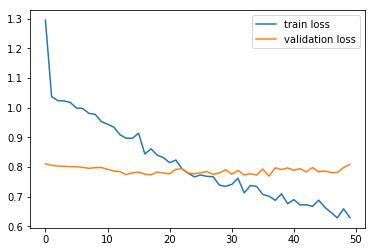

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485050                                                 
MAE              5.354365   6.984924     9.980794  10.498488
RMSE             7.609178  10.053914    13.902654  14.118270
MAPE             0.086092   0.104430     0.085164   0.090512

array([-12.255, -17.751, -17.065, ...,  73.531, 112.36 , 108.82 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.620290984930049 79.09655209132094


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.1754222 , -0.2449069 , -0.23623395, -0.21083461, -0.17735654,
       -0.17154087, -0.18103559])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 0.8912 - val_loss: 2.3208
Epoch 2/50
459/459 [==============================] - 0s 173us/step - loss: 0.7853 - val_loss: 2.3179
Epoch 3/50
459/459 [==============================] - 0s 182us/step - loss: 0.7794 - val_loss: 2.3105
Epoch 4/50
459/459 [==============================] - 0s 180us/step - loss: 0.7696 - val_loss: 2.3157
Epoch 5/50
459/459 [==============================] - 0s 171us/step - loss: 0.7684 - val_loss: 2.3130
Epoch 6/50
459/459 [==============================] - 0s 193us/step - loss: 0.7628 - val_loss: 2.2954
Epoch 7/50
459/459 [==============================] - 0s 185us/step - loss: 0.7595 - val_loss: 2.2929
Epoch 8/50
459/459 [==============================] - 0s 186us/step - loss: 0.7491 - val_loss: 2.2874
Epoch 9/50
459/459 [==============================] - 0s 201us/step - loss: 0.7457 - val_loss: 2.2638
Epoch 10/50
459/459 [==================

> Training Time :  8.312553882598877 s
dict_keys(['val_loss', 'loss'])


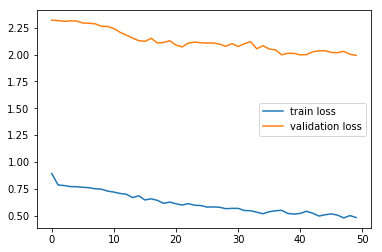

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN    4testFAR
T2147485070                                                  
MAE             36.122712  46.881713    64.870859   67.045398
RMSE            64.050161  79.610679   107.662646  107.007274
MAPE             0.340507   0.426298     0.256249    0.279868

array([ 1.1154  ,  0.068608, -1.1038  , ..., -0.88878 , -0.95552 ,
       -0.93218 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

2.169542549392791 79.04985408883051


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.01333516, -0.02657734, -0.04140858, -0.04418152, -0.01858071,
        0.04511403, -0.04107715])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 2s 5ms/step - loss: 0.9410 - val_loss: 2.9769
Epoch 2/50
459/459 [==============================] - 0s 178us/step - loss: 0.7440 - val_loss: 2.8765
Epoch 3/50
459/459 [==============================] - 0s 183us/step - loss: 0.6979 - val_loss: 2.8690
Epoch 4/50
459/459 [==============================] - 0s 174us/step - loss: 0.7108 - val_loss: 2.8552
Epoch 5/50
459/459 [==============================] - 0s 190us/step - loss: 0.6828 - val_loss: 2.8538
Epoch 6/50
459/459 [==============================] - 0s 208us/step - loss: 0.6805 - val_loss: 2.8995
Epoch 7/50
459/459 [==============================] - 0s 199us/step - loss: 0.6677 - val_loss: 2.9337
Epoch 8/50
459/459 [==============================] - 0s 237us/step - loss: 0.6784 - val_loss: 3.0248
Epoch 9/50
459/459 [==============================] - 0s 190us/step - loss: 0.6614 - val_loss: 3.0955
Epoch 10/50
459/459 [==================

> Training Time :  7.363605737686157 s
dict_keys(['val_loss', 'loss'])


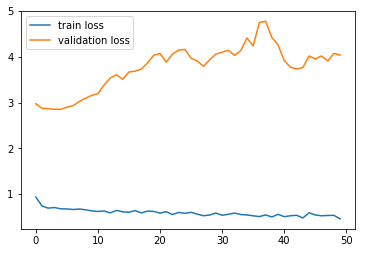

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485079                                                 
MAE             17.296609  18.148223     8.354706   7.461028
RMSE            79.465144  79.588573    30.184126  29.937182
MAPE             0.070236   0.072699     0.092064   0.086320

array([-920.75, -692.21,  728.37, ..., -983.9 , -904.47, -751.81])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-32.36897064476885 1522.4685744984508


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.58351354, -0.43340207,  0.49967466,  0.26084543,  0.03424765,
       -0.36474384, -0.54425493])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 10ms/step - loss: 1.2394 - val_loss: 1.0780
Epoch 2/50
459/459 [==============================] - 0s 226us/step - loss: 0.9949 - val_loss: 1.0696
Epoch 3/50
459/459 [==============================] - 0s 266us/step - loss: 0.9847 - val_loss: 1.0682
Epoch 4/50
459/459 [==============================] - 0s 219us/step - loss: 0.9838 - val_loss: 1.0659
Epoch 5/50
459/459 [==============================] - 0s 266us/step - loss: 0.9786 - val_loss: 1.0640
Epoch 6/50
459/459 [==============================] - 0s 241us/step - loss: 0.9784 - val_loss: 1.0655
Epoch 7/50
459/459 [==============================] - 0s 232us/step - loss: 0.9745 - val_loss: 1.0679
Epoch 8/50
459/459 [==============================] - 0s 303us/step - loss: 0.9755 - val_loss: 1.0632
Epoch 9/50
459/459 [==============================] - 0s 224us/step - loss: 0.9711 - val_loss: 1.0629
Epoch 10/50
459/459 [=================

> Training Time :  13.28354001045227 s
dict_keys(['val_loss', 'loss'])


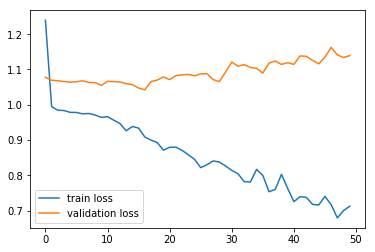

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147485208                                                     
MAE            940.163246  1118.603987  1019.772947   990.690403
RMSE          1266.256896  1519.599872  1451.768558  1427.371413
MAPE             0.137740     0.171190     0.092341     0.090567

array([33.061 , 31.564 , 30.311 , ...,  3.915 ,  0.4923,  1.0809])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 201us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 209us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 192us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 162us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 172us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 162us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 236us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 242us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 177us/step - loss: nan - val_loss: 

> Training Time :  9.292915105819702 s
dict_keys(['val_loss', 'loss'])


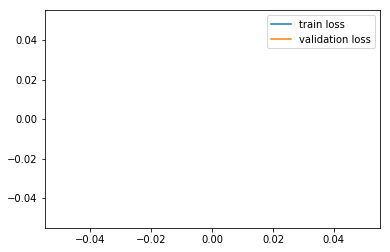

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485335                                                 
MAE                   NaN  12.196688          NaN  18.881953
RMSE                  NaN  28.809925          NaN  46.529204
MAPE                  NaN   0.848874          NaN   4.311681

array([  0.75154,  -9.8535 , -15.931  , ...,   6.2931 ,   7.5439 ,
         1.5786 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.004597543852645894 8.16393128407148


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.09261929, -1.20639213, -1.95082515,  0.01013893,  1.53291314,
        1.50486293,  1.22238872])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 7ms/step - loss: 1.1550 - val_loss: 0.9712
Epoch 2/50
459/459 [==============================] - 0s 351us/step - loss: 0.9607 - val_loss: 0.9257
Epoch 3/50
459/459 [==============================] - 0s 775us/step - loss: 0.9114 - val_loss: 0.8432
Epoch 4/50
459/459 [==============================] - 0s 438us/step - loss: 0.8835 - val_loss: 0.7703
Epoch 5/50
459/459 [==============================] - 0s 348us/step - loss: 0.8398 - val_loss: 0.7012
Epoch 6/50
459/459 [==============================] - 0s 304us/step - loss: 0.8278 - val_loss: 0.6741
Epoch 7/50
459/459 [==============================] - 0s 325us/step - loss: 0.7788 - val_loss: 0.6343
Epoch 8/50
459/459 [==============================] - 0s 255us/step - loss: 0.7248 - val_loss: 0.6020
Epoch 9/50
459/459 [==============================] - 0s 255us/step - loss: 0.6973 - val_loss: 0.5766
Epoch 10/50
459/459 [==================

> Training Time :  10.891714096069336 s
dict_keys(['val_loss', 'loss'])


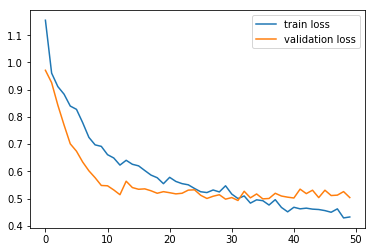

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485511                                                 
MAE              3.798978   6.149124     6.093783   8.371573
RMSE             4.948877   8.166754     7.847475  10.931383
MAPE             0.100979   0.157029     0.082879   0.110483

array([ -0.14476, -11.977  , -15.719  , ...,   1.6663 ,   5.6536 ,
         3.2428 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.1868998207033151 4.103965426235208


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.01026807, -2.87285563, -3.78465668, -2.3397371 , -0.22975344,
       -0.5287813 , -0.33777092])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.3729 - val_loss: 0.4115
Epoch 2/50
459/459 [==============================] - 0s 423us/step - loss: 1.1323 - val_loss: 0.4128
Epoch 3/50
459/459 [==============================] - 0s 475us/step - loss: 1.1034 - val_loss: 0.4134
Epoch 4/50
459/459 [==============================] - 0s 361us/step - loss: 1.0906 - val_loss: 0.4150
Epoch 5/50
459/459 [==============================] - 0s 401us/step - loss: 1.0823 - val_loss: 0.4123
Epoch 6/50
459/459 [==============================] - 0s 407us/step - loss: 1.0633 - val_loss: 0.4126
Epoch 7/50
459/459 [==============================] - 0s 549us/step - loss: 1.0525 - val_loss: 0.4121
Epoch 8/50
459/459 [==============================] - 0s 405us/step - loss: 1.0342 - val_loss: 0.4089
Epoch 9/50
459/459 [==============================] - 0s 427us/step - loss: 1.0257 - val_loss: 0.4073
Epoch 10/50
459/459 [=================

> Training Time :  16.59710383415222 s
dict_keys(['val_loss', 'loss'])


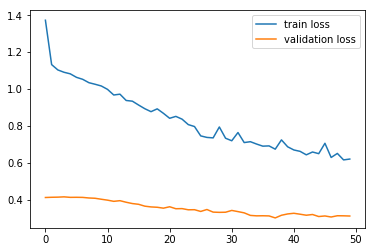

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147485631                                                
MAE              1.851871   2.587475     2.899970  3.204952
RMSE             2.873208   4.112669     4.219681  4.550212
MAPE             0.035772   0.048620     0.044865  0.049484

array([ 446.75,  371.35,  342.05, ...,  341.86, -319.8 , -473.76])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-21.96998938311283 748.2848539092856


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.62639246, 0.52562869, 0.48647248, 0.39904588, 0.28817901,
       0.51892002, 1.18055308])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: 1.3598 - val_loss: 0.7951
Epoch 2/50
459/459 [==============================] - 0s 247us/step - loss: 1.0607 - val_loss: 0.7877
Epoch 3/50
459/459 [==============================] - 0s 230us/step - loss: 1.0389 - val_loss: 0.7862
Epoch 4/50
459/459 [==============================] - 0s 218us/step - loss: 1.0381 - val_loss: 0.7869
Epoch 5/50
459/459 [==============================] - 0s 235us/step - loss: 1.0308 - val_loss: 0.7876
Epoch 6/50
459/459 [==============================] - 0s 246us/step - loss: 1.0330 - val_loss: 0.7913
Epoch 7/50
459/459 [==============================] - 0s 225us/step - loss: 1.0321 - val_loss: 0.7945
Epoch 8/50
459/459 [==============================] - 0s 237us/step - loss: 1.0273 - val_loss: 0.7953
Epoch 9/50
459/459 [==============================] - 0s 244us/step - loss: 1.0201 - val_loss: 0.7906
Epoch 10/50
459/459 [==================

> Training Time :  9.074230909347534 s
dict_keys(['val_loss', 'loss'])


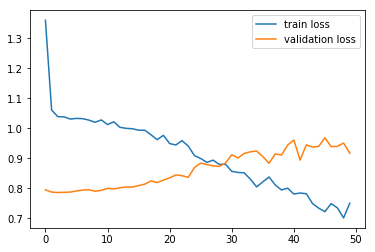

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147485654                                                   
MAE            468.879890  574.346534   682.911455  674.867389
RMSE           612.559561  748.102361   858.649413  852.135081
MAPE             5.189811    5.372895    80.138064   68.619536

array([18.996  ,  3.2527 ,  5.2458 , ..., -1.5641 ,  0.47353, 12.394  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5479102960981599 15.065414835793021


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.22453247,  0.17953636,  0.31183275, -0.22103675, -1.21502863,
       -1.73011567, -2.2833696 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 6ms/step - loss: 1.2360 - val_loss: 1.0730
Epoch 2/50
459/459 [==============================] - 0s 192us/step - loss: 0.9758 - val_loss: 1.0703
Epoch 3/50
459/459 [==============================] - 0s 203us/step - loss: 0.9636 - val_loss: 1.0700
Epoch 4/50
459/459 [==============================] - 0s 218us/step - loss: 0.9582 - val_loss: 1.0695
Epoch 5/50
459/459 [==============================] - 0s 193us/step - loss: 0.9545 - val_loss: 1.0701
Epoch 6/50
459/459 [==============================] - 0s 190us/step - loss: 0.9456 - val_loss: 1.0630
Epoch 7/50
459/459 [==============================] - 0s 205us/step - loss: 0.9374 - val_loss: 1.0551
Epoch 8/50
459/459 [==============================] - 0s 205us/step - loss: 0.9410 - val_loss: 1.0530
Epoch 9/50
459/459 [==============================] - 0s 231us/step - loss: 0.9204 - val_loss: 1.0516
Epoch 10/50
459/459 [==================

> Training Time :  9.54563283920288 s
dict_keys(['val_loss', 'loss'])


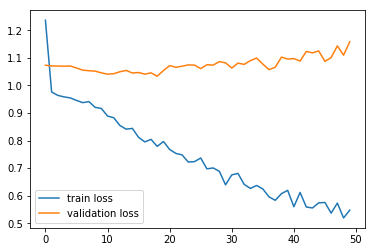

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485727                                                 
MAE              6.505118   8.417533    19.623245  18.333420
RMSE            11.031748  14.927175    29.847439  27.064941
MAPE             0.138551   0.174984     0.288401   0.302890

array([-2.5839, -4.3711, -9.8471, ...,     nan,     nan,     nan])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 305us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 301us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 247us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 451us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 612us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 384us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 303us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 326us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 387us/step - loss: nan - val_loss:

> Training Time :  15.188545942306519 s
dict_keys(['val_loss', 'loss'])


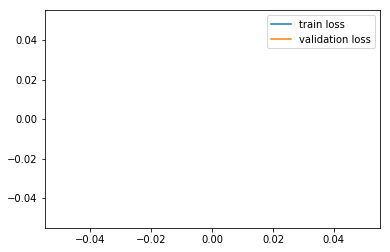

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147485734                                                
MAE                   NaN  26.190356          NaN       NaN
RMSE                  NaN  41.342515          NaN       NaN
MAPE                  NaN   0.065107          NaN       NaN

array([ 323.44, 1142.5 , 1142.2 , ...,  644.69,  534.77,  180.3 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

57.754656527524354 1716.0616960061986


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.15482272, 0.63211325, 0.63193844, 0.63397799, 0.58846681,
       0.57622948, 0.57506402])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 7ms/step - loss: 1.2245 - val_loss: 0.8876
Epoch 2/50
459/459 [==============================] - 0s 217us/step - loss: 1.0392 - val_loss: 0.8842
Epoch 3/50
459/459 [==============================] - 0s 220us/step - loss: 1.0235 - val_loss: 0.8842
Epoch 4/50
459/459 [==============================] - 0s 228us/step - loss: 1.0160 - val_loss: 0.8851
Epoch 5/50
459/459 [==============================] - 0s 230us/step - loss: 1.0137 - val_loss: 0.8852
Epoch 6/50
459/459 [==============================] - 0s 228us/step - loss: 1.0060 - val_loss: 0.8854
Epoch 7/50
459/459 [==============================] - 0s 234us/step - loss: 0.9981 - val_loss: 0.8918
Epoch 8/50
459/459 [==============================] - 0s 236us/step - loss: 0.9849 - val_loss: 0.8976
Epoch 9/50
459/459 [==============================] - 0s 224us/step - loss: 0.9616 - val_loss: 0.8984
Epoch 10/50
459/459 [==================

> Training Time :  9.069453239440918 s
dict_keys(['val_loss', 'loss'])


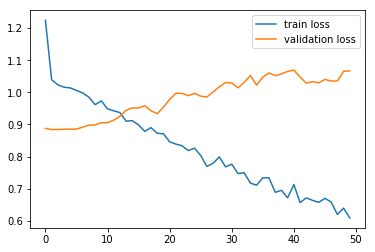

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147485833                                                     
MAE            994.390159  1255.842234  1577.461513  1358.983996
RMSE          1342.624004  1719.550909  2063.919597  1841.830670
MAPE             0.113443     0.143793     0.281504     0.260080

array([ 50.883  ,  24.581  ,  21.308  , ...,   0.72772,   4.462  ,
       -20.547  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 8ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 913us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 346us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 273us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 257us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 255us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 258us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 289us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 273us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 245us/step - loss: nan - val_loss: 

> Training Time :  13.676983118057251 s
dict_keys(['val_loss', 'loss'])


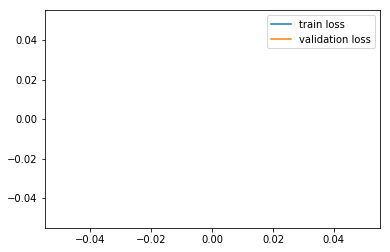

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147485900                                                  
MAE                   NaN   48.299034          NaN  35.068060
RMSE                  NaN  571.660614          NaN  44.640022
MAPE                  NaN    0.253341          NaN   0.103692

array([-37.48 , -48.341, -38.784, ...,  76.46 ,  74.064,  44.263])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 359us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 341us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 564us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 497us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 324us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 289us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 258us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 320us/step - loss: nan - val_loss:

> Training Time :  13.6539888381958 s
dict_keys(['val_loss', 'loss'])


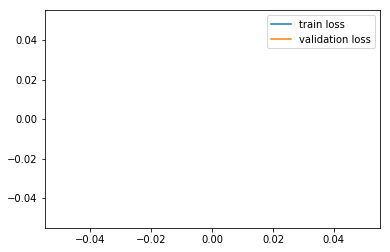

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485928                                                 
MAE                   NaN  31.991154          NaN  32.549718
RMSE                  NaN  49.566869          NaN  44.306736
MAPE                  NaN   2.159457          NaN   2.047173

array([-18.368  , -49.506  , -64.183  , ...,   6.0686 ,  11.88   ,
        -0.76328])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.3005629302988137 16.04205987237775


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.12625419, -3.06727674, -3.98218418, -0.97003983,  0.51346043,
        0.07559272, -0.07054811])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: 1.1920 - val_loss: 0.8506
Epoch 2/50
459/459 [==============================] - 0s 244us/step - loss: 0.9874 - val_loss: 0.8357
Epoch 3/50
459/459 [==============================] - 0s 231us/step - loss: 0.9703 - val_loss: 0.8062
Epoch 4/50
459/459 [==============================] - 0s 217us/step - loss: 0.9277 - val_loss: 0.7690
Epoch 5/50
459/459 [==============================] - 0s 222us/step - loss: 0.8863 - val_loss: 0.7207
Epoch 6/50
459/459 [==============================] - 0s 237us/step - loss: 0.8724 - val_loss: 0.6794
Epoch 7/50
459/459 [==============================] - 0s 235us/step - loss: 0.8285 - val_loss: 0.6478
Epoch 8/50
459/459 [==============================] - 0s 224us/step - loss: 0.8184 - val_loss: 0.6269
Epoch 9/50
459/459 [==============================] - 0s 222us/step - loss: 0.7789 - val_loss: 0.6092
Epoch 10/50
459/459 [=================

> Training Time :  12.68461799621582 s
dict_keys(['val_loss', 'loss'])


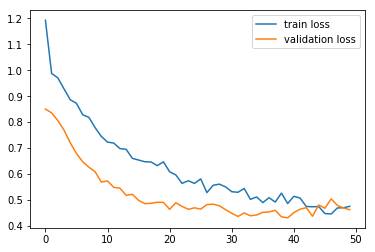

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485934                                                 
MAE              7.008682  11.605527    12.634476  15.745184
RMSE             9.706734  16.038578    16.484238  20.591767
MAPE             0.100102   0.157818     0.077418   0.094965

array([-17.283  , -25.096  , -28.17   , ...,  -6.6672 ,  -4.666  ,
        -0.32232])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.059969074140815065 10.269605724281849


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.68876679, -2.44955549, -2.74888538, -1.86112005, -1.70006226,
       -1.6949014 , -1.52430088])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: 1.2527 - val_loss: 0.7690
Epoch 2/50
459/459 [==============================] - 0s 504us/step - loss: 1.0636 - val_loss: 0.7607
Epoch 3/50
459/459 [==============================] - 0s 337us/step - loss: 1.0467 - val_loss: 0.7606
Epoch 4/50
459/459 [==============================] - 0s 489us/step - loss: 1.0385 - val_loss: 0.7596
Epoch 5/50
459/459 [==============================] - 0s 466us/step - loss: 1.0332 - val_loss: 0.7585
Epoch 6/50
459/459 [==============================] - 0s 340us/step - loss: 1.0318 - val_loss: 0.7595
Epoch 7/50
459/459 [==============================] - 0s 350us/step - loss: 1.0173 - val_loss: 0.7590
Epoch 8/50
459/459 [==============================] - 0s 386us/step - loss: 1.0114 - val_loss: 0.7533
Epoch 9/50
459/459 [==============================] - 0s 321us/step - loss: 0.9956 - val_loss: 0.7532
Epoch 10/50
459/459 [=================

> Training Time :  17.417386054992676 s
dict_keys(['val_loss', 'loss'])


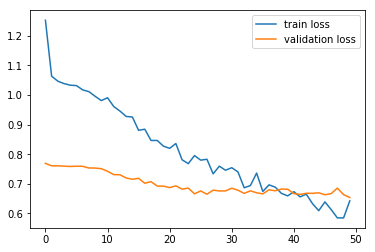

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147485950                                                 
MAE              5.151101   6.650742     8.544933   8.477739
RMSE             7.483285  10.282416    12.926009  12.902758
MAPE             6.901030  11.466026     0.111469   0.107339

array([-281.52, -852.04, -888.56, ...,  373.82,  322.43,  230.99])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 262us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 241us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 250us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 274us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 262us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 264us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 254us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 322us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 312us/step - loss: nan - val_loss: 

> Training Time :  10.200687885284424 s
dict_keys(['val_loss', 'loss'])


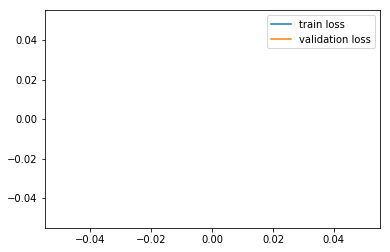

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147486014                                                   
MAE                   NaN  177.177552          NaN  219.302555
RMSE                  NaN  241.739292          NaN  279.796364
MAPE                  NaN    1.863223          NaN    2.287087

array([ -6.2975,  -6.6273,  -7.4351, ..., -56.96  , -62.312 , -92.232 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 10ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 273us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 370us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 306us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 238us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 257us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 342us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 249us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 259us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 239us/step - loss: nan - val_loss:

> Training Time :  13.598922967910767 s
dict_keys(['val_loss', 'loss'])


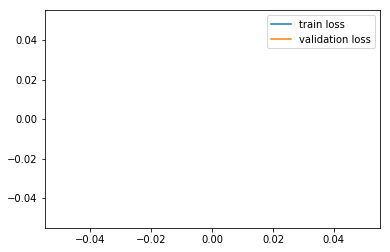

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486326                                                 
MAE                   NaN  37.967668          NaN  35.819442
RMSE                  NaN  66.012739          NaN  46.923707
MAPE                  NaN   0.579923          NaN   0.146518

array([-5.5615, -7.1753, -7.1762, ..., 16.766 , 15.118 , 18.382 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.12683148387317522 12.50201411275324


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.45499321, -0.58407641, -0.5841484 , -0.64081926, -0.19978633,
       -0.09485923,  0.24156656])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.0799 - val_loss: 1.6362
Epoch 2/50
459/459 [==============================] - 0s 502us/step - loss: 0.8921 - val_loss: 1.6279
Epoch 3/50
459/459 [==============================] - 0s 330us/step - loss: 0.8849 - val_loss: 1.6276
Epoch 4/50
459/459 [==============================] - 0s 299us/step - loss: 0.8746 - val_loss: 1.6274
Epoch 5/50
459/459 [==============================] - 0s 282us/step - loss: 0.8670 - val_loss: 1.6349
Epoch 6/50
459/459 [==============================] - 0s 291us/step - loss: 0.8519 - val_loss: 1.6102
Epoch 7/50
459/459 [==============================] - 0s 279us/step - loss: 0.8431 - val_loss: 1.5990
Epoch 8/50
459/459 [==============================] - 0s 281us/step - loss: 0.8233 - val_loss: 1.5862
Epoch 9/50
459/459 [==============================] - 0s 285us/step - loss: 0.8071 - val_loss: 1.5830
Epoch 10/50
459/459 [=================

> Training Time :  14.49410080909729 s
dict_keys(['val_loss', 'loss'])


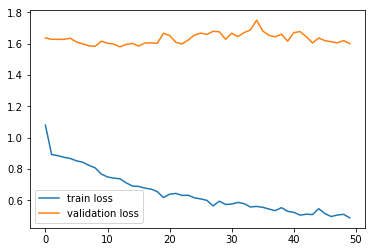

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486481                                                 
MAE              6.858748   9.216810     7.815376   8.749724
RMSE             9.609409  12.512878    10.891639  12.569476
MAPE             4.029090   3.953218     0.128893   0.142162

array([16.501  , 13.64   , 10.678  , ...,  0.87022,  5.1662 , -3.2071 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.20356577100821172 14.800535259669


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.10113816,  0.90783434,  0.70770645,  0.25821595, -0.05921919,
        0.16827325,  0.23981796])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: 1.2620 - val_loss: 0.9745
Epoch 2/50
459/459 [==============================] - 0s 254us/step - loss: 1.0150 - val_loss: 0.9722
Epoch 3/50
459/459 [==============================] - 0s 260us/step - loss: 0.9938 - val_loss: 0.9620
Epoch 4/50
459/459 [==============================] - 0s 248us/step - loss: 0.9712 - val_loss: 0.9559
Epoch 5/50
459/459 [==============================] - 0s 517us/step - loss: 0.9492 - val_loss: 0.9385
Epoch 6/50
459/459 [==============================] - 0s 326us/step - loss: 0.9510 - val_loss: 0.9264
Epoch 7/50
459/459 [==============================] - 0s 293us/step - loss: 0.9240 - val_loss: 0.9017
Epoch 8/50
459/459 [==============================] - 0s 279us/step - loss: 0.8884 - val_loss: 0.8928
Epoch 9/50
459/459 [==============================] - 0s 280us/step - loss: 0.8612 - val_loss: 0.8587
Epoch 10/50
459/459 [==================

> Training Time :  11.665332317352295 s
dict_keys(['val_loss', 'loss'])


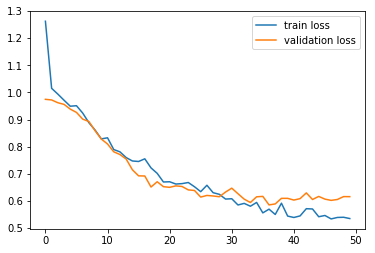

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486535                                                 
MAE              7.124454  10.517009     7.594879   8.941525
RMSE             9.944720  14.863499    10.422061  12.874676
MAPE             0.115710   0.165804     0.076895   0.089223

array([  4.2504,  -9.0612, -10.922 , ...,   4.5919,   4.5487,  -2.2949])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.16178045909998487 8.228928924988313


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.53617919, -1.08147969, -1.30760876,  0.22152099, -1.15954575,
       -1.61712656, -1.47968462])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 16ms/step - loss: 1.2528 - val_loss: 0.8211
Epoch 2/50
459/459 [==============================] - 0s 350us/step - loss: 1.0487 - val_loss: 0.8145
Epoch 3/50
459/459 [==============================] - 0s 377us/step - loss: 1.0313 - val_loss: 0.8148
Epoch 4/50
459/459 [==============================] - 0s 335us/step - loss: 1.0268 - val_loss: 0.8139
Epoch 5/50
459/459 [==============================] - 0s 300us/step - loss: 1.0248 - val_loss: 0.8131
Epoch 6/50
459/459 [==============================] - 0s 346us/step - loss: 1.0188 - val_loss: 0.8077
Epoch 7/50
459/459 [==============================] - 0s 311us/step - loss: 1.0109 - val_loss: 0.8071
Epoch 8/50
459/459 [==============================] - 0s 314us/step - loss: 1.0068 - val_loss: 0.8095
Epoch 9/50
459/459 [==============================] - 0s 300us/step - loss: 0.9968 - val_loss: 0.8127
Epoch 10/50
459/459 [=================

> Training Time :  16.366917848587036 s
dict_keys(['val_loss', 'loss'])


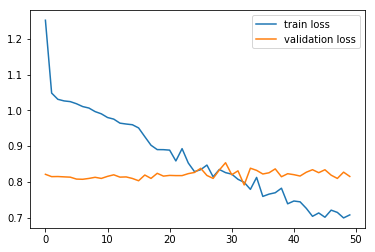

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486603                                                 
MAE              4.862406   5.981684     8.804029   9.372708
RMSE             6.601791   8.239821    11.297363  12.195170
MAPE             0.109519   0.134371     0.109516   0.115711

array([290.04 , 207.32 , 221.99 , ...,  59.804,  23.182, -77.344])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5586726380170309 141.0794098580013


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([2.05190345, 1.465567  , 1.56955099, 1.39674051, 1.66566707,
       2.0003013 , 1.74406264])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 10ms/step - loss: 1.2937 - val_loss: 0.6409
Epoch 2/50
459/459 [==============================] - 0s 346us/step - loss: 1.0588 - val_loss: 0.6425
Epoch 3/50
459/459 [==============================] - 0s 284us/step - loss: 1.0472 - val_loss: 0.6414
Epoch 4/50
459/459 [==============================] - 0s 302us/step - loss: 1.0480 - val_loss: 0.6407
Epoch 5/50
459/459 [==============================] - 0s 311us/step - loss: 1.0404 - val_loss: 0.6394
Epoch 6/50
459/459 [==============================] - 0s 358us/step - loss: 1.0356 - val_loss: 0.6403
Epoch 7/50
459/459 [==============================] - 0s 346us/step - loss: 1.0371 - val_loss: 0.6398
Epoch 8/50
459/459 [==============================] - 0s 293us/step - loss: 1.0297 - val_loss: 0.6391
Epoch 9/50
459/459 [==============================] - 0s 376us/step - loss: 1.0225 - val_loss: 0.6376
Epoch 10/50
459/459 [=================

> Training Time :  12.071199893951416 s
dict_keys(['val_loss', 'loss'])


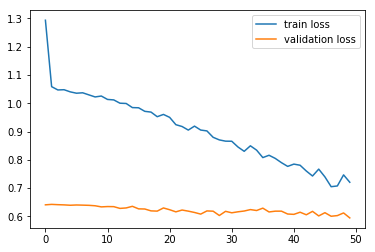

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147486677                                                   
MAE             84.734830  106.367696    82.496850   83.921665
RMSE           110.582639  140.293576   104.629036  105.649257
MAPE             3.427776    6.064501     0.095253    0.097237

array([ 6.8912,  5.3262,  1.3249, ..., -4.3057, -1.425 ,  1.1987])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5707763260340634 19.545968279963365


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.32336201,  0.24329435,  0.03858206, -0.19205886, -0.21826375,
       -0.22860859,  0.18496007])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 8ms/step - loss: 1.2165 - val_loss: 1.2420
Epoch 2/50
459/459 [==============================] - 0s 218us/step - loss: 0.9888 - val_loss: 1.2220
Epoch 3/50
459/459 [==============================] - 0s 220us/step - loss: 0.9749 - val_loss: 1.2190
Epoch 4/50
459/459 [==============================] - 0s 225us/step - loss: 0.9611 - val_loss: 1.2201
Epoch 5/50
459/459 [==============================] - 0s 220us/step - loss: 0.9722 - val_loss: 1.2170
Epoch 6/50
459/459 [==============================] - 0s 346us/step - loss: 0.9548 - val_loss: 1.2144
Epoch 7/50
459/459 [==============================] - 0s 328us/step - loss: 0.9471 - val_loss: 1.2098
Epoch 8/50
459/459 [==============================] - 0s 251us/step - loss: 0.9454 - val_loss: 1.2052
Epoch 9/50
459/459 [==============================] - 0s 227us/step - loss: 0.9321 - val_loss: 1.1992
Epoch 10/50
459/459 [==================

> Training Time :  11.923995733261108 s
dict_keys(['val_loss', 'loss'])


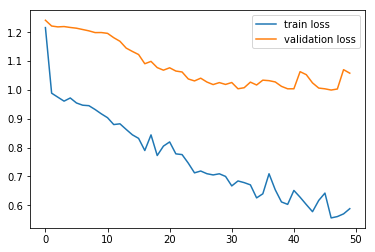

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486772                                                 
MAE              9.940747  12.800599    12.603578  13.157961
RMSE            14.693692  19.636857    17.399645  17.577781
MAPE             0.101915   0.232557     0.070821   0.073918

array([-12.75 , -19.53 , -11.521, ...,  25.165,  23.99 ,  14.293])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 429us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 400us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 344us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 372us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 355us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 447us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 530us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 341us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 349us/step - loss: nan - val_loss:

> Training Time :  13.695204973220825 s
dict_keys(['val_loss', 'loss'])


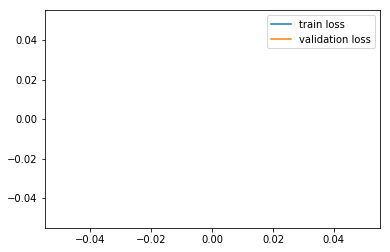

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147486896                                                 
MAE                   NaN  21.709599          NaN  20.458085
RMSE                  NaN  40.107668          NaN  28.771637
MAPE                  NaN   5.125816          NaN   5.512892

array([  7.9396, -10.513 , -14.051 , ..., 101.07  ,  96.367 ,  65.06  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 10ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 293us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 266us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 304us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 306us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 280us/step - loss: nan - val_loss:

> Training Time :  11.885349035263062 s
dict_keys(['val_loss', 'loss'])


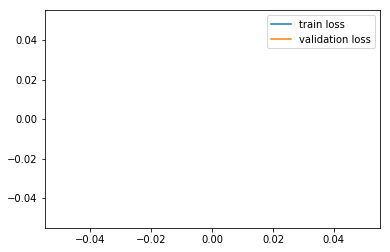

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN   4testFAR
T2147486901                                                    
MAE                   NaN   2229.331451          NaN  21.558982
RMSE                  NaN  41274.653883          NaN  28.660594
MAPE                  NaN     57.130668          NaN   0.649311

array([37.094 , 38.209 , 49.385 , ..., 11.198 ,  9.9588,  4.2695])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.0972098381584551 23.691962360477913


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.56157559, 1.60863797, 2.08035913, 1.93127903, 2.25168305,
       2.04866061, 2.25400452])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.3388 - val_loss: 0.6731
Epoch 2/50
459/459 [==============================] - 1s 1ms/step - loss: 1.0727 - val_loss: 0.6649
Epoch 3/50
459/459 [==============================] - 0s 380us/step - loss: 1.0504 - val_loss: 0.6659
Epoch 4/50
459/459 [==============================] - 0s 417us/step - loss: 1.0496 - val_loss: 0.6663
Epoch 5/50
459/459 [==============================] - 0s 451us/step - loss: 1.0466 - val_loss: 0.6668
Epoch 6/50
459/459 [==============================] - 0s 375us/step - loss: 1.0363 - val_loss: 0.6660
Epoch 7/50
459/459 [==============================] - 0s 371us/step - loss: 1.0367 - val_loss: 0.6701
Epoch 8/50
459/459 [==============================] - 0s 336us/step - loss: 1.0369 - val_loss: 0.6674
Epoch 9/50
459/459 [==============================] - 0s 393us/step - loss: 1.0196 - val_loss: 0.6685
Epoch 10/50
459/459 [===================

> Training Time :  18.20045518875122 s
dict_keys(['val_loss', 'loss'])


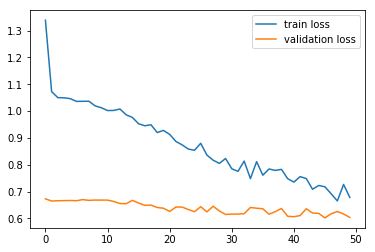

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147487003                                                 
MAE             13.347896  16.625578    19.985131  18.911576
RMSE            18.319750  23.641595    26.933630  26.345774
MAPE             0.158324   0.198654     0.090201   0.086283

array([-121.12 ,  -53.806, -107.63 , ..., -143.38 ,  -96.324,  -83.048])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

5.743549527379869 277.1526321585881


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.45773893, -0.21486193, -0.40906539, -0.35541625, -0.14603704,
       -0.03280918, -0.10185921])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.1157 - val_loss: 1.2473
Epoch 2/50
459/459 [==============================] - 0s 287us/step - loss: 0.9661 - val_loss: 1.2425
Epoch 3/50
459/459 [==============================] - 0s 412us/step - loss: 0.9608 - val_loss: 1.2433
Epoch 4/50
459/459 [==============================] - 0s 402us/step - loss: 0.9567 - val_loss: 1.2449
Epoch 5/50
459/459 [==============================] - 0s 383us/step - loss: 0.9549 - val_loss: 1.2464
Epoch 6/50
459/459 [==============================] - 0s 352us/step - loss: 0.9511 - val_loss: 1.2470
Epoch 7/50
459/459 [==============================] - 0s 281us/step - loss: 0.9521 - val_loss: 1.2487
Epoch 8/50
459/459 [==============================] - 0s 270us/step - loss: 0.9475 - val_loss: 1.2523
Epoch 9/50
459/459 [==============================] - 0s 256us/step - loss: 0.9457 - val_loss: 1.2484
Epoch 10/50
459/459 [=================

> Training Time :  14.007673025131226 s
dict_keys(['val_loss', 'loss'])


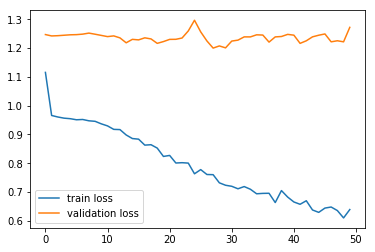

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147487014                                                   
MAE            160.828032  208.341684   214.580255  233.593374
RMSE           219.042997  277.440741   264.842100  286.190856
MAPE             0.249145    0.291902     0.098944    0.108768

array([19.246 ,  7.7167,  2.1863, ...,  6.1494,  7.7296, -2.6295])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.5375546297478712 27.254138055633014


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.72589177,  0.30286244,  0.09994279,  0.23176131,  0.00221378,
       -0.09543671, -0.31086822])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 11ms/step - loss: 1.2318 - val_loss: 0.7361
Epoch 2/50
459/459 [==============================] - 0s 516us/step - loss: 1.0427 - val_loss: 0.7316
Epoch 3/50
459/459 [==============================] - 0s 558us/step - loss: 1.0269 - val_loss: 0.7296
Epoch 4/50
459/459 [==============================] - 0s 546us/step - loss: 1.0092 - val_loss: 0.7248
Epoch 5/50
459/459 [==============================] - 0s 440us/step - loss: 1.0038 - val_loss: 0.7162
Epoch 6/50
459/459 [==============================] - 0s 447us/step - loss: 0.9756 - val_loss: 0.7063
Epoch 7/50
459/459 [==============================] - 0s 464us/step - loss: 0.9676 - val_loss: 0.7000
Epoch 8/50
459/459 [==============================] - 0s 388us/step - loss: 0.9462 - val_loss: 0.6948
Epoch 9/50
459/459 [==============================] - 0s 379us/step - loss: 0.9385 - val_loss: 0.6936
Epoch 10/50
459/459 [=================

> Training Time :  17.605879068374634 s
dict_keys(['val_loss', 'loss'])


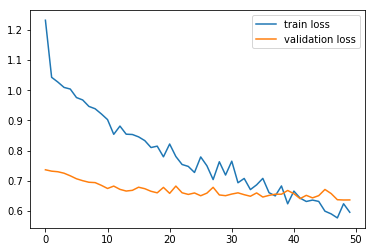

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147487049                                                 
MAE             13.631150  18.882291    31.829533  32.739950
RMSE            19.625928  27.298960    48.546412  48.276545
MAPE             0.056499   0.076913     0.094663   0.096669

array([111.88  ,  67.266 ,  63.82  , ..., -85.564 ,  -7.8434, -69.008 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.851144211395149 58.47127696488855


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.89886148, 1.13585438, 1.07691946, 0.6040377 , 0.90676754,
       1.03488172, 0.95857075])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.3055 - val_loss: 0.8194
Epoch 2/50
459/459 [==============================] - 0s 265us/step - loss: 1.0532 - val_loss: 0.8165
Epoch 3/50
459/459 [==============================] - 0s 257us/step - loss: 1.0330 - val_loss: 0.8171
Epoch 4/50
459/459 [==============================] - 0s 274us/step - loss: 1.0335 - val_loss: 0.8192
Epoch 5/50
459/459 [==============================] - 0s 294us/step - loss: 1.0316 - val_loss: 0.8195
Epoch 6/50
459/459 [==============================] - 0s 272us/step - loss: 1.0211 - val_loss: 0.8151
Epoch 7/50
459/459 [==============================] - 0s 318us/step - loss: 1.0224 - val_loss: 0.8103
Epoch 8/50
459/459 [==============================] - 0s 262us/step - loss: 1.0204 - val_loss: 0.8104
Epoch 9/50
459/459 [==============================] - 0s 304us/step - loss: 1.0169 - val_loss: 0.8160
Epoch 10/50
459/459 [=================

> Training Time :  14.303804159164429 s
dict_keys(['val_loss', 'loss'])


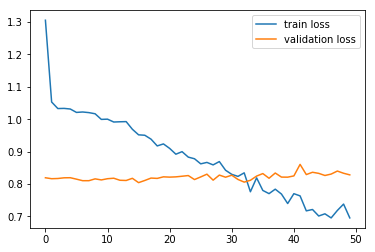

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147487115                                                 
MAE             31.247961  40.143950    62.742239  65.587944
RMSE            46.212864  58.601068    86.085994  87.622669
MAPE             0.486900   0.576444     0.719949   0.770169

array([-57.118, -62.308, -78.441, ..., -63.581, -72.632, -96.152])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 304us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 309us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 337us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 279us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 308us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 267us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 254us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 434us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: na

> Training Time :  15.781917333602905 s
dict_keys(['val_loss', 'loss'])


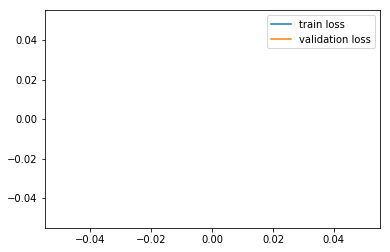

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147487123                                                   
MAE                   NaN   33.318553          NaN   60.732590
RMSE                  NaN   58.469557          NaN   74.711968
MAPE                  NaN  130.477488          NaN  335.271725

array([ -1.368 , -17.906 , -31.673 , ...,  11.636 ,  10.881 ,   6.6468])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.14108737593673962 25.522457189736777


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.05912782, -0.70710619, -1.2465135 , -1.20149432, -1.38729148,
       -1.40676453, -1.58688041])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: 1.2032 - val_loss: 0.8669
Epoch 2/50
459/459 [==============================] - 0s 379us/step - loss: 1.0211 - val_loss: 0.8675
Epoch 3/50
459/459 [==============================] - 0s 368us/step - loss: 1.0136 - val_loss: 0.8686
Epoch 4/50
459/459 [==============================] - 0s 323us/step - loss: 1.0128 - val_loss: 0.8694
Epoch 5/50
459/459 [==============================] - 0s 328us/step - loss: 1.0116 - val_loss: 0.8690
Epoch 6/50
459/459 [==============================] - 0s 390us/step - loss: 1.0067 - val_loss: 0.8691
Epoch 7/50
459/459 [==============================] - 0s 396us/step - loss: 1.0048 - val_loss: 0.8676
Epoch 8/50
459/459 [==============================] - 0s 450us/step - loss: 1.0025 - val_loss: 0.8665
Epoch 9/50
459/459 [==============================] - 0s 319us/step - loss: 0.9962 - val_loss: 0.8641
Epoch 10/50
459/459 [=================

> Training Time :  13.783407211303711 s
dict_keys(['val_loss', 'loss'])


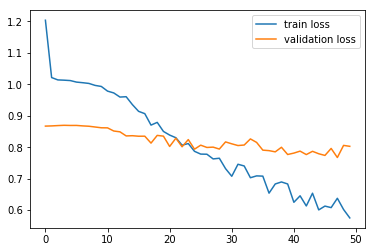

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147487269                                                 
MAE             14.064362  18.614865    24.053683  28.046833
RMSE            18.587409  25.417369    32.743628  38.609993
MAPE             0.102930   0.145471     0.125284   0.161119

array([-167.01, -358.16, -367.07, ...,  298.58,  205.18,  135.07])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.0367394180504863 150.46452708666973


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.10307236, -2.37347146, -2.43268807, -2.65300578, -2.87957081,
       -2.27039068, -1.75465451])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 13s 29ms/step - loss: 1.2389 - val_loss: 1.1447
Epoch 2/50
459/459 [==============================] - 1s 2ms/step - loss: 0.9837 - val_loss: 1.1308
Epoch 3/50
459/459 [==============================] - 0s 617us/step - loss: 0.9762 - val_loss: 1.1304
Epoch 4/50
459/459 [==============================] - 0s 382us/step - loss: 0.9748 - val_loss: 1.1302
Epoch 5/50
459/459 [==============================] - 0s 314us/step - loss: 0.9758 - val_loss: 1.1297
Epoch 6/50
459/459 [==============================] - 0s 337us/step - loss: 0.9750 - val_loss: 1.1299
Epoch 7/50
459/459 [==============================] - 0s 355us/step - loss: 0.9713 - val_loss: 1.1309
Epoch 8/50
459/459 [==============================] - 0s 459us/step - loss: 0.9721 - val_loss: 1.1310
Epoch 9/50
459/459 [==============================] - 0s 322us/step - loss: 0.9695 - val_loss: 1.1309
Epoch 10/50
459/459 [==================

> Training Time :  23.242006063461304 s
dict_keys(['val_loss', 'loss'])


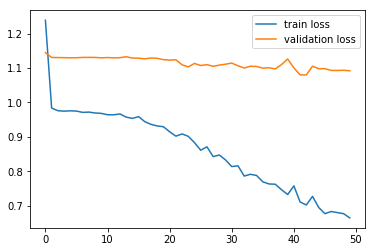

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147487293                                                   
MAE             90.960168  112.706430   172.602630  172.941378
RMSE           121.009956  150.433478   212.207908  210.882335
MAPE             0.593188    0.699834     0.786623    0.790112

array([-42.332 , -54.073 , -42.677 , ...,  67.536 ,  68.455 ,  -3.7622])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 8ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 243us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 305us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 299us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 266us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 284us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 277us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 267us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 257us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 266us/step - loss: nan - val_loss: 

> Training Time :  11.309291124343872 s
dict_keys(['val_loss', 'loss'])


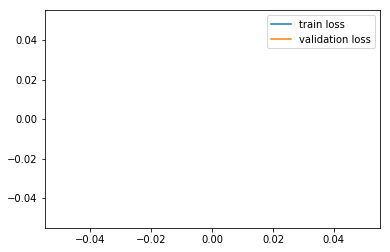

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN    4testFAR
T2147487688                                                     
MAE                   NaN    836.367823          NaN   97.011530
RMSE                  NaN  14871.536939          NaN  162.448312
MAPE                  NaN     23.991593          NaN    0.252239

array([116.17  ,  83.891 ,  48.49  , ...,   4.7292,   5.9991,   2.9442])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 11ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 293us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 317us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 317us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 308us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 325us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 296us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 312us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 296us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 300us/step - loss: nan - val_loss:

> Training Time :  12.704937934875488 s
dict_keys(['val_loss', 'loss'])


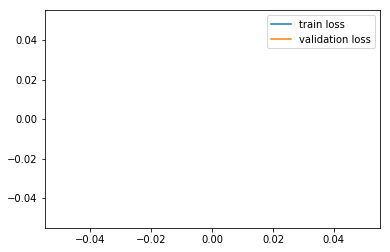

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN   4testFAR
T2147487713                                                    
MAE                   NaN   2582.293206          NaN  31.304004
RMSE                  NaN  54815.025246          NaN  50.922091
MAPE                  NaN     18.261966          NaN   4.318551

array([ -5.7844, -24.813 ,  -4.9567, ...,  42.182 ,  64.997 , -15.86  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 59s 129ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50

> Training Time :  73.28076124191284 s
dict_keys(['val_loss', 'loss'])


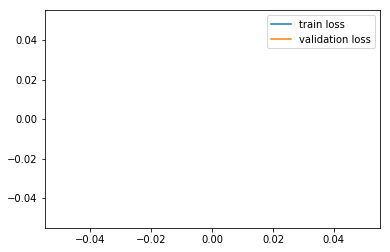

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147487730                                                  
MAE                   NaN   82.419884          NaN  70.870316
RMSE                  NaN  379.769116          NaN  89.724322
MAPE                  NaN    0.203725          NaN   0.089876

array([-317.27, -243.2 , -230.44, ..., -352.95, -359.54, -363.36])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-19.61967482519769 479.9140947379837


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.62021584, -0.46587572, -0.43928763, -0.42497257, -0.39380032,
       -0.5169682 , -0.46087483])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 12ms/step - loss: 1.1909 - val_loss: 0.9858
Epoch 2/50
459/459 [==============================] - 0s 366us/step - loss: 1.0224 - val_loss: 0.9796
Epoch 3/50
459/459 [==============================] - 0s 309us/step - loss: 1.0079 - val_loss: 0.9791
Epoch 4/50
459/459 [==============================] - 0s 321us/step - loss: 1.0065 - val_loss: 0.9781
Epoch 5/50
459/459 [==============================] - 0s 316us/step - loss: 1.0038 - val_loss: 0.9791
Epoch 6/50
459/459 [==============================] - 0s 301us/step - loss: 1.0053 - val_loss: 0.9781
Epoch 7/50
459/459 [==============================] - 0s 293us/step - loss: 1.0015 - val_loss: 0.9755
Epoch 8/50
459/459 [==============================] - 0s 301us/step - loss: 1.0027 - val_loss: 0.9752
Epoch 9/50
459/459 [==============================] - 0s 326us/step - loss: 0.9963 - val_loss: 0.9759
Epoch 10/50
459/459 [=================

> Training Time :  15.810993909835815 s
dict_keys(['val_loss', 'loss'])


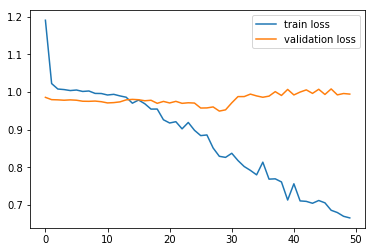

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147487746                                                   
MAE            294.248031  367.929912   394.942788  383.283772
RMSE           383.986768  481.464847   528.172973  491.702488
MAPE            95.601200  122.343001     9.425222   65.025085

array([ -6.4935, -18.73  , -24.057 , ...,  10.979 ,  12.44  ,   6.6884])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.07802480794038932 12.314998215829746


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.53361963, -1.52724544, -1.95980741,  0.56837809,  0.86642117,
        1.07933229,  1.25505298])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 16ms/step - loss: 1.2116 - val_loss: 0.8192
Epoch 2/50
459/459 [==============================] - 0s 412us/step - loss: 0.9210 - val_loss: 0.7510
Epoch 3/50
459/459 [==============================] - 0s 417us/step - loss: 0.8524 - val_loss: 0.6656
Epoch 4/50
459/459 [==============================] - 0s 389us/step - loss: 0.7771 - val_loss: 0.5953
Epoch 5/50
459/459 [==============================] - 0s 383us/step - loss: 0.7243 - val_loss: 0.5478
Epoch 6/50
459/459 [==============================] - 0s 400us/step - loss: 0.7065 - val_loss: 0.5070
Epoch 7/50
459/459 [==============================] - 0s 380us/step - loss: 0.6526 - val_loss: 0.4631
Epoch 8/50
459/459 [==============================] - 0s 379us/step - loss: 0.6120 - val_loss: 0.4545
Epoch 9/50
459/459 [==============================] - 0s 376us/step - loss: 0.6023 - val_loss: 0.4357
Epoch 10/50
459/459 [=================

> Training Time :  17.046855926513672 s
dict_keys(['val_loss', 'loss'])


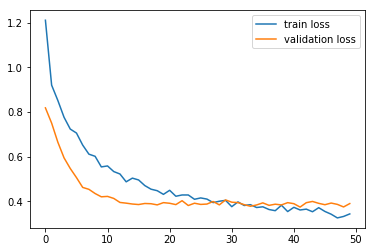

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147487906                                                 
MAE              4.747192   9.648151     8.217287   9.756572
RMSE             6.359226  12.261929    11.449396  13.025639
MAPE             0.106169   0.239902     0.088512   0.103628

array([130.12 , 130.88 , 134.82 , ..., -30.896, -43.911, -51.119])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 453us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 420us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 421us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 399us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 435us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 389us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 366us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 375us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 365us/step - loss: nan - val_loss:

> Training Time :  72.11868500709534 s
dict_keys(['val_loss', 'loss'])


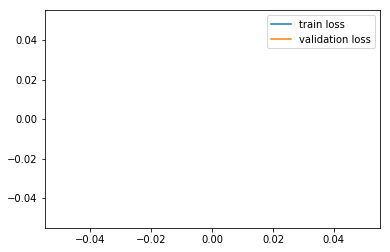

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488005                                                 
MAE                   NaN  65.298347          NaN  65.560856
RMSE                  NaN  97.172690          NaN  84.587085
MAPE                  NaN   1.787451          NaN   0.168294

array([ 1.4148 ,  0.87488,  1.4339 , ..., -5.4118 , -5.9018 , -7.521  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.17729992060599156 9.356690415799271


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.13225831, 0.07455415, 0.13429963, 0.50215406, 0.29926181,
       0.15193407, 0.67041868])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 12ms/step - loss: 1.2815 - val_loss: 0.5625
Epoch 2/50
459/459 [==============================] - 0s 404us/step - loss: 1.0964 - val_loss: 0.5578
Epoch 3/50
459/459 [==============================] - 0s 425us/step - loss: 1.0911 - val_loss: 0.5575
Epoch 4/50
459/459 [==============================] - 0s 406us/step - loss: 1.0893 - val_loss: 0.5567
Epoch 5/50
459/459 [==============================] - 0s 408us/step - loss: 1.0812 - val_loss: 0.5564
Epoch 6/50
459/459 [==============================] - 0s 401us/step - loss: 1.0838 - val_loss: 0.5565
Epoch 7/50
459/459 [==============================] - 0s 345us/step - loss: 1.0794 - val_loss: 0.5568
Epoch 8/50
459/459 [==============================] - 0s 391us/step - loss: 1.0879 - val_loss: 0.5560
Epoch 9/50
459/459 [==============================] - 0s 343us/step - loss: 1.0939 - val_loss: 0.5570
Epoch 10/50
459/459 [=================

> Training Time :  14.852069854736328 s
dict_keys(['val_loss', 'loss'])


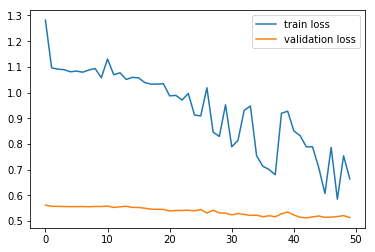

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147488012                                                
MAE              4.871697   5.773996     4.724502  5.014933
RMSE             6.830291   9.391670     6.102235  6.394363
MAPE             0.063898   0.074439     0.054630  0.057979

array([-10.673 , -12.461 ,  -8.2569, ..., -20.554 ,  34.615 ,   1.6129])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 326us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 399us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 325us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 363us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 326us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 446us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 341us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 354us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 367us/step - loss: nan - val_loss:

> Training Time :  15.055519104003906 s
dict_keys(['val_loss', 'loss'])


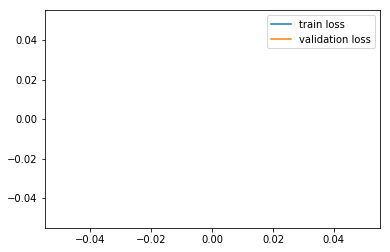

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488217                                                 
MAE                   NaN  26.443073          NaN  40.077328
RMSE                  NaN  50.008026          NaN  54.305766
MAPE                  NaN   0.833450          NaN   0.267965

array([34.052 , 28.66  , 23.6   , ...,  7.8932, 15.113 , 18.08  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.18727297128953763 30.69765564514545


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.10316981, 0.92752122, 0.76268779, 1.10935921, 1.15193575,
       1.53841478, 1.56102237])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.0712 - val_loss: 0.8131
Epoch 2/50
459/459 [==============================] - 0s 484us/step - loss: 0.7893 - val_loss: 0.6960
Epoch 3/50
459/459 [==============================] - 0s 509us/step - loss: 0.6880 - val_loss: 0.5778
Epoch 4/50
459/459 [==============================] - 0s 483us/step - loss: 0.6116 - val_loss: 0.5092
Epoch 5/50
459/459 [==============================] - 0s 510us/step - loss: 0.5399 - val_loss: 0.4634
Epoch 6/50
459/459 [==============================] - 0s 548us/step - loss: 0.5040 - val_loss: 0.4103
Epoch 7/50
459/459 [==============================] - 0s 503us/step - loss: 0.4753 - val_loss: 0.4100
Epoch 8/50
459/459 [==============================] - 0s 586us/step - loss: 0.4326 - val_loss: 0.3808
Epoch 9/50
459/459 [==============================] - 0s 613us/step - loss: 0.4304 - val_loss: 0.3675
Epoch 10/50
459/459 [================

> Training Time :  22.662993907928467 s
dict_keys(['val_loss', 'loss'])


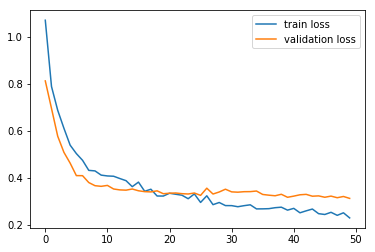

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488311                                                 
MAE              9.452611  25.737312    13.758396  22.710460
RMSE            13.451840  30.627760    18.394206  29.019866
MAPE             0.314903   1.161890     0.248115   0.428945

array([227.13 , 236.46 , 245.16 , ...,  60.711,  56.445,  65.479])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-5.03607257785128 187.5633364101999


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.23780093, 1.28754413, 1.33392846, 1.31585457, 1.30609786,
       1.31644103, 1.32054631])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.2793 - val_loss: 0.4768
Epoch 2/50
459/459 [==============================] - 0s 344us/step - loss: 1.0993 - val_loss: 0.4763
Epoch 3/50
459/459 [==============================] - 0s 333us/step - loss: 1.0839 - val_loss: 0.4765
Epoch 4/50
459/459 [==============================] - 0s 366us/step - loss: 1.0805 - val_loss: 0.4782
Epoch 5/50
459/459 [==============================] - 0s 356us/step - loss: 1.0839 - val_loss: 0.4731
Epoch 6/50
459/459 [==============================] - 0s 337us/step - loss: 1.0713 - val_loss: 0.4705
Epoch 7/50
459/459 [==============================] - 0s 353us/step - loss: 1.0500 - val_loss: 0.4711
Epoch 8/50
459/459 [==============================] - 0s 346us/step - loss: 1.0437 - val_loss: 0.4735
Epoch 9/50
459/459 [==============================] - 0s 347us/step - loss: 1.0230 - val_loss: 0.4716
Epoch 10/50
459/459 [=================

> Training Time :  104.26862978935242 s
dict_keys(['val_loss', 'loss'])


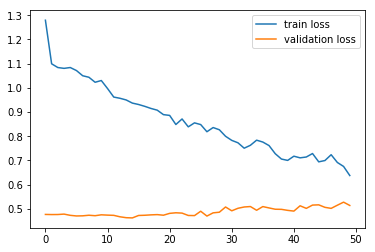

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147488361                                                   
MAE            100.355248  134.270124   152.292093  148.045186
RMSE           139.135815  188.151653   208.795627  216.688056
MAPE             0.240053    0.254666     0.205042    0.202613

array([16.197 , 16.853 , 16.16  , ...,  6.6608,  7.4385,  4.6366])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.0265055528588808 10.791336274090334


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.50338245, 1.56417195, 1.49995377, 1.76442519, 1.40283883,
       1.73495711, 1.42776623])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: 1.0164 - val_loss: 1.8001
Epoch 2/50
459/459 [==============================] - 0s 351us/step - loss: 0.8407 - val_loss: 1.7961
Epoch 3/50
459/459 [==============================] - 0s 335us/step - loss: 0.8264 - val_loss: 1.7752
Epoch 4/50
459/459 [==============================] - 0s 345us/step - loss: 0.8150 - val_loss: 1.7489
Epoch 5/50
459/459 [==============================] - 0s 343us/step - loss: 0.8018 - val_loss: 1.7061
Epoch 6/50
459/459 [==============================] - 0s 355us/step - loss: 0.7991 - val_loss: 1.7060
Epoch 7/50
459/459 [==============================] - 0s 351us/step - loss: 0.7748 - val_loss: 1.6868
Epoch 8/50
459/459 [==============================] - 0s 347us/step - loss: 0.7619 - val_loss: 1.6603
Epoch 9/50
459/459 [==============================] - 0s 330us/step - loss: 0.7710 - val_loss: 1.6635
Epoch 10/50
459/459 [=================

> Training Time :  16.6140239238739 s
dict_keys(['val_loss', 'loss'])


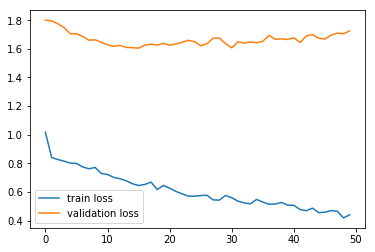

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488381                                                 
MAE              5.164694   7.378490     8.083962   8.740363
RMSE             8.118415  10.756116    13.268215  13.832570
MAPE             0.385694   0.484031     7.116926   6.986261

array([ 38.852, -46.488, -36.288, ...,  24.877,  24.518, -11.945])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 346us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 357us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 354us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 352us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 355us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 348us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 341us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 326us/step - loss: nan - val_loss:

> Training Time :  14.416437864303589 s
dict_keys(['val_loss', 'loss'])


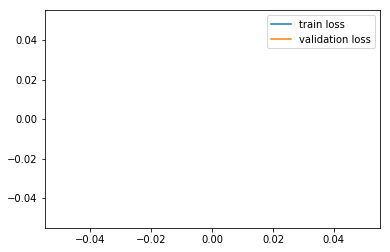

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147488413                                                  
MAE                   NaN   25.414796          NaN  51.470398
RMSE                  NaN  130.131665          NaN  68.425336
MAPE                  NaN   10.712681          NaN   0.536597

array([26.218 , 17.194 , 28.376 , ..., 16.099 , 10.817 ,  4.0689])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 11ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 353us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 360us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 409us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 361us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 384us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 368us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 369us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 395us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 471us/step - loss: nan - val_loss:

> Training Time :  15.91957712173462 s
dict_keys(['val_loss', 'loss'])


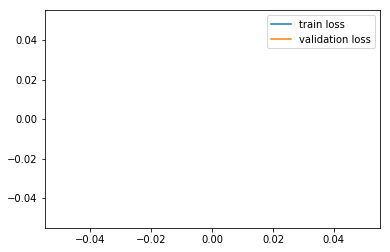

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488623                                                 
MAE                   NaN  11.952189          NaN  11.300277
RMSE                  NaN  16.243998          NaN  14.394105
MAPE                  NaN  34.161402          NaN   0.083269

array([-11.887  ,  -8.3361 ,  -3.9262 , ...,  -0.45065,   1.0376 ,
         0.39866])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.6222852023357666 15.308286336470553


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.81715778, -0.58519843, -0.29712569, -0.49885304,  0.01658676,
        0.08727396, -0.32563966])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.0965 - val_loss: 1.7819
Epoch 2/50
459/459 [==============================] - 0s 404us/step - loss: 0.8843 - val_loss: 1.7838
Epoch 3/50
459/459 [==============================] - 0s 394us/step - loss: 0.8666 - val_loss: 1.7685
Epoch 4/50
459/459 [==============================] - 0s 389us/step - loss: 0.8597 - val_loss: 1.7589
Epoch 5/50
459/459 [==============================] - 0s 407us/step - loss: 0.8542 - val_loss: 1.7470
Epoch 6/50
459/459 [==============================] - 0s 401us/step - loss: 0.8469 - val_loss: 1.7114
Epoch 7/50
459/459 [==============================] - 0s 417us/step - loss: 0.8429 - val_loss: 1.6991
Epoch 8/50
459/459 [==============================] - 0s 398us/step - loss: 0.8261 - val_loss: 1.6446
Epoch 9/50
459/459 [==============================] - 0s 412us/step - loss: 0.8150 - val_loss: 1.5731
Epoch 10/50
459/459 [=================

> Training Time :  20.846104860305786 s
dict_keys(['val_loss', 'loss'])


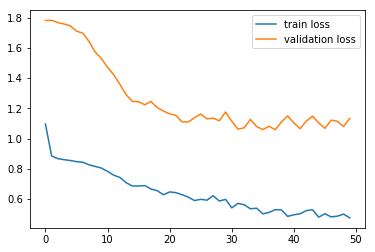

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488854                                                 
MAE              7.479523   9.867853     9.318157   9.779826
RMSE            11.070169  15.401520    12.520790  12.752707
MAPE             0.066646   0.090682     0.076498   0.079852

array([44.672 , 25.883 , 34.743 , ...,  2.1461,  9.6048,  2.1666])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.014437008854744696 21.41668950214147


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([2.08652402, 1.20921756, 1.62291362, 1.8751935 , 1.04705431,
       0.89922567, 1.0370621 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 346s 754ms/step - loss: 1.1171 - val_loss: 1.3269
Epoch 2/50
459/459 [==============================] - 0s 271us/step - loss: 0.9271 - val_loss: 1.3256
Epoch 3/50
459/459 [==============================] - 0s 261us/step - loss: 0.9176 - val_loss: 1.3277
Epoch 4/50
459/459 [==============================] - 0s 323us/step - loss: 0.9132 - val_loss: 1.3274
Epoch 5/50
459/459 [==============================] - 0s 262us/step - loss: 0.8999 - val_loss: 1.3415
Epoch 6/50
459/459 [==============================] - 0s 271us/step - loss: 0.8796 - val_loss: 1.3408
Epoch 7/50
459/459 [==============================] - 0s 256us/step - loss: 0.8759 - val_loss: 1.3413
Epoch 8/50
459/459 [==============================] - 0s 332us/step - loss: 0.8519 - val_loss: 1.3345
Epoch 9/50
459/459 [==============================] - 0s 326us/step - loss: 0.8456 - val_loss: 1.3307
Epoch 10/50
459/459 [==============

> Training Time :  357.1311197280884 s
dict_keys(['val_loss', 'loss'])


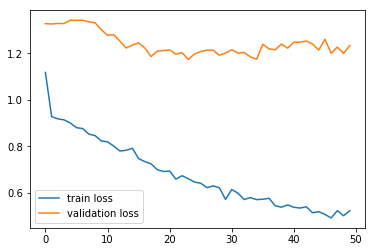

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147488999                                                 
MAE             10.550841  14.557718    10.788116  10.780283
RMSE            15.439155  21.309803    17.100321  18.310968
MAPE             0.052232   0.072970     0.036084   0.036406

array([29.549 , 26.464 , 27.256 , ..., -2.9642, -1.5817, -5.0288])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.11606110489156245 7.637780179116927


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([3.85359859, 3.44968542, 3.55338047, 3.15391885, 3.13153015,
       2.79648516, 2.80002021])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: 1.2494 - val_loss: 0.8655
Epoch 2/50
459/459 [==============================] - 0s 325us/step - loss: 1.0263 - val_loss: 0.8609
Epoch 3/50
459/459 [==============================] - 0s 405us/step - loss: 1.0092 - val_loss: 0.8596
Epoch 4/50
459/459 [==============================] - 0s 363us/step - loss: 1.0017 - val_loss: 0.8569
Epoch 5/50
459/459 [==============================] - 0s 375us/step - loss: 0.9964 - val_loss: 0.8594
Epoch 6/50
459/459 [==============================] - 0s 380us/step - loss: 1.0018 - val_loss: 0.8480
Epoch 7/50
459/459 [==============================] - 0s 351us/step - loss: 0.9873 - val_loss: 0.8301
Epoch 8/50
459/459 [==============================] - 0s 382us/step - loss: 0.9819 - val_loss: 0.8265
Epoch 9/50
459/459 [==============================] - 0s 334us/step - loss: 0.9460 - val_loss: 0.8079
Epoch 10/50
459/459 [=================

> Training Time :  179.06103610992432 s
dict_keys(['val_loss', 'loss'])


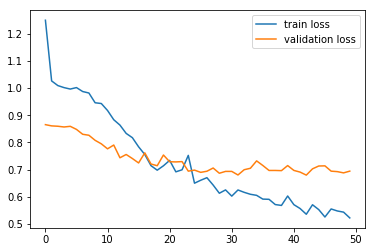

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147489034                                                
MAE              3.620246   5.106611     6.192116  7.307127
RMSE             5.182825   7.599723     8.496696  9.793713
MAPE             0.058653   0.085625     0.074052  0.090594

array([ 1.7871, -7.7311, -7.7591, ..., -6.9418, -4.8291, -7.8146])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.6444371253233727 14.327738763298871


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.07975179, -0.58456797, -0.58652222, -0.53629098, -0.67658528,
       -0.68512117, -0.41781451])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 4s 9ms/step - loss: 1.2963 - val_loss: 0.5404
Epoch 2/50
459/459 [==============================] - 0s 238us/step - loss: 1.0840 - val_loss: 0.5391
Epoch 3/50
459/459 [==============================] - 0s 218us/step - loss: 1.0720 - val_loss: 0.5385
Epoch 4/50
459/459 [==============================] - 0s 228us/step - loss: 1.0649 - val_loss: 0.5370
Epoch 5/50
459/459 [==============================] - 0s 235us/step - loss: 1.0586 - val_loss: 0.5362
Epoch 6/50
459/459 [==============================] - 0s 220us/step - loss: 1.0506 - val_loss: 0.5317
Epoch 7/50
459/459 [==============================] - 0s 219us/step - loss: 1.0368 - val_loss: 0.5311
Epoch 8/50
459/459 [==============================] - 0s 227us/step - loss: 1.0153 - val_loss: 0.5292
Epoch 9/50
459/459 [==============================] - 0s 268us/step - loss: 1.0167 - val_loss: 0.5200
Epoch 10/50
459/459 [==================

> Training Time :  10.35617995262146 s
dict_keys(['val_loss', 'loss'])


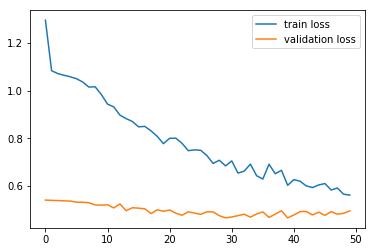

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147489077                                                 
MAE              7.136196  10.121593     9.250581  10.471831
RMSE             9.841016  14.291646    13.461340  14.409176
MAPE             0.128304   0.206519     0.098257   0.108185

array([-13.612,  30.96 ,  55.729, ..., -30.834, -44.198,  29.588])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.4092974888990262 85.11678707989847


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.16473011,  0.35892688,  0.64992705,  0.064838  , -0.03644167,
        0.02611591,  0.12209933])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.1636 - val_loss: 1.3395
Epoch 2/50
459/459 [==============================] - 0s 293us/step - loss: 0.9510 - val_loss: 1.3235
Epoch 3/50
459/459 [==============================] - 0s 304us/step - loss: 0.9459 - val_loss: 1.3231
Epoch 4/50
459/459 [==============================] - 0s 308us/step - loss: 0.9410 - val_loss: 1.3267
Epoch 5/50
459/459 [==============================] - 0s 317us/step - loss: 0.9314 - val_loss: 1.3291
Epoch 6/50
459/459 [==============================] - 0s 304us/step - loss: 0.9365 - val_loss: 1.3290
Epoch 7/50
459/459 [==============================] - 0s 298us/step - loss: 0.9308 - val_loss: 1.3282
Epoch 8/50
459/459 [==============================] - 0s 296us/step - loss: 0.9194 - val_loss: 1.3251
Epoch 9/50
459/459 [==============================] - 0s 319us/step - loss: 0.9220 - val_loss: 1.3306
Epoch 10/50
459/459 [=================

> Training Time :  13.41381573677063 s
dict_keys(['val_loss', 'loss'])


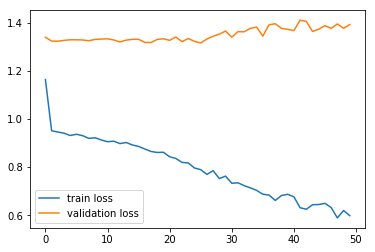

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147489248                                                 
MAE             50.721083  63.319214    69.280763  66.907499
RMSE            68.513034  85.235974    92.175076  89.093506
MAPE             0.191511   0.243055     0.136085   0.132000

array([-0.32091,  0.27892,  2.3976 , ...,  4.2568 ,  0.88583,  4.2344 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.20698133185827244 5.744137793314918


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.09190088,  0.01252384,  0.38136597,  0.05687166,  0.21918323,
        0.35399894,  0.27015694])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 10ms/step - loss: 1.3306 - val_loss: 0.5544
Epoch 2/50
459/459 [==============================] - 0s 255us/step - loss: 1.0682 - val_loss: 0.5491
Epoch 3/50
459/459 [==============================] - 0s 261us/step - loss: 1.0471 - val_loss: 0.5490
Epoch 4/50
459/459 [==============================] - 0s 256us/step - loss: 1.0417 - val_loss: 0.5452
Epoch 5/50
459/459 [==============================] - 0s 257us/step - loss: 1.0269 - val_loss: 0.5432
Epoch 6/50
459/459 [==============================] - 0s 257us/step - loss: 1.0445 - val_loss: 0.5407
Epoch 7/50
459/459 [==============================] - 0s 272us/step - loss: 1.0333 - val_loss: 0.5360
Epoch 8/50
459/459 [==============================] - 0s 270us/step - loss: 1.0059 - val_loss: 0.5301
Epoch 9/50
459/459 [==============================] - 0s 269us/step - loss: 1.0097 - val_loss: 0.5254
Epoch 10/50
459/459 [=================

> Training Time :  11.326045989990234 s
dict_keys(['val_loss', 'loss'])


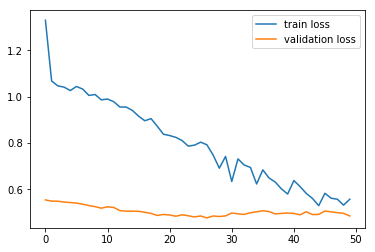

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147489345                                                
MAE              2.587191   3.493580     3.536453  3.737669
RMSE             3.836724   5.676007     4.554099  4.791755
MAPE             0.140557   0.407241     0.057213  0.060325

array([54.892 , 39.151 , 47.181 , ..., 10.272 ,  7.4529,  7.2393])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 350us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 371us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 356us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 360us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 478us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 386us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 374us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 370us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 408us/step - loss: nan - val_loss:

> Training Time :  15.554455041885376 s
dict_keys(['val_loss', 'loss'])


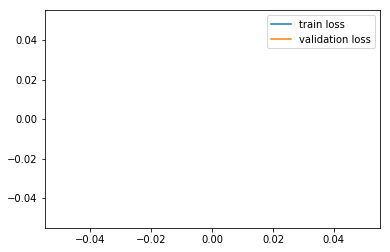

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147489364                                                 
MAE                   NaN  30.994093          NaN  31.430014
RMSE                  NaN  59.689608          NaN  41.609518
MAPE                  NaN   0.719625          NaN   0.093543

array([22.592 ,  1.7738, 14.308 , ..., 10.262 ,  9.7967, -1.7404])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 10ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 268us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 263us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 263us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 263us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 263us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 258us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 268us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 270us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 297us/step - loss: nan - val_loss:

> Training Time :  11.460904836654663 s
dict_keys(['val_loss', 'loss'])


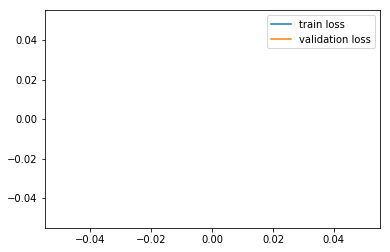

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147489834                                                 
MAE                   NaN  10.938185          NaN  13.252504
RMSE                  NaN  14.804515          NaN  18.616217
MAPE                  NaN   0.646149          NaN   0.105749

array([-27.476 , -45.246 , -71.701 , ...,   6.9878,  -1.9332,  -3.3978])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

4.073107269388683 293.69391778785604


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.10742172, -0.16792689, -0.25800367, -0.1887547 , -0.20455346,
        0.31888264,  0.56813193])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: 1.2104 - val_loss: 0.8275
Epoch 2/50
459/459 [==============================] - 0s 379us/step - loss: 1.0429 - val_loss: 0.8238
Epoch 3/50
459/459 [==============================] - 0s 362us/step - loss: 1.0305 - val_loss: 0.8252
Epoch 4/50
459/459 [==============================] - 0s 384us/step - loss: 1.0287 - val_loss: 0.8236
Epoch 5/50
459/459 [==============================] - 0s 340us/step - loss: 1.0289 - val_loss: 0.8220
Epoch 6/50
459/459 [==============================] - 0s 376us/step - loss: 1.0241 - val_loss: 0.8220
Epoch 7/50
459/459 [==============================] - 0s 389us/step - loss: 1.0170 - val_loss: 0.8244
Epoch 8/50
459/459 [==============================] - 0s 366us/step - loss: 1.0114 - val_loss: 0.8265
Epoch 9/50
459/459 [==============================] - 0s 363us/step - loss: 1.0098 - val_loss: 0.8293
Epoch 10/50
459/459 [=================

> Training Time :  15.172960996627808 s
dict_keys(['val_loss', 'loss'])


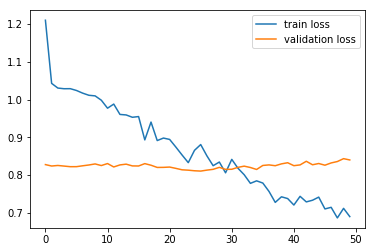

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147490001                                                   
MAE            176.987452  221.899814   207.702668  212.828264
RMSE           232.455476  293.607652   268.880050  273.014684
MAPE            39.659653   41.784251     0.235287    0.247057

array([  0.12557, -21.128  , -23.648  , ...,   6.1332 ,   9.83   ,
         7.1206 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.04893833730231177 26.99881257167585


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.00283833, -0.78436555, -0.87770298,  0.4809864 ,  0.32406468,
        0.25784696,  0.17210245])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 12ms/step - loss: 1.1094 - val_loss: 1.4389
Epoch 2/50
459/459 [==============================] - 0s 269us/step - loss: 0.9168 - val_loss: 1.4364
Epoch 3/50
459/459 [==============================] - 0s 250us/step - loss: 0.9104 - val_loss: 1.4334
Epoch 4/50
459/459 [==============================] - 0s 273us/step - loss: 0.9047 - val_loss: 1.4275
Epoch 5/50
459/459 [==============================] - 0s 328us/step - loss: 0.9013 - val_loss: 1.4129
Epoch 6/50
459/459 [==============================] - 0s 352us/step - loss: 0.8896 - val_loss: 1.4061
Epoch 7/50
459/459 [==============================] - 0s 343us/step - loss: 0.8812 - val_loss: 1.3803
Epoch 8/50
459/459 [==============================] - 0s 933us/step - loss: 0.8501 - val_loss: 1.3585
Epoch 9/50
459/459 [==============================] - 0s 759us/step - loss: 0.8384 - val_loss: 1.3282
Epoch 10/50
459/459 [=================

> Training Time :  15.01472520828247 s
dict_keys(['val_loss', 'loss'])


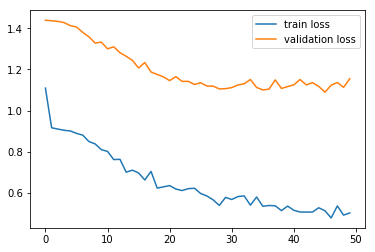

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490028                                                 
MAE             13.295777  17.586816    19.693213  20.740698
RMSE            19.651451  26.895216    24.890384  26.259708
MAPE             0.158284   0.227563     0.091158   0.095982

array([  0.98934,  -2.3524 , -10.705  , ...,   8.0876 ,  10.046  ,
         3.4158 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.06940877053984192 6.359494414923975


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.16648317, -0.35898942, -1.67239572, -0.09522474,  0.48653377,
        0.31034051,  0.19129017])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.3219 - val_loss: 0.6577
Epoch 2/50
459/459 [==============================] - 0s 952us/step - loss: 1.0501 - val_loss: 0.6570
Epoch 3/50
459/459 [==============================] - 0s 734us/step - loss: 1.0387 - val_loss: 0.6562
Epoch 4/50
459/459 [==============================] - 0s 600us/step - loss: 1.0340 - val_loss: 0.6560
Epoch 5/50
459/459 [==============================] - 0s 886us/step - loss: 1.0279 - val_loss: 0.6547
Epoch 6/50
459/459 [==============================] - 0s 865us/step - loss: 1.0217 - val_loss: 0.6531
Epoch 7/50
459/459 [==============================] - 0s 1ms/step - loss: 1.0143 - val_loss: 0.6491
Epoch 8/50
459/459 [==============================] - 0s 702us/step - loss: 1.0125 - val_loss: 0.6439
Epoch 9/50
459/459 [==============================] - 0s 1ms/step - loss: 0.9994 - val_loss: 0.6410
Epoch 10/50
459/459 [=====================

> Training Time :  22.4933819770813 s
dict_keys(['val_loss', 'loss'])


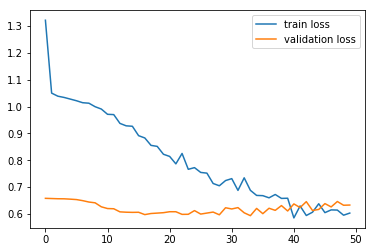

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147490079                                                
MAE              3.343274   4.513717     5.285182  6.070610
RMSE             4.518090   6.308319     7.111944  7.933391
MAPE             0.097985   0.125763     0.055547  0.063757

array([ 42.94  ,   7.8882, -10.24  , ..., -98.584 , -95.632 , -74.238 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 582us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 695us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 648us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 640us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 553us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 460us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 442us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 444us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 397us/step - loss: nan - val_loss:

> Training Time :  18.599087953567505 s
dict_keys(['val_loss', 'loss'])


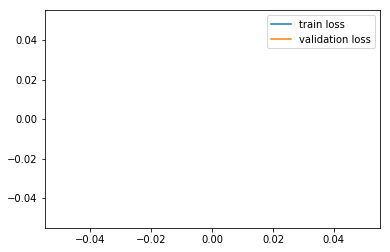

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490314                                                 
MAE                   NaN  20.327071          NaN  19.191464
RMSE                  NaN  30.475941          NaN  26.365444
MAPE                  NaN   0.349056          NaN   0.091619

array([-6.1264,  5.2117,  6.2044, ..., -2.1134, -2.5682, -2.7517])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 422us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 400us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 419us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 397us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 467us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 374us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 359us/step - loss: nan - val_loss:

> Training Time :  20.43134093284607 s
dict_keys(['val_loss', 'loss'])


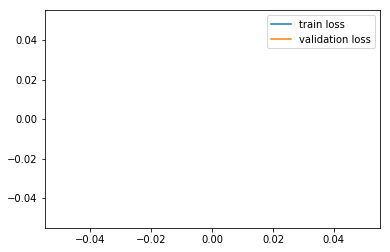

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490336                                                 
MAE                   NaN  25.664504          NaN   9.619727
RMSE                  NaN  40.833633          NaN  17.936776
MAPE                  NaN   0.889585          NaN   0.908720

array([ 88.209,  43.354,  43.129, ..., -24.809,  30.548,  28.498])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.044344502813260356 64.73392557403788


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.36332447,  0.67041113,  0.66693537,  0.30687687, -0.00587119,
        0.34134102,  0.11821227])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 16ms/step - loss: 1.1715 - val_loss: 1.0700
Epoch 2/50
459/459 [==============================] - 0s 391us/step - loss: 0.9763 - val_loss: 1.0615
Epoch 3/50
459/459 [==============================] - 0s 403us/step - loss: 0.9627 - val_loss: 1.0487
Epoch 4/50
459/459 [==============================] - 0s 498us/step - loss: 0.9270 - val_loss: 0.9955
Epoch 5/50
459/459 [==============================] - 0s 345us/step - loss: 0.9097 - val_loss: 0.9372
Epoch 6/50
459/459 [==============================] - 0s 340us/step - loss: 0.8347 - val_loss: 0.8978
Epoch 7/50
459/459 [==============================] - 0s 367us/step - loss: 0.8152 - val_loss: 0.8705
Epoch 8/50
459/459 [==============================] - 0s 388us/step - loss: 0.7635 - val_loss: 0.8482
Epoch 9/50
459/459 [==============================] - 0s 426us/step - loss: 0.7681 - val_loss: 0.8423
Epoch 10/50
459/459 [=================

> Training Time :  17.307220935821533 s
dict_keys(['val_loss', 'loss'])


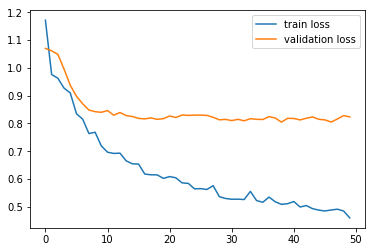

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490350                                                 
MAE             33.607311  52.681604    46.785131  50.919709
RMSE            43.484535  64.740935    60.730090  65.196684
MAPE             0.275786   0.498727     0.419112   0.454076

array([-16.581 , -41.708 , -48.711 , ...,   2.6727,   4.4225,  -2.8509])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.19850240998783453 7.662178377741521


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-2.13809922, -5.41745383, -6.33142368, -2.78948055,  2.06109825,
        1.22268132,  1.30699155])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 0.9430 - val_loss: 2.2698
Epoch 2/50
459/459 [==============================] - 0s 375us/step - loss: 0.7633 - val_loss: 2.2703
Epoch 3/50
459/459 [==============================] - 0s 357us/step - loss: 0.7447 - val_loss: 2.3091
Epoch 4/50
459/459 [==============================] - 0s 381us/step - loss: 0.7446 - val_loss: 2.3270
Epoch 5/50
459/459 [==============================] - 0s 328us/step - loss: 0.7307 - val_loss: 2.3508
Epoch 6/50
459/459 [==============================] - 0s 371us/step - loss: 0.7152 - val_loss: 2.4209
Epoch 7/50
459/459 [==============================] - 0s 466us/step - loss: 0.6990 - val_loss: 2.4787
Epoch 8/50
459/459 [==============================] - 0s 295us/step - loss: 0.6856 - val_loss: 2.5506
Epoch 9/50
459/459 [==============================] - 0s 344us/step - loss: 0.6662 - val_loss: 2.6199
Epoch 10/50
459/459 [=================

> Training Time :  16.48213505744934 s
dict_keys(['val_loss', 'loss'])


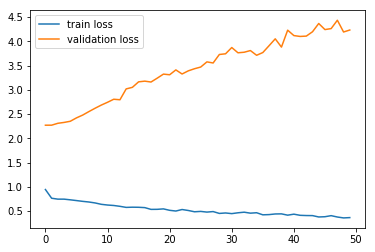

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490432                                                 
MAE              3.586699   4.732614     7.350403   8.626902
RMSE             7.222407   7.598978    13.988146  15.062952
MAPE             0.099988   0.130464     0.074629   0.086439

array([ 50.142,  41.385,  39.44 , ..., -36.582, -31.164, -21.323])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 16ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 400us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 396us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 361us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 329us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 331us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 349us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 328us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 347us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 374us/step - loss: nan - val_loss:

> Training Time :  16.47003483772278 s
dict_keys(['val_loss', 'loss'])


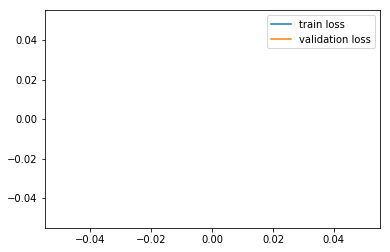

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490545                                                 
MAE                   NaN  21.792886          NaN  49.606505
RMSE                  NaN  36.997338          NaN  71.007419
MAPE                  NaN   0.716165          NaN  16.656172

array([49.522 , 26.837 , 32.953 , ..., 32.938 , 34.761 , -3.1505])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.6366452111922138 48.65556897716035


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.98417007, 0.51793362, 0.64363351, 0.51955727, 0.25666856,
       0.12880036, 0.23917827])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 5s 12ms/step - loss: 0.9871 - val_loss: 1.9613
Epoch 2/50
459/459 [==============================] - 0s 330us/step - loss: 0.8123 - val_loss: 1.9376
Epoch 3/50
459/459 [==============================] - 0s 346us/step - loss: 0.7859 - val_loss: 1.9080
Epoch 4/50
459/459 [==============================] - 0s 304us/step - loss: 0.7597 - val_loss: 1.8739
Epoch 5/50
459/459 [==============================] - 0s 382us/step - loss: 0.7294 - val_loss: 1.8441
Epoch 6/50
459/459 [==============================] - 0s 351us/step - loss: 0.7045 - val_loss: 1.8458
Epoch 7/50
459/459 [==============================] - 0s 563us/step - loss: 0.6450 - val_loss: 1.8225
Epoch 8/50
459/459 [==============================] - 0s 490us/step - loss: 0.6468 - val_loss: 1.7987
Epoch 9/50
459/459 [==============================] - 0s 693us/step - loss: 0.6188 - val_loss: 1.8133
Epoch 10/50
459/459 [=================

> Training Time :  18.265177011489868 s
dict_keys(['val_loss', 'loss'])


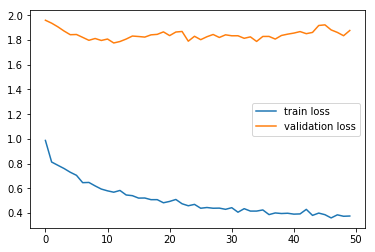

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490583                                                 
MAE             23.356436  36.081728    23.306695  30.212079
RMSE            35.147499  48.856138    30.758611  38.413780
MAPE             2.012418   1.933926     0.070300   0.091242

array([120.46 ,  84.74 ,  95.262, ...,  39.849,  54.289,  11.275])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.7567096019996963 51.65537846868102


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([2.31734417, 1.62583826, 1.82953437, 1.81089159, 1.3701824 ,
       1.38717966, 2.07767891])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.2066 - val_loss: 0.8821
Epoch 2/50
459/459 [==============================] - 0s 286us/step - loss: 1.0028 - val_loss: 0.8822
Epoch 3/50
459/459 [==============================] - 0s 303us/step - loss: 0.9817 - val_loss: 0.8724
Epoch 4/50
459/459 [==============================] - 0s 286us/step - loss: 0.9561 - val_loss: 0.8534
Epoch 5/50
459/459 [==============================] - 0s 293us/step - loss: 0.9489 - val_loss: 0.8393
Epoch 6/50
459/459 [==============================] - 0s 293us/step - loss: 0.9419 - val_loss: 0.8210
Epoch 7/50
459/459 [==============================] - 0s 294us/step - loss: 0.9184 - val_loss: 0.7919
Epoch 8/50
459/459 [==============================] - 0s 304us/step - loss: 0.8832 - val_loss: 0.7886
Epoch 9/50
459/459 [==============================] - 0s 298us/step - loss: 0.8775 - val_loss: 0.7742
Epoch 10/50
459/459 [=================

> Training Time :  17.245941162109375 s
dict_keys(['val_loss', 'loss'])


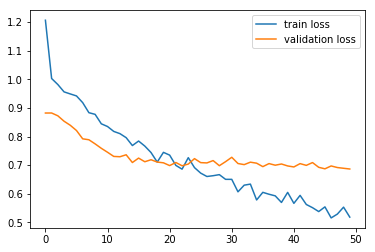

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490587                                                 
MAE             25.646860  37.744254    47.839323  53.190568
RMSE            35.111047  51.401822    63.035561  69.379472
MAPE             0.116741   0.165386     0.099908   0.111957

array([58.043, 26.059, 16.981, ..., 44.784, 53.568, 53.843])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.43203974820635643 25.978160066255057


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 2.25093077,  1.01974273,  0.67029534, -0.10373561, -0.9322046 ,
       -0.68830742, -0.49087234])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.2460 - val_loss: 0.9311
Epoch 2/50
459/459 [==============================] - 0s 357us/step - loss: 1.0183 - val_loss: 0.9369
Epoch 3/50
459/459 [==============================] - 0s 351us/step - loss: 1.0036 - val_loss: 0.9357
Epoch 4/50
459/459 [==============================] - 0s 340us/step - loss: 1.0013 - val_loss: 0.9330
Epoch 5/50
459/459 [==============================] - 0s 332us/step - loss: 0.9982 - val_loss: 0.9325
Epoch 6/50
459/459 [==============================] - 0s 332us/step - loss: 0.9907 - val_loss: 0.9285
Epoch 7/50
459/459 [==============================] - 0s 303us/step - loss: 0.9875 - val_loss: 0.9165
Epoch 8/50
459/459 [==============================] - 0s 334us/step - loss: 0.9824 - val_loss: 0.9116
Epoch 9/50
459/459 [==============================] - 0s 399us/step - loss: 0.9688 - val_loss: 0.9007
Epoch 10/50
459/459 [=================

> Training Time :  18.41471529006958 s
dict_keys(['val_loss', 'loss'])


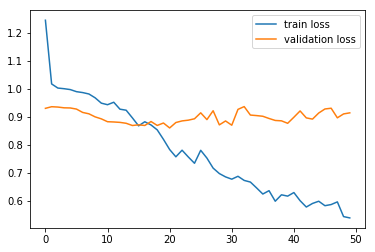

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490738                                                 
MAE             12.488817  17.331503    35.443859  35.103387
RMSE            18.626906  25.984892    47.033902  45.251570
MAPE             0.087967   0.116476     0.123899   0.121925

array([ 74.914 ,  65.677 ,  67.226 , ...,  -9.6162, -13.923 ,   2.884 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-3.6634383476049273 45.76611992207722


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.71693468,  1.51510415,  1.54895015,  0.93065434,  0.02792105,
       -0.84358389, -1.57001646])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: 1.3074 - val_loss: 0.9100
Epoch 2/50
459/459 [==============================] - 0s 339us/step - loss: 1.0333 - val_loss: 0.8873
Epoch 3/50
459/459 [==============================] - 0s 312us/step - loss: 1.0209 - val_loss: 0.8846
Epoch 4/50
459/459 [==============================] - 0s 313us/step - loss: 1.0062 - val_loss: 0.8849
Epoch 5/50
459/459 [==============================] - 0s 309us/step - loss: 1.0000 - val_loss: 0.8856
Epoch 6/50
459/459 [==============================] - 0s 323us/step - loss: 0.9973 - val_loss: 0.8838
Epoch 7/50
459/459 [==============================] - 0s 306us/step - loss: 0.9918 - val_loss: 0.8854
Epoch 8/50
459/459 [==============================] - 0s 304us/step - loss: 0.9913 - val_loss: 0.8829
Epoch 9/50
459/459 [==============================] - 0s 403us/step - loss: 0.9751 - val_loss: 0.8853
Epoch 10/50
459/459 [=================

> Training Time :  15.502187967300415 s
dict_keys(['val_loss', 'loss'])


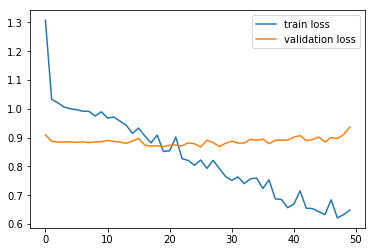

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147490746                                                 
MAE             24.842991  31.507837    34.477852  32.917000
RMSE            34.893824  45.721242    45.592898  43.647888
MAPE             0.107423   0.132510     0.077556   0.074083

array([ 1.8565  ,  0.15399 , -2.1079  , ...,  0.17892 ,  0.21054 ,
        0.092726])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

21.344497842931187 503.2668054669476


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.03872299, -0.04210591, -0.04660033, -0.03623247, -0.04490977,
       -0.03897674, -0.04601595])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.6474 - val_loss: 0.0019
Epoch 2/50
459/459 [==============================] - 0s 316us/step - loss: 1.3860 - val_loss: 0.0019
Epoch 3/50
459/459 [==============================] - 0s 386us/step - loss: 1.3118 - val_loss: 0.0021
Epoch 4/50
459/459 [==============================] - 0s 417us/step - loss: 1.2501 - val_loss: 0.0020
Epoch 5/50
459/459 [==============================] - 0s 382us/step - loss: 1.2158 - val_loss: 0.0019
Epoch 6/50
459/459 [==============================] - 0s 527us/step - loss: 1.2083 - val_loss: 0.0020
Epoch 7/50
459/459 [==============================] - 0s 411us/step - loss: 1.2110 - val_loss: 0.0021
Epoch 8/50
459/459 [==============================] - 0s 420us/step - loss: 1.2059 - val_loss: 0.0022
Epoch 9/50
459/459 [==============================] - 0s 465us/step - loss: 1.2072 - val_loss: 0.0022
Epoch 10/50
459/459 [=================

> Training Time :  18.070656061172485 s
dict_keys(['val_loss', 'loss'])


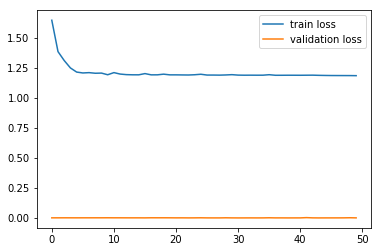

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN  4testFAR
T2147491045                                                 
MAE             33.807938   25.472537    10.276391  1.809484
RMSE           504.535128  506.964549    14.360386  6.416722
MAPE             0.464668    0.325978     0.272123  0.055780

array([-5.5451, -7.607 , -7.2345, ...,  1.9295,  7.9926, 10.891 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.11906256161572377 10.894129057323623


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.49806987, -0.68733695, -0.65314422, -0.3747741 ,  0.00945771,
        0.56269414,  0.70530306])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.2571 - val_loss: 0.9907
Epoch 2/50
459/459 [==============================] - 0s 255us/step - loss: 1.0096 - val_loss: 0.9863
Epoch 3/50
459/459 [==============================] - 0s 261us/step - loss: 0.9969 - val_loss: 0.9852
Epoch 4/50
459/459 [==============================] - 0s 279us/step - loss: 0.9899 - val_loss: 0.9820
Epoch 5/50
459/459 [==============================] - 0s 256us/step - loss: 0.9738 - val_loss: 0.9805
Epoch 6/50
459/459 [==============================] - 0s 246us/step - loss: 0.9778 - val_loss: 0.9776
Epoch 7/50
459/459 [==============================] - 0s 251us/step - loss: 0.9641 - val_loss: 0.9703
Epoch 8/50
459/459 [==============================] - 0s 273us/step - loss: 0.9499 - val_loss: 0.9661
Epoch 9/50
459/459 [==============================] - 0s 275us/step - loss: 0.9442 - val_loss: 0.9596
Epoch 10/50
459/459 [=================

> Training Time :  14.26714015007019 s
dict_keys(['val_loss', 'loss'])


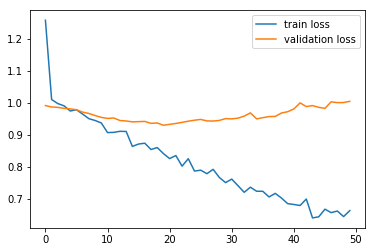

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491140                                                 
MAE              6.683998   8.662135     9.797502   9.903360
RMSE             8.497505  10.908518    12.338185  12.403917
MAPE             0.099858   0.133580     0.193744   0.184990

array([-12.88 , -15.083, -22.613, ...,  10.469,  10.097,  11.832])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.537035543597932 30.678684327052416


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.43734064, -0.50914946, -0.75459675, -0.72151189, -0.90020274,
       -0.74410086, -0.61342381])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.2492 - val_loss: 0.8334
Epoch 2/50
459/459 [==============================] - 0s 280us/step - loss: 1.0451 - val_loss: 0.8296
Epoch 3/50
459/459 [==============================] - 0s 282us/step - loss: 1.0291 - val_loss: 0.8273
Epoch 4/50
459/459 [==============================] - 0s 290us/step - loss: 1.0220 - val_loss: 0.8244
Epoch 5/50
459/459 [==============================] - 0s 274us/step - loss: 1.0086 - val_loss: 0.8239
Epoch 6/50
459/459 [==============================] - 0s 264us/step - loss: 0.9903 - val_loss: 0.8190
Epoch 7/50
459/459 [==============================] - 0s 246us/step - loss: 0.9800 - val_loss: 0.8115
Epoch 8/50
459/459 [==============================] - 0s 241us/step - loss: 0.9629 - val_loss: 0.8015
Epoch 9/50
459/459 [==============================] - 0s 248us/step - loss: 0.9355 - val_loss: 0.7921
Epoch 10/50
459/459 [=================

> Training Time :  14.62467098236084 s
dict_keys(['val_loss', 'loss'])


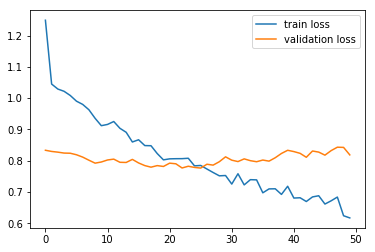

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491164                                                 
MAE             16.989616  22.482649    18.489144  19.627912
RMSE            23.535474  30.786591    27.579733  28.599903
MAPE             0.060191   0.079557     0.047515   0.050670

array([124.17  ,  77.068 ,  40.362 , ...,  -8.2483,  13.239 ,  -1.1221])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 270us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 298us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 271us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 268us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 264us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 253us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 250us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 275us/step - loss: nan - val_loss:

> Training Time :  13.913273811340332 s
dict_keys(['val_loss', 'loss'])


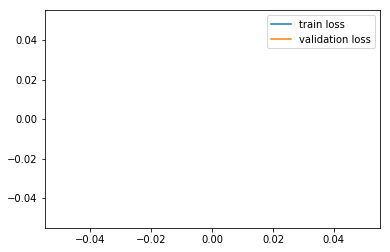

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147491211                                                   
MAE                   NaN   55.169562          NaN  137.129650
RMSE                  NaN  108.528915          NaN  239.716935
MAPE                  NaN    0.079905          NaN    0.149210

array([-4.3977 , -0.33123,  2.4588 , ..., 27.159  , 37.839  , 48.877  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.8012818038245126 42.1479943587336


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.12335063, -0.02686989,  0.03932615,  0.16400349,  0.33533549,
        0.47562686,  0.49456014])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 12ms/step - loss: 1.1980 - val_loss: 0.9792
Epoch 2/50
459/459 [==============================] - 0s 257us/step - loss: 1.0104 - val_loss: 0.9743
Epoch 3/50
459/459 [==============================] - 0s 267us/step - loss: 0.9984 - val_loss: 0.9742
Epoch 4/50
459/459 [==============================] - 0s 269us/step - loss: 0.9876 - val_loss: 0.9747
Epoch 5/50
459/459 [==============================] - 0s 262us/step - loss: 0.9743 - val_loss: 0.9792
Epoch 6/50
459/459 [==============================] - 0s 262us/step - loss: 0.9569 - val_loss: 0.9760
Epoch 7/50
459/459 [==============================] - 0s 277us/step - loss: 0.9474 - val_loss: 0.9576
Epoch 8/50
459/459 [==============================] - 0s 252us/step - loss: 0.9414 - val_loss: 0.9393
Epoch 9/50
459/459 [==============================] - 0s 250us/step - loss: 0.9211 - val_loss: 0.9221
Epoch 10/50
459/459 [=================

> Training Time :  12.897706031799316 s
dict_keys(['val_loss', 'loss'])


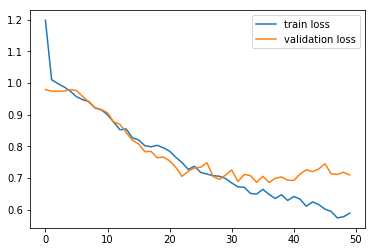

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491243                                                 
MAE             22.899256  32.331790    31.826918  36.956013
RMSE            30.276529  42.075146    41.751899  48.255202
MAPE             0.179633   0.252926     0.107755   0.123378

array([ 5.5511e-17, -6.1062e-16, -4.9960e-16, ...,  2.3622e+00,
       -1.7324e+00, -8.7328e+00])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 271us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 267us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 267us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 274us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 278us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 259us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 260us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 306us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 287us/step - loss: nan - val_loss:

> Training Time :  14.984513998031616 s
dict_keys(['val_loss', 'loss'])


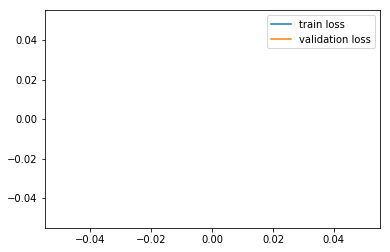

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147491283                                                  
MAE                   NaN   48.425650          NaN  48.025870
RMSE                  NaN  447.972468          NaN  63.352634
MAPE                  NaN    8.603258          NaN   4.064602

array([-1767.8, -2021.4, -2034.4, ...,  1436.2,  1462.9,  1606.5])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-178.4453029276156 3029.1011503316936


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.52469515, -0.60841636, -0.61270806, -0.59233898, -0.62142352,
       -0.62053217, -0.61544815])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 6s 13ms/step - loss: 1.1877 - val_loss: 1.3871
Epoch 2/50
459/459 [==============================] - 0s 247us/step - loss: 0.9522 - val_loss: 1.3787
Epoch 3/50
459/459 [==============================] - 0s 244us/step - loss: 0.9478 - val_loss: 1.3731
Epoch 4/50
459/459 [==============================] - 0s 240us/step - loss: 0.9467 - val_loss: 1.3713
Epoch 5/50
459/459 [==============================] - 0s 243us/step - loss: 0.9385 - val_loss: 1.3693
Epoch 6/50
459/459 [==============================] - 0s 240us/step - loss: 0.9407 - val_loss: 1.3711
Epoch 7/50
459/459 [==============================] - 0s 252us/step - loss: 0.9374 - val_loss: 1.3721
Epoch 8/50
459/459 [==============================] - 0s 249us/step - loss: 0.9351 - val_loss: 1.3766
Epoch 9/50
459/459 [==============================] - 0s 246us/step - loss: 0.9259 - val_loss: 1.3782
Epoch 10/50
459/459 [=================

> Training Time :  13.905728816986084 s
dict_keys(['val_loss', 'loss'])


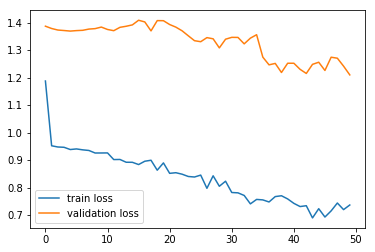

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147491379                                                     
MAE           1778.694840  2117.377842  2007.692046  1963.656455
RMSE          2568.935893  3049.451244  2975.644605  2879.454508
MAPE             0.094149     0.109727     0.106935     0.103826

array([18.083  , -0.32256,  0.59022, ..., 24.703  , 24.943  ,  9.6815 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 370us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 408us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 346us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 397us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 339us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 348us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 322us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 333us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 339us/step - loss: nan - val_loss:

> Training Time :  16.92787218093872 s
dict_keys(['val_loss', 'loss'])


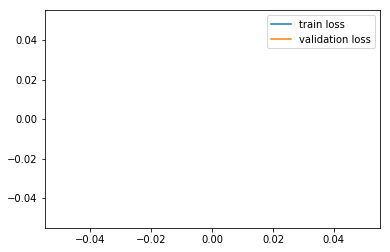

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147491397                                                  
MAE                   NaN   92.685051          NaN  36.482242
RMSE                  NaN  173.202628          NaN  84.850547
MAPE                  NaN    1.135112          NaN   0.960730

array([ 1.0589  ,  0.5797  , -0.53042 , ..., -1.8203  , -0.075055,
       -0.24987 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.17742880298053518 13.12217788566741


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.09421674,  0.05769841, -0.02690035,  0.5149091 ,  0.61844374,
        0.66242272,  0.61311688])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.1705 - val_loss: 1.3411
Epoch 2/50
459/459 [==============================] - 0s 291us/step - loss: 0.9560 - val_loss: 1.3307
Epoch 3/50
459/459 [==============================] - 0s 281us/step - loss: 0.9524 - val_loss: 1.3342
Epoch 4/50
459/459 [==============================] - 0s 385us/step - loss: 0.9428 - val_loss: 1.3342
Epoch 5/50
459/459 [==============================] - 0s 355us/step - loss: 0.9261 - val_loss: 1.3337
Epoch 6/50
459/459 [==============================] - 0s 333us/step - loss: 0.9177 - val_loss: 1.3311
Epoch 7/50
459/459 [==============================] - 0s 295us/step - loss: 0.9225 - val_loss: 1.3218
Epoch 8/50
459/459 [==============================] - 0s 363us/step - loss: 0.9035 - val_loss: 1.3164
Epoch 9/50
459/459 [==============================] - 0s 369us/step - loss: 0.8797 - val_loss: 1.3119
Epoch 10/50
459/459 [=================

> Training Time :  15.897959232330322 s
dict_keys(['val_loss', 'loss'])


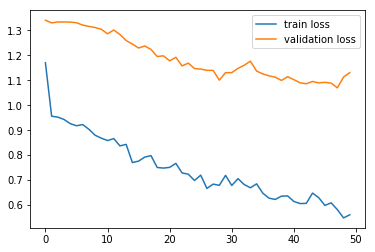

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491413                                                 
MAE              6.588835   8.359585     7.923796   8.215895
RMSE            10.053449  13.193090    10.968710  11.596349
MAPE             0.131667   0.169520     0.169617   0.170475

array([ -1.724 , -23.803 , -32.461 , ...,  11.616 ,  14.082 ,   1.7442])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.4516614593600973 11.042603921411091


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.11522088, -2.11465871, -2.89871291, -2.67485267, -0.17011735,
       -0.61641607, -1.05168479])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.2518 - val_loss: 0.6548
Epoch 2/50
459/459 [==============================] - 0s 373us/step - loss: 1.0323 - val_loss: 0.6432
Epoch 3/50
459/459 [==============================] - 0s 449us/step - loss: 0.9961 - val_loss: 0.6300
Epoch 4/50
459/459 [==============================] - 0s 452us/step - loss: 0.9750 - val_loss: 0.6200
Epoch 5/50
459/459 [==============================] - 0s 596us/step - loss: 0.9517 - val_loss: 0.5830
Epoch 6/50
459/459 [==============================] - 0s 400us/step - loss: 0.9097 - val_loss: 0.5744
Epoch 7/50
459/459 [==============================] - 0s 367us/step - loss: 0.9098 - val_loss: 0.5614
Epoch 8/50
459/459 [==============================] - 0s 359us/step - loss: 0.8617 - val_loss: 0.5600
Epoch 9/50
459/459 [==============================] - 0s 384us/step - loss: 0.8383 - val_loss: 0.5499
Epoch 10/50
459/459 [=================

> Training Time :  18.88775086402893 s
dict_keys(['val_loss', 'loss'])


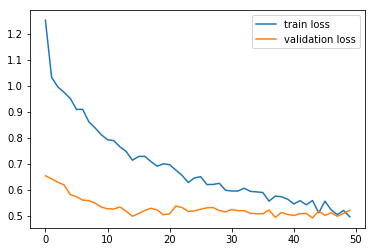

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491459                                                 
MAE              4.904332   7.450597    10.699517  12.562023
RMSE             7.096334  11.006133    14.850999  16.952665
MAPE             0.515168   1.548045     0.086412   0.101818

array([ -1.0713, -26.531 , -39.237 , ...,  11.649 ,  12.989 ,   2.7159])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.3342596979774938 14.653269751777986


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.05029869, -1.78777438, -2.65488461, -2.33495601,  0.5559619 ,
        0.17676326, -0.58409082])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.3019 - val_loss: 0.7078
Epoch 2/50
459/459 [==============================] - 0s 346us/step - loss: 1.0459 - val_loss: 0.7070
Epoch 3/50
459/459 [==============================] - 0s 399us/step - loss: 1.0300 - val_loss: 0.6993
Epoch 4/50
459/459 [==============================] - 0s 310us/step - loss: 1.0086 - val_loss: 0.6868
Epoch 5/50
459/459 [==============================] - 0s 288us/step - loss: 0.9897 - val_loss: 0.6756
Epoch 6/50
459/459 [==============================] - 0s 288us/step - loss: 0.9901 - val_loss: 0.6550
Epoch 7/50
459/459 [==============================] - 0s 284us/step - loss: 0.9709 - val_loss: 0.6491
Epoch 8/50
459/459 [==============================] - 0s 331us/step - loss: 0.9499 - val_loss: 0.6202
Epoch 9/50
459/459 [==============================] - 0s 415us/step - loss: 0.9363 - val_loss: 0.6295
Epoch 10/50
459/459 [=================

> Training Time :  15.400453329086304 s
dict_keys(['val_loss', 'loss'])


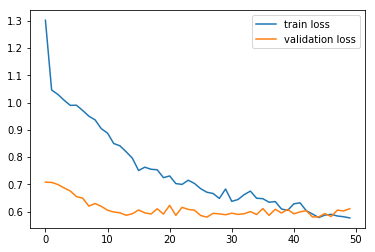

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491467                                                 
MAE              7.428906  10.642436    21.566881  21.145755
RMSE            10.170694  14.643521    40.514207  37.495959
MAPE             0.091555   0.123812     0.132645   0.133460

array([26.249 , 19.407 , 24.9   , ..., -5.0568,  1.0446, -3.0313])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.08983936362910586 14.78694449936551


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.78122258, 1.31851711, 1.68999345, 1.87650933, 1.6997994 ,
       1.55460375, 1.06674096])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: 1.2950 - val_loss: 0.4836
Epoch 2/50
459/459 [==============================] - 0s 333us/step - loss: 1.0749 - val_loss: 0.4762
Epoch 3/50
459/459 [==============================] - 0s 363us/step - loss: 1.0371 - val_loss: 0.4652
Epoch 4/50
459/459 [==============================] - 0s 343us/step - loss: 1.0184 - val_loss: 0.4566
Epoch 5/50
459/459 [==============================] - ETA: 0s - loss: 0.983 - 0s 346us/step - loss: 0.9734 - val_loss: 0.4369
Epoch 6/50
459/459 [==============================] - 0s 362us/step - loss: 0.9380 - val_loss: 0.4331
Epoch 7/50
459/459 [==============================] - 0s 367us/step - loss: 0.9053 - val_loss: 0.4066
Epoch 8/50
459/459 [==============================] - 0s 332us/step - loss: 0.8716 - val_loss: 0.3952
Epoch 9/50
459/459 [==============================] - 0s 348us/step - loss: 0.8579 - val_loss: 0.3862
Epoch 10/50
45

> Training Time :  17.380517959594727 s
dict_keys(['val_loss', 'loss'])


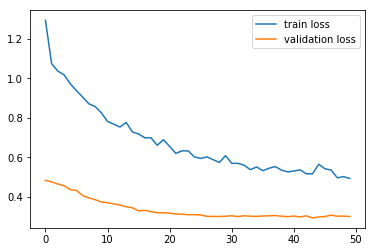

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491528                                                 
MAE              6.429559  10.758862     6.859041   9.106978
RMSE             9.106266  14.730138     9.125555  11.648108
MAPE             0.053823   0.090469     0.048884   0.065036

array([32.24  , 48.997 , 49.807 , ...,  6.3408,  5.4666,  5.6814])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5071068374163624 18.708496505552077


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.69617549, 2.59186478, 2.63516062, 2.7042736 , 2.75141795,
       2.68759668, 2.64884424])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.0601 - val_loss: 0.6483
Epoch 2/50
459/459 [==============================] - 0s 361us/step - loss: 0.8112 - val_loss: 0.5681
Epoch 3/50
459/459 [==============================] - 0s 353us/step - loss: 0.7009 - val_loss: 0.5036
Epoch 4/50
459/459 [==============================] - 0s 289us/step - loss: 0.6367 - val_loss: 0.4592
Epoch 5/50
459/459 [==============================] - 0s 402us/step - loss: 0.5876 - val_loss: 0.4446
Epoch 6/50
459/459 [==============================] - 0s 455us/step - loss: 0.5701 - val_loss: 0.4247
Epoch 7/50
459/459 [==============================] - 0s 442us/step - loss: 0.5397 - val_loss: 0.4041
Epoch 8/50
459/459 [==============================] - 0s 537us/step - loss: 0.5015 - val_loss: 0.3746
Epoch 9/50
459/459 [==============================] - 0s 390us/step - loss: 0.5015 - val_loss: 0.3641
Epoch 10/50
459/459 [=================

> Training Time :  19.24117088317871 s
dict_keys(['val_loss', 'loss'])


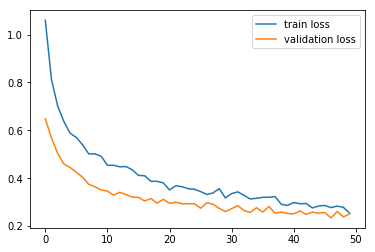

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491571                                                 
MAE              6.254608  14.627665     8.442862  15.361666
RMSE             8.454217  18.628078    10.989915  20.260726
MAPE             0.083917   0.207385     0.075980   0.139058

array([27.524 , 19.151 , 18.464 , ..., 18.64  , 17.209 ,  1.3282])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6131839324703467 12.118954890243124


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 2.32175003,  1.63084887,  1.57416082,  0.66712716, -0.0234786 ,
       -0.26073338, -0.60620046])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.2861 - val_loss: 0.6492
Epoch 2/50
459/459 [==============================] - 0s 624us/step - loss: 1.0835 - val_loss: 0.6499
Epoch 3/50
459/459 [==============================] - 0s 691us/step - loss: 1.0681 - val_loss: 0.6501
Epoch 4/50
459/459 [==============================] - 0s 831us/step - loss: 1.0544 - val_loss: 0.6506
Epoch 5/50
459/459 [==============================] - 0s 667us/step - loss: 1.0601 - val_loss: 0.6496
Epoch 6/50
459/459 [==============================] - 0s 397us/step - loss: 1.0540 - val_loss: 0.6501
Epoch 7/50
459/459 [==============================] - 0s 405us/step - loss: 1.0570 - val_loss: 0.6509
Epoch 8/50
459/459 [==============================] - 0s 458us/step - loss: 1.0431 - val_loss: 0.6511
Epoch 9/50
459/459 [==============================] - 0s 463us/step - loss: 1.0335 - val_loss: 0.6499
Epoch 10/50
459/459 [=================

> Training Time :  20.615023851394653 s
dict_keys(['val_loss', 'loss'])


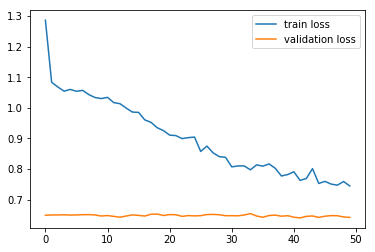

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491733                                                 
MAE              7.351289   8.547669     7.486302   6.788734
RMSE             9.813256  12.150946    12.726568  12.787170
MAPE             1.584912   1.668654     0.056979   0.054503

array([ 30.734 , -26.1   , -35.465 , ..., -28.931 , -33.887 ,  -7.9768])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.8122586280185522 47.3353962650359


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.68756705, -0.51309893, -0.71094242, -0.87627325, -0.25855369,
        1.56251483,  0.58527573])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.2706 - val_loss: 1.0264
Epoch 2/50
459/459 [==============================] - 0s 317us/step - loss: 1.0157 - val_loss: 1.0198
Epoch 3/50
459/459 [==============================] - 0s 335us/step - loss: 0.9999 - val_loss: 1.0193
Epoch 4/50
459/459 [==============================] - 0s 343us/step - loss: 1.0010 - val_loss: 1.0196
Epoch 5/50
459/459 [==============================] - 0s 341us/step - loss: 0.9992 - val_loss: 1.0183
Epoch 6/50
459/459 [==============================] - 0s 355us/step - loss: 1.0011 - val_loss: 1.0208
Epoch 7/50
459/459 [==============================] - 0s 302us/step - loss: 1.0005 - val_loss: 1.0212
Epoch 8/50
459/459 [==============================] - 0s 288us/step - loss: 0.9990 - val_loss: 1.0204
Epoch 9/50
459/459 [==============================] - 0s 309us/step - loss: 0.9935 - val_loss: 1.0223
Epoch 10/50
459/459 [=================

> Training Time :  15.364903926849365 s
dict_keys(['val_loss', 'loss'])


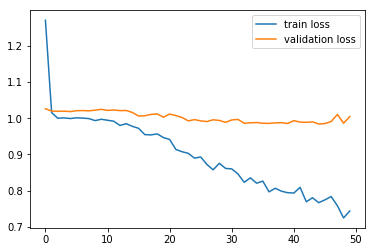

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491765                                                 
MAE             28.831789  33.257884    32.604848  34.289111
RMSE            40.697746  47.464132    49.216013  50.239663
MAPE             4.396627   6.344224     3.153842   4.908808

array([ 6.3582, -3.0395,  4.2762, ..., 24.943 , 25.489 , 17.409 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5888088797141122 19.475545224214983


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.29623772, -0.18630076,  0.18933442, -0.39863371, -0.80669417,
       -1.8692575 , -0.42715153])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 18ms/step - loss: 1.1708 - val_loss: 1.0638
Epoch 2/50
459/459 [==============================] - 0s 373us/step - loss: 0.9804 - val_loss: 1.0517
Epoch 3/50
459/459 [==============================] - 0s 393us/step - loss: 0.9702 - val_loss: 1.0495
Epoch 4/50
459/459 [==============================] - 0s 428us/step - loss: 0.9675 - val_loss: 1.0596
Epoch 5/50
459/459 [==============================] - 0s 437us/step - loss: 0.9575 - val_loss: 1.0532
Epoch 6/50
459/459 [==============================] - 0s 538us/step - loss: 0.9589 - val_loss: 1.0571
Epoch 7/50
459/459 [==============================] - 0s 352us/step - loss: 0.9446 - val_loss: 1.0557
Epoch 8/50
459/459 [==============================] - 0s 380us/step - loss: 0.9401 - val_loss: 1.0473
Epoch 9/50
459/459 [==============================] - 0s 353us/step - loss: 0.9349 - val_loss: 1.0333
Epoch 10/50
459/459 [=================

> Training Time :  18.37357807159424 s
dict_keys(['val_loss', 'loss'])


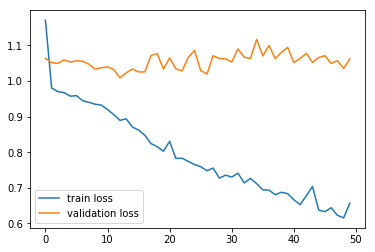

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147491816                                                 
MAE             11.593651  14.592986    13.631530  14.926587
RMSE            15.347502  19.386325    17.791014  19.078128
MAPE             0.372738   0.578724     0.095046   0.103068

array([2.2920e-02, 3.4285e-03, 3.4274e-03, ..., 6.8567e+01, 7.4205e+01,
       1.9474e+01])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 290us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 279us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 289us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 331us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 311us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 298us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 311us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 384us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 339us/step - loss: nan - val_loss:

> Training Time :  13.905344009399414 s
dict_keys(['val_loss', 'loss'])


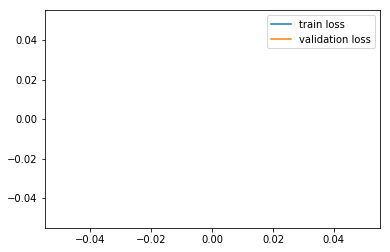

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147491943                                                   
MAE                   NaN   79.531564          NaN  109.243932
RMSE                  NaN  111.386988          NaN  141.608311
MAPE                  NaN    0.879942          NaN    0.785723

array([-92.02 , -23.155, -23.105, ..., -32.53 , -24.832, -91.006])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6390408224543795 105.82057773234861


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.86354621, -0.21277487, -0.21230237,  0.88863662,  2.68358997,
        1.29822615, -0.41103498])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.3037 - val_loss: 1.1930
Epoch 2/50
459/459 [==============================] - 0s 425us/step - loss: 0.9923 - val_loss: 1.1825
Epoch 3/50
459/459 [==============================] - 0s 500us/step - loss: 0.9752 - val_loss: 1.1835
Epoch 4/50
459/459 [==============================] - 0s 488us/step - loss: 0.9740 - val_loss: 1.1838
Epoch 5/50
459/459 [==============================] - 0s 364us/step - loss: 0.9708 - val_loss: 1.1842
Epoch 6/50
459/459 [==============================] - 0s 403us/step - loss: 0.9725 - val_loss: 1.1839
Epoch 7/50
459/459 [==============================] - 0s 368us/step - loss: 0.9710 - val_loss: 1.1829
Epoch 8/50
459/459 [==============================] - 0s 479us/step - loss: 0.9705 - val_loss: 1.1831
Epoch 9/50
459/459 [==============================] - 0s 369us/step - loss: 0.9705 - val_loss: 1.1832
Epoch 10/50
459/459 [=================

> Training Time :  18.035901069641113 s
dict_keys(['val_loss', 'loss'])


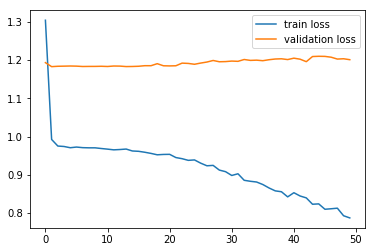

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147491979                                                   
MAE             64.561193   73.581743   117.201065  119.071132
RMSE            93.697629  105.973908   139.455007  139.087568
MAPE             7.016473    7.381569     1.666019    1.644775

array([3516.3 , 4269.3 , 4464.9 , ..., -417.05, -619.22, -849.18])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-49.92404199209246 2458.16891879727


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.45076443, 1.75709001, 1.83666143, 1.92168407, 1.8824272 ,
       1.79065157, 1.32205074])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 21ms/step - loss: 1.2820 - val_loss: 0.5119
Epoch 2/50
459/459 [==============================] - 0s 376us/step - loss: 1.0999 - val_loss: 0.5076
Epoch 3/50
459/459 [==============================] - 0s 395us/step - loss: 1.0908 - val_loss: 0.5065
Epoch 4/50
459/459 [==============================] - 0s 389us/step - loss: 1.0765 - val_loss: 0.5057
Epoch 5/50
459/459 [==============================] - 0s 401us/step - loss: 1.0626 - val_loss: 0.5039
Epoch 6/50
459/459 [==============================] - 0s 387us/step - loss: 1.0638 - val_loss: 0.5017
Epoch 7/50
459/459 [==============================] - 0s 343us/step - loss: 1.0368 - val_loss: 0.5006
Epoch 8/50
459/459 [==============================] - 0s 359us/step - loss: 1.0193 - val_loss: 0.4974
Epoch 9/50
459/459 [==============================] - 0s 339us/step - loss: 0.9920 - val_loss: 0.4973
Epoch 10/50
459/459 [=================

> Training Time :  18.431821823120117 s
dict_keys(['val_loss', 'loss'])


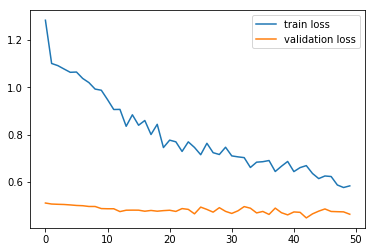

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147491989                                                     
MAE           1246.261597  1703.327348  1176.438288  1206.911414
RMSE          1736.434526  2464.414487  1592.093285  1630.531574
MAPE             0.139078     0.187817     0.124900     0.130192

array([15.08   ,  8.9716 ,  7.3799 , ..., -1.4723 ,  2.5101 , -0.50299])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.1367390777653589 9.004892560295785


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.68983016, 1.01148781, 0.83472835, 0.7972043 , 0.4848963 ,
       0.68968497, 0.47147026])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 16ms/step - loss: 1.1883 - val_loss: 0.8538
Epoch 2/50
459/459 [==============================] - 0s 361us/step - loss: 0.9861 - val_loss: 0.8332
Epoch 3/50
459/459 [==============================] - 0s 374us/step - loss: 0.9640 - val_loss: 0.8193
Epoch 4/50
459/459 [==============================] - 0s 359us/step - loss: 0.9377 - val_loss: 0.7957
Epoch 5/50
459/459 [==============================] - 0s 368us/step - loss: 0.9017 - val_loss: 0.7617
Epoch 6/50
459/459 [==============================] - 0s 357us/step - loss: 0.8917 - val_loss: 0.7264
Epoch 7/50
459/459 [==============================] - 0s 371us/step - loss: 0.8564 - val_loss: 0.6919
Epoch 8/50
459/459 [==============================] - 0s 354us/step - loss: 0.8261 - val_loss: 0.6457
Epoch 9/50
459/459 [==============================] - 0s 356us/step - loss: 0.8243 - val_loss: 0.6141
Epoch 10/50
459/459 [=================

> Training Time :  17.301301956176758 s
dict_keys(['val_loss', 'loss'])


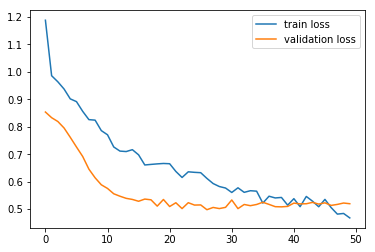

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147491999                                                
MAE              4.183424   6.720577     6.063059  7.553829
RMSE             5.744416   8.977376     7.727002  9.757085
MAPE             0.111043   0.177630     0.059317  0.072996

array([537.37, 719.4 , 766.39, ..., 287.9 , 599.89, 585.18])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

3.082816226893245 342.5172687858787


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.55988393, 2.09133159, 2.22852175, 2.30746668, 2.38471826,
       2.50482899, 2.44462764])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 14ms/step - loss: 1.2481 - val_loss: 0.7567
Epoch 2/50
459/459 [==============================] - 0s 336us/step - loss: 0.9783 - val_loss: 0.7600
Epoch 3/50
459/459 [==============================] - 0s 313us/step - loss: 0.9500 - val_loss: 0.7752
Epoch 4/50
459/459 [==============================] - 0s 315us/step - loss: 0.8827 - val_loss: 0.7696
Epoch 5/50
459/459 [==============================] - 0s 342us/step - loss: 0.8687 - val_loss: 0.7770
Epoch 6/50
459/459 [==============================] - 0s 331us/step - loss: 0.8524 - val_loss: 0.7682
Epoch 7/50
459/459 [==============================] - 0s 332us/step - loss: 0.8325 - val_loss: 0.7665
Epoch 8/50
459/459 [==============================] - 0s 315us/step - loss: 0.8020 - val_loss: 0.7718
Epoch 9/50
459/459 [==============================] - 0s 297us/step - loss: 0.7897 - val_loss: 0.7703
Epoch 10/50
459/459 [=================

> Training Time :  14.541006803512573 s
dict_keys(['val_loss', 'loss'])


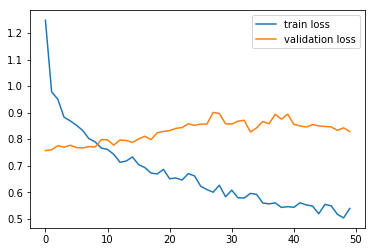

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147492021                                                   
MAE            157.246342  231.079136   230.011227  269.032655
RMSE           242.685531  340.228331   302.768485  343.385590
MAPE             2.764536    4.609112     0.727011    0.871895

array([ 57.778 ,  46.446 ,  43.939 , ...,   9.9142, -59.201 , -34.271 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

3.228037612446776 108.31279510471332


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.5036336 , 0.39901068, 0.37586476, 0.66698456, 0.16083938,
       0.28904214, 0.23728464])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 18ms/step - loss: 1.1809 - val_loss: 1.0790
Epoch 2/50
459/459 [==============================] - 0s 559us/step - loss: 0.9918 - val_loss: 1.0797
Epoch 3/50
459/459 [==============================] - 0s 527us/step - loss: 0.9828 - val_loss: 1.0746
Epoch 4/50
459/459 [==============================] - 0s 383us/step - loss: 0.9747 - val_loss: 1.0637
Epoch 5/50
459/459 [==============================] - 0s 388us/step - loss: 0.9652 - val_loss: 1.0339
Epoch 6/50
459/459 [==============================] - 0s 400us/step - loss: 0.9498 - val_loss: 0.9999
Epoch 7/50
459/459 [==============================] - 0s 393us/step - loss: 0.9376 - val_loss: 0.9626
Epoch 8/50
459/459 [==============================] - 0s 440us/step - loss: 0.9270 - val_loss: 0.9550
Epoch 9/50
459/459 [==============================] - 0s 394us/step - loss: 0.9150 - val_loss: 0.9398
Epoch 10/50
459/459 [=================

> Training Time :  18.39826488494873 s
dict_keys(['val_loss', 'loss'])


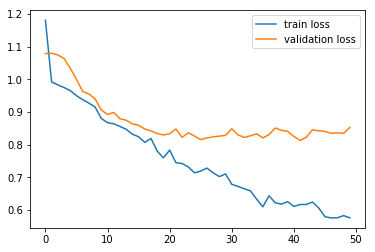

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147492050                                                   
MAE             56.723411   81.687697    92.291525   89.130018
RMSE            78.454055  108.738749   122.595899  112.754478
MAPE             0.748042    1.202911     0.475345    0.481421

array([ 13.164 ,  23.771 ,  24.806 , ..., -11.558 , -23.523 ,   9.3097])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.6936546178604017 27.793008865288808


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.44868641, 0.83032915, 0.86756873, 2.47840548, 0.58411615,
       0.57310619, 1.77391176])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: 1.3048 - val_loss: 1.0300
Epoch 2/50
459/459 [==============================] - 0s 338us/step - loss: 1.0099 - val_loss: 1.0221
Epoch 3/50
459/459 [==============================] - 0s 323us/step - loss: 1.0000 - val_loss: 1.0207
Epoch 4/50
459/459 [==============================] - 0s 383us/step - loss: 0.9994 - val_loss: 1.0204
Epoch 5/50
459/459 [==============================] - 0s 332us/step - loss: 0.9980 - val_loss: 1.0203
Epoch 6/50
459/459 [==============================] - 0s 342us/step - loss: 0.9987 - val_loss: 1.0204
Epoch 7/50
459/459 [==============================] - 0s 360us/step - loss: 0.9982 - val_loss: 1.0197
Epoch 8/50
459/459 [==============================] - 0s 329us/step - loss: 0.9974 - val_loss: 1.0198
Epoch 9/50
459/459 [==============================] - 0s 299us/step - loss: 0.9973 - val_loss: 1.0198
Epoch 10/50
459/459 [=================

> Training Time :  14.3849458694458 s
dict_keys(['val_loss', 'loss'])


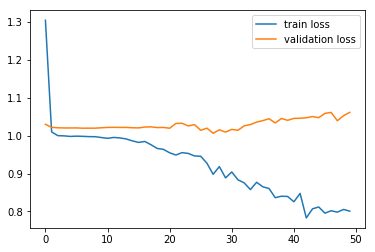

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147492527                                                 
MAE             19.408057  21.839215    24.704619  25.506312
RMSE            24.437455  27.833713    32.373770  33.822814
MAPE             0.130665   0.153564     0.287800   0.316549

array([-1.6604, -4.8884, -3.103 , ..., 15.998 , 17.576 , 18.275 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.4311497658363747 21.04687061607674


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.09937581, -0.25274778, -0.16791806, -0.07135739, -0.0087937 ,
        1.07839548,  1.90246099])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 16ms/step - loss: 1.1020 - val_loss: 0.8082
Epoch 2/50
459/459 [==============================] - 0s 429us/step - loss: 0.8080 - val_loss: 0.7070
Epoch 3/50
459/459 [==============================] - 0s 387us/step - loss: 0.7297 - val_loss: 0.6396
Epoch 4/50
459/459 [==============================] - 0s 505us/step - loss: 0.6690 - val_loss: 0.6099
Epoch 5/50
459/459 [==============================] - 0s 431us/step - loss: 0.6167 - val_loss: 0.5678
Epoch 6/50
459/459 [==============================] - 0s 403us/step - loss: 0.5869 - val_loss: 0.5552
Epoch 7/50
459/459 [==============================] - 0s 390us/step - loss: 0.5671 - val_loss: 0.5280
Epoch 8/50
459/459 [==============================] - 0s 601us/step - loss: 0.5375 - val_loss: 0.5035
Epoch 9/50
459/459 [==============================] - 0s 399us/step - loss: 0.5252 - val_loss: 0.5110
Epoch 10/50
459/459 [=================

> Training Time :  17.610413074493408 s
dict_keys(['val_loss', 'loss'])


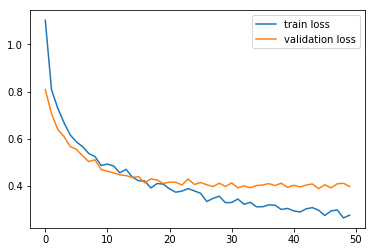

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147492608                                                 
MAE              7.336411  16.976408    10.446546  13.786315
RMSE            10.007711  20.980975    14.394419  17.597981
MAPE             0.204793   0.499314     0.122510   0.160684

array([  -0.70221,  -18.698  ,  -23.601  , ..., -155.06   , -162.05   ,
       -223.8    ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 369us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 387us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 389us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 393us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 431us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 360us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 351us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 297us/step - loss: nan - val_loss:

> Training Time :  14.611024141311646 s
dict_keys(['val_loss', 'loss'])


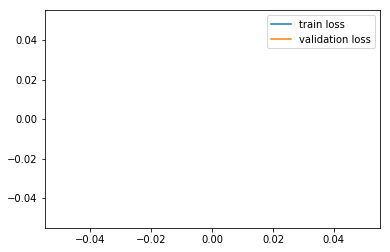

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN    4testFAR
T2147492689                                                    
MAE                   NaN   155.426092          NaN   78.879424
RMSE                  NaN  1932.002075          NaN  124.064498
MAPE                  NaN     5.298161          NaN    0.233623

array([ -296.04,  -262.47, -1045.2 , ..., -2105.7 , -2676.3 , -2246.6 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

54.617911773874695 1708.3693620856668


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.20525884, -0.18560852, -0.64378227,  0.19647513, -0.41293641,
       -0.63611414,  0.50742076])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: 1.1795 - val_loss: 1.1773
Epoch 2/50
459/459 [==============================] - 0s 615us/step - loss: 0.9842 - val_loss: 1.1682
Epoch 3/50
459/459 [==============================] - 0s 507us/step - loss: 0.9631 - val_loss: 1.1694
Epoch 4/50
459/459 [==============================] - 0s 445us/step - loss: 0.9675 - val_loss: 1.1704
Epoch 5/50
459/459 [==============================] - 0s 615us/step - loss: 0.9671 - val_loss: 1.1714
Epoch 6/50
459/459 [==============================] - 0s 455us/step - loss: 0.9588 - val_loss: 1.1728
Epoch 7/50
459/459 [==============================] - 0s 609us/step - loss: 0.9581 - val_loss: 1.1747
Epoch 8/50
459/459 [==============================] - 0s 488us/step - loss: 0.9519 - val_loss: 1.1772
Epoch 9/50
459/459 [==============================] - 0s 445us/step - loss: 0.9494 - val_loss: 1.1743
Epoch 10/50
459/459 [=================

> Training Time :  20.978347063064575 s
dict_keys(['val_loss', 'loss'])


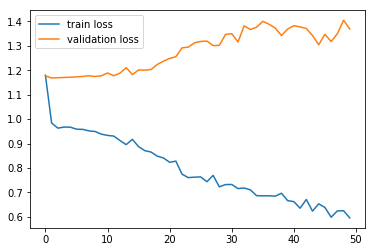

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147492830                                                     
MAE           1018.291907  1243.684644  1350.123567  1332.717664
RMSE          1379.516851  1708.935186  1712.890555  1688.758844
MAPE             1.435475     1.521138     0.114032     0.112729

array([-2118.6, -3047.5, -3381.5, ..., -3099.7, -3028.3, -2760.3])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

21.001156405869825 2220.754104506251


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.96345703, -1.38173837, -1.53213773, -1.66366963, -1.39421161,
       -1.45315555, -1.57442067])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.2478 - val_loss: 0.9350
Epoch 2/50
459/459 [==============================] - 0s 403us/step - loss: 1.0323 - val_loss: 0.9302
Epoch 3/50
459/459 [==============================] - 0s 361us/step - loss: 1.0226 - val_loss: 0.9279
Epoch 4/50
459/459 [==============================] - 0s 351us/step - loss: 1.0162 - val_loss: 0.9294
Epoch 5/50
459/459 [==============================] - 0s 355us/step - loss: 1.0181 - val_loss: 0.9287
Epoch 6/50
459/459 [==============================] - 0s 306us/step - loss: 1.0148 - val_loss: 0.9293
Epoch 7/50
459/459 [==============================] - 0s 324us/step - loss: 1.0158 - val_loss: 0.9300
Epoch 8/50
459/459 [==============================] - 0s 338us/step - loss: 1.0168 - val_loss: 0.9305
Epoch 9/50
459/459 [==============================] - 0s 347us/step - loss: 1.0103 - val_loss: 0.9310
Epoch 10/50
459/459 [=================

> Training Time :  16.02300500869751 s
dict_keys(['val_loss', 'loss'])


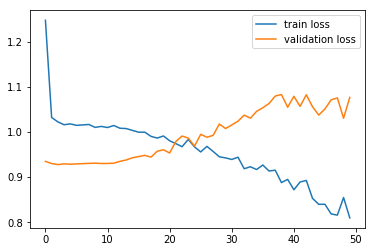

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN     4testFAR
T2147492847                                                     
MAE           1455.036492  1648.622883  2177.101175  2042.296585
RMSE          1973.097026  2223.413355  2870.145186  2712.112503
MAPE             0.357398     0.422593     0.124637     0.116745

array([186.36 , -81.548, -29.017, ...,  48.161, -32.295,  34.131])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-5.173157999749087 171.95700092329088


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.11384333, -0.44415081, -0.13866165, -0.3546924 , -0.78814379,
       -1.14003408, -0.69783051])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.2245 - val_loss: 1.0920
Epoch 2/50
459/459 [==============================] - 0s 429us/step - loss: 0.9958 - val_loss: 1.0902
Epoch 3/50
459/459 [==============================] - 0s 404us/step - loss: 0.9816 - val_loss: 1.0893
Epoch 4/50
459/459 [==============================] - 0s 438us/step - loss: 0.9792 - val_loss: 1.0888
Epoch 5/50
459/459 [==============================] - 0s 429us/step - loss: 0.9793 - val_loss: 1.0889
Epoch 6/50
459/459 [==============================] - 0s 440us/step - loss: 0.9796 - val_loss: 1.0893
Epoch 7/50
459/459 [==============================] - 0s 394us/step - loss: 0.9791 - val_loss: 1.0898
Epoch 8/50
459/459 [==============================] - 0s 411us/step - loss: 0.9680 - val_loss: 1.0872
Epoch 9/50
459/459 [==============================] - 0s 374us/step - loss: 0.9691 - val_loss: 1.0818
Epoch 10/50
459/459 [=================

> Training Time :  19.4397189617157 s
dict_keys(['val_loss', 'loss'])


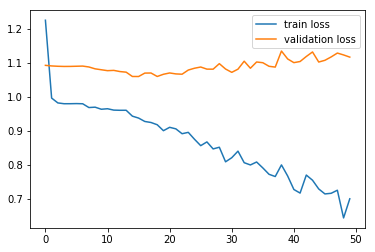

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147492946                                                   
MAE            105.299830  127.817584   173.936952  164.778814
RMSE           141.617430  172.012762   217.743025  207.278802
MAPE             1.873046    2.422845     0.162227    0.156804

array([ 9.9234,  5.434 , -4.1491, ..., 11.574 , 16.692 , 10.871 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 7s 15ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 397us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 356us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 335us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 390us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 359us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 398us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 364us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 373us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 345us/step - loss: nan - val_loss:

> Training Time :  16.01638913154602 s
dict_keys(['val_loss', 'loss'])


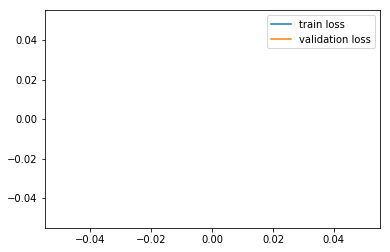

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147492967                                                 
MAE                   NaN   9.790013          NaN  15.087654
RMSE                  NaN  32.076412          NaN  22.354140
MAPE                  NaN  35.208614          NaN   0.297102

array([-18.85  , -19.889 ,  -8.3463, ...,  -4.037 ,  -6.2886,  -9.3024])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-2.6136975134504263 58.15229357678226


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.27920313, -0.29707001, -0.09857913, -0.10937836,  0.02011094,
       -0.24125106, -0.15989571])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.1835 - val_loss: 1.3502
Epoch 2/50
459/459 [==============================] - 0s 372us/step - loss: 1.0071 - val_loss: 1.3359
Epoch 3/50
459/459 [==============================] - 0s 398us/step - loss: 0.9545 - val_loss: 1.3287
Epoch 4/50
459/459 [==============================] - 0s 391us/step - loss: 0.9433 - val_loss: 1.3213
Epoch 5/50
459/459 [==============================] - 0s 440us/step - loss: 0.9386 - val_loss: 1.3150
Epoch 6/50
459/459 [==============================] - 0s 469us/step - loss: 0.9362 - val_loss: 1.3049
Epoch 7/50
459/459 [==============================] - 0s 561us/step - loss: 0.9183 - val_loss: 1.2934
Epoch 8/50
459/459 [==============================] - 0s 457us/step - loss: 0.8957 - val_loss: 1.2828
Epoch 9/50
459/459 [==============================] - 0s 436us/step - loss: 0.8800 - val_loss: 1.2738
Epoch 10/50
459/459 [=================

> Training Time :  19.199533939361572 s
dict_keys(['val_loss', 'loss'])


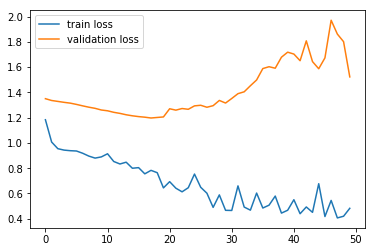

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147493211                                                 
MAE             24.100008  27.066654    25.704963  26.393431
RMSE            43.910363  58.574043    43.220637  42.113299
MAPE             0.251915   0.276330     0.264338   0.280095

array([ 2.2976 , -1.4477 , -0.51076, ...,  0.26675,  0.40076, -0.22354])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 18ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 377us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 323us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 361us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 347us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 340us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 355us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 355us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 363us/step - loss: nan - val_loss:

> Training Time :  17.502538919448853 s
dict_keys(['val_loss', 'loss'])


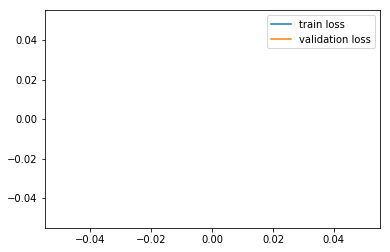

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147493354                                                  
MAE                   NaN   45.292235          NaN  10.264640
RMSE                  NaN  327.014793          NaN  22.075133
MAPE                  NaN   37.904916          NaN   0.031185

array([ 137.45 ,  -40.977,   75.591, ..., -153.58 ,  -88.826,  -90.438])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 23ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 613us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 595us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 484us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 540us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 949us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 538us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 515us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 462us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 464us/step - loss: nan - val_loss

> Training Time :  21.797560930252075 s
dict_keys(['val_loss', 'loss'])


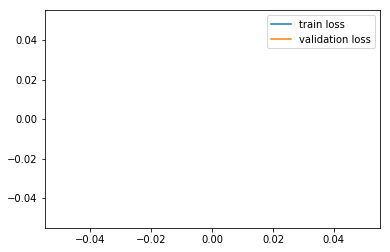

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN    4testFAR
T2147493376                                                  
MAE                   NaN  54.145993          NaN   82.934618
RMSE                  NaN  83.687524          NaN  119.742425
MAPE                  NaN   0.128748          NaN    0.129594

array([33.916  , 28.719  , 37.37   , ...,  0.59726,  5.6122 , -1.3348 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.008723308845803222 24.8468379391932


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.36535375, 1.15619232, 1.5043654 , 1.42854086, 1.37203468,
       1.27383305, 1.13091748])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.1527 - val_loss: 1.2447
Epoch 2/50
459/459 [==============================] - 0s 388us/step - loss: 0.9479 - val_loss: 1.2398
Epoch 3/50
459/459 [==============================] - 0s 349us/step - loss: 0.9300 - val_loss: 1.2061
Epoch 4/50
459/459 [==============================] - 0s 379us/step - loss: 0.9033 - val_loss: 1.1700
Epoch 5/50
459/459 [==============================] - 0s 323us/step - loss: 0.8648 - val_loss: 1.1214
Epoch 6/50
459/459 [==============================] - 0s 312us/step - loss: 0.8300 - val_loss: 1.0746
Epoch 7/50
459/459 [==============================] - 0s 391us/step - loss: 0.7936 - val_loss: 1.0232
Epoch 8/50
459/459 [==============================] - 0s 410us/step - loss: 0.7671 - val_loss: 1.0138
Epoch 9/50
459/459 [==============================] - 0s 368us/step - loss: 0.7239 - val_loss: 0.9689
Epoch 10/50
459/459 [=================

> Training Time :  15.932164192199707 s
dict_keys(['val_loss', 'loss'])


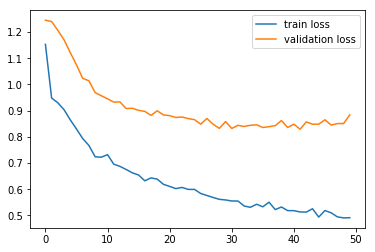

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147493427                                                 
MAE             12.069735  18.463674    18.717453  21.576167
RMSE            17.185069  24.872355    29.701943  28.706586
MAPE             0.321458   0.436814     0.099220   0.111269

array([  8.4053, -18.816 , -41.224 , ...,  66.224 ,  56.474 ,  95.327 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.1273221736389902 43.418670346254856


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.21955122, -0.40739796, -0.92348931, -0.38137229,  0.61713825,
        0.55039277,  0.17098456])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 14s 30ms/step - loss: 1.0733 - val_loss: 1.6425
Epoch 2/50
459/459 [==============================] - 0s 412us/step - loss: 0.8989 - val_loss: 1.6297
Epoch 3/50
459/459 [==============================] - 0s 399us/step - loss: 0.8883 - val_loss: 1.6290
Epoch 4/50
459/459 [==============================] - 0s 489us/step - loss: 0.8849 - val_loss: 1.6258
Epoch 5/50
459/459 [==============================] - 0s 383us/step - loss: 0.8809 - val_loss: 1.6233
Epoch 6/50
459/459 [==============================] - 0s 399us/step - loss: 0.8809 - val_loss: 1.6146
Epoch 7/50
459/459 [==============================] - 0s 371us/step - loss: 0.8723 - val_loss: 1.6124
Epoch 8/50
459/459 [==============================] - 0s 385us/step - loss: 0.8692 - val_loss: 1.6091
Epoch 9/50
459/459 [==============================] - 0s 382us/step - loss: 0.8654 - val_loss: 1.6010
Epoch 10/50
459/459 [================

> Training Time :  23.670681715011597 s
dict_keys(['val_loss', 'loss'])


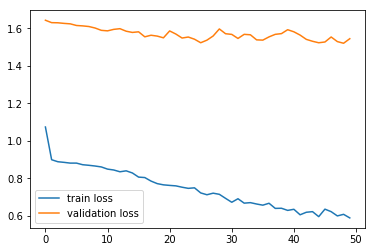

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147493438                                                 
MAE             22.928192  28.309919    35.153047  34.223291
RMSE            35.856093  43.472250    55.830520  55.870565
MAPE            14.759099  17.839995     8.156380  10.830471

array([15.538 , 12.87  , 15.625 , ...,  8.9847, 14.805 ,  6.4322])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.16638279808166057 9.243763898417566


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.69891648, 1.41028946, 1.70832823, 1.63920054, 1.04931096,
       0.56048411, 0.79994285])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.2256 - val_loss: 0.8266
Epoch 2/50
459/459 [==============================] - 0s 307us/step - loss: 0.9999 - val_loss: 0.8182
Epoch 3/50
459/459 [==============================] - 0s 327us/step - loss: 0.9630 - val_loss: 0.7913
Epoch 4/50
459/459 [==============================] - 0s 315us/step - loss: 0.9205 - val_loss: 0.7643
Epoch 5/50
459/459 [==============================] - 0s 318us/step - loss: 0.8810 - val_loss: 0.7062
Epoch 6/50
459/459 [==============================] - 0s 314us/step - loss: 0.8495 - val_loss: 0.6600
Epoch 7/50
459/459 [==============================] - 0s 317us/step - loss: 0.7979 - val_loss: 0.6253
Epoch 8/50
459/459 [==============================] - 0s 310us/step - loss: 0.7502 - val_loss: 0.5876
Epoch 9/50
459/459 [==============================] - 0s 321us/step - loss: 0.7242 - val_loss: 0.5626
Epoch 10/50
459/459 [=================

> Training Time :  17.387767791748047 s
dict_keys(['val_loss', 'loss'])


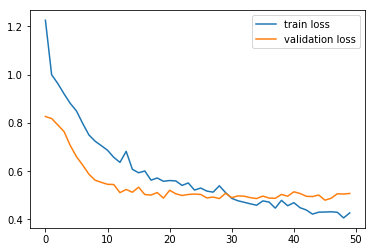

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147493611                                                 
MAE              3.972669   6.773879     6.599100   7.977992
RMSE             5.450770   9.255870     8.396338  10.158474
MAPE             0.109467   0.183236     0.069929   0.082563

array([136.75 , 192.48 , -12.422, ..., 269.54 , 242.95 , -30.316])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.9428597204531634 319.2736999754509


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.43126903,  0.60582146, -0.03595392,  0.50769249,  0.85726717,
        0.72734729,  1.14755102])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 25ms/step - loss: 1.1590 - val_loss: 1.0545
Epoch 2/50
459/459 [==============================] - 0s 327us/step - loss: 0.9954 - val_loss: 1.0550
Epoch 3/50
459/459 [==============================] - 0s 374us/step - loss: 0.9871 - val_loss: 1.0551
Epoch 4/50
459/459 [==============================] - 0s 321us/step - loss: 0.9817 - val_loss: 1.0551
Epoch 5/50
459/459 [==============================] - 0s 294us/step - loss: 0.9798 - val_loss: 1.0551
Epoch 6/50
459/459 [==============================] - 0s 289us/step - loss: 0.9792 - val_loss: 1.0549
Epoch 7/50
459/459 [==============================] - 0s 321us/step - loss: 0.9790 - val_loss: 1.0535
Epoch 8/50
459/459 [==============================] - 0s 395us/step - loss: 0.9753 - val_loss: 1.0550
Epoch 9/50
459/459 [==============================] - 0s 337us/step - loss: 0.9705 - val_loss: 1.0536
Epoch 10/50
459/459 [================

> Training Time :  27.933372974395752 s
dict_keys(['val_loss', 'loss'])


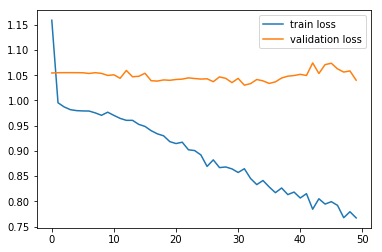

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147493733                                                   
MAE            211.053029  244.357975   191.496370  189.523012
RMSE           276.826868  318.403411   251.251693  247.885965
MAPE             0.738718    0.827894     0.158453    0.155300

array([54.419, 32.418, 46.226, ..., 59.851, 64.487, 22.072])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.3413691357588202 52.014866946717326


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.0720083 , 0.64903308, 0.91449564, 1.14212287, 1.28967684,
       1.23544234, 0.49701885])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 21ms/step - loss: 1.1419 - val_loss: 0.8898
Epoch 2/50
459/459 [==============================] - 0s 351us/step - loss: 1.0063 - val_loss: 0.8833
Epoch 3/50
459/459 [==============================] - 0s 437us/step - loss: 0.9793 - val_loss: 0.8777
Epoch 4/50
459/459 [==============================] - 0s 445us/step - loss: 0.9689 - val_loss: 0.8717
Epoch 5/50
459/459 [==============================] - 0s 440us/step - loss: 0.9419 - val_loss: 0.8583
Epoch 6/50
459/459 [==============================] - 0s 589us/step - loss: 0.9032 - val_loss: 0.8410
Epoch 7/50
459/459 [==============================] - 0s 346us/step - loss: 0.9076 - val_loss: 0.8334
Epoch 8/50
459/459 [==============================] - 0s 389us/step - loss: 0.8808 - val_loss: 0.8111
Epoch 9/50
459/459 [==============================] - 0s 387us/step - loss: 0.8345 - val_loss: 0.8101
Epoch 10/50
459/459 [================

> Training Time :  20.605254888534546 s
dict_keys(['val_loss', 'loss'])


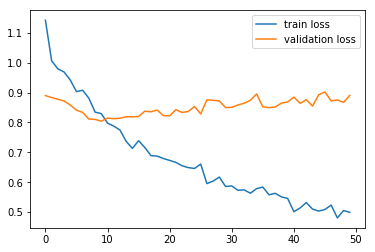

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147493894                                                
MAE             26.179534  37.652211    37.842497  44.04459
RMSE            35.678577  51.700890    48.252695  55.81320
MAPE             0.319431   0.370586     0.076267   0.08897

array([72.302, 40.071, 28.539, ..., 48.709, 53.852, 67.457])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

35103.45867527762 821139.823872091


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.04266162, -0.04270087, -0.04271492, -0.04271503, -0.04270631,
       -0.04271352, -0.04273036])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.7798 - val_loss: 7.3687e-04
Epoch 2/50
459/459 [==============================] - 0s 385us/step - loss: 1.5888 - val_loss: 0.0013
Epoch 3/50
459/459 [==============================] - 0s 357us/step - loss: 1.3748 - val_loss: 0.0016
Epoch 4/50
459/459 [==============================] - 0s 344us/step - loss: 1.2369 - val_loss: 0.0018
Epoch 5/50
459/459 [==============================] - 0s 364us/step - loss: 1.2340 - val_loss: 0.0018
Epoch 6/50
459/459 [==============================] - 0s 376us/step - loss: 1.2487 - val_loss: 0.0016
Epoch 7/50
459/459 [==============================] - 0s 407us/step - loss: 1.2172 - val_loss: 0.0021
Epoch 8/50
459/459 [==============================] - 0s 450us/step - loss: 1.2135 - val_loss: 0.0025
Epoch 9/50
459/459 [==============================] - 0s 470us/step - loss: 1.2023 - val_loss: 0.0022
Epoch 10/50
459/459 [============

> Training Time :  23.27482008934021 s
dict_keys(['val_loss', 'loss'])


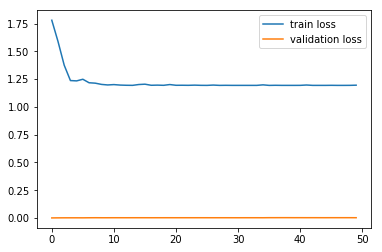

(541, 24)

(61, 24)

1trainFARCNN      2trainFAR   3testFARCNN    4testFAR
T2147494133                                                        
MAE           76575.494571   35691.119354  41153.249732  115.753195
RMSE         826434.696732  827180.124414  41161.374219  190.980628
MAPE            509.529406      99.967863     70.417287    0.195846

array([ -70.323 , -118.55  , -118.92  , ...,  -26.112 ,   -6.0618,
        -50.642 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.5548211419631994 42.11351241484476


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.63292433, -2.77809121, -2.78687699, -1.02936507,  0.37695315,
        0.48280991,  0.42665216])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: 1.2894 - val_loss: 0.9699
Epoch 2/50
459/459 [==============================] - 0s 365us/step - loss: 1.0261 - val_loss: 0.9599
Epoch 3/50
459/459 [==============================] - 0s 375us/step - loss: 1.0074 - val_loss: 0.9593
Epoch 4/50
459/459 [==============================] - 0s 373us/step - loss: 1.0077 - val_loss: 0.9587
Epoch 5/50
459/459 [==============================] - 0s 389us/step - loss: 1.0046 - val_loss: 0.9581
Epoch 6/50
459/459 [==============================] - 0s 394us/step - loss: 1.0050 - val_loss: 0.9578
Epoch 7/50
459/459 [==============================] - 0s 415us/step - loss: 0.9996 - val_loss: 0.9576
Epoch 8/50
459/459 [==============================] - 0s 400us/step - loss: 1.0008 - val_loss: 0.9566
Epoch 9/50
459/459 [==============================] - 0s 420us/step - loss: 0.9943 - val_loss: 0.9548
Epoch 10/50
459/459 [=================

> Training Time :  19.07094407081604 s
dict_keys(['val_loss', 'loss'])


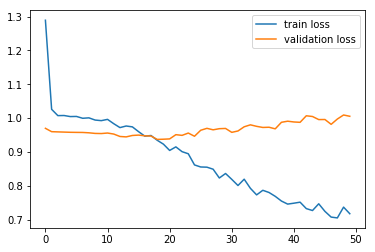

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147494675                                                 
MAE             25.050440  30.918646    36.874526  36.165879
RMSE            34.287588  42.216945    47.575490  46.909452
MAPE             0.671535   0.869301     1.608605   1.601993

array([-3.0466, -8.1046, -6.9645, ..., 22.343 , 25.88  , 42.659 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 18ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 362us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 350us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 336us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 339us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 350us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 341us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 361us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 379us/step - loss: nan - val_loss:

> Training Time :  17.250381231307983 s
dict_keys(['val_loss', 'loss'])


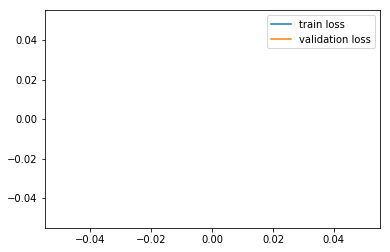

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147494838                                                  
MAE                   NaN   33.166133          NaN  31.568029
RMSE                  NaN  348.725750          NaN  50.239713
MAPE                  NaN   21.655686          NaN  43.227568

array([ 28.251,  37.415,  40.709, ...,  11.949,  11.51 , -13.903])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6630966249467763 32.999112542234236


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.87620831, 1.15391275, 1.25373361, 1.23136938, 1.03342466,
       1.09451721, 0.99730248])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 23ms/step - loss: 1.1795 - val_loss: 1.3316
Epoch 2/50
459/459 [==============================] - 0s 443us/step - loss: 0.9310 - val_loss: 1.3373
Epoch 3/50
459/459 [==============================] - 0s 466us/step - loss: 0.9211 - val_loss: 1.3327
Epoch 4/50
459/459 [==============================] - 0s 440us/step - loss: 0.9093 - val_loss: 1.3217
Epoch 5/50
459/459 [==============================] - 0s 440us/step - loss: 0.9071 - val_loss: 1.3038
Epoch 6/50
459/459 [==============================] - 0s 476us/step - loss: 0.8884 - val_loss: 1.2909
Epoch 7/50
459/459 [==============================] - 0s 452us/step - loss: 0.8554 - val_loss: 1.2559
Epoch 8/50
459/459 [==============================] - 0s 507us/step - loss: 0.8395 - val_loss: 1.2355
Epoch 9/50
459/459 [==============================] - 0s 458us/step - loss: 0.7973 - val_loss: 1.2105
Epoch 10/50
459/459 [================

> Training Time :  21.842406749725342 s
dict_keys(['val_loss', 'loss'])


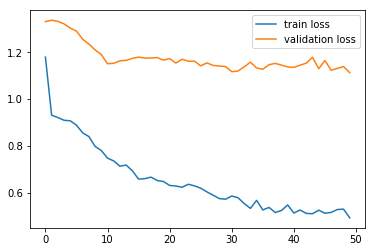

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147494900                                                 
MAE             17.181702  24.472010    23.240027  25.466653
RMSE            23.689128  32.927405    29.884348  32.701439
MAPE             0.142979   0.199698     0.076251   0.081038

array([ -86.191,  -61.479,  -61.944, ..., -525.71 , -529.34 , -418.28 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 8s 17ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 326us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 314us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 310us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 411us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 407us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 386us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 346us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 359us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 348us/step - loss: nan - val_loss:

> Training Time :  17.271186113357544 s
dict_keys(['val_loss', 'loss'])


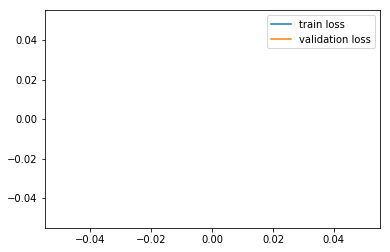

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147494910                                                   
MAE                   NaN  159.105024          NaN  401.970617
RMSE                  NaN  277.969470          NaN  527.107328
MAPE                  NaN   19.941755          NaN    0.436772

array([303.   , 332.36 , 318.01 , ..., -28.962, -42.707,  37.062])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5843404357588187 288.7123130935375


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.04746367, 1.1491566 , 1.09945314, 1.05390607, 1.03236213,
       0.93752725, 0.77767954])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.2299 - val_loss: 0.9765
Epoch 2/50
459/459 [==============================] - 0s 688us/step - loss: 1.0308 - val_loss: 0.9711
Epoch 3/50
459/459 [==============================] - 0s 557us/step - loss: 1.0105 - val_loss: 0.9702
Epoch 4/50
459/459 [==============================] - 0s 554us/step - loss: 1.0057 - val_loss: 0.9699
Epoch 5/50
459/459 [==============================] - 0s 908us/step - loss: 1.0091 - val_loss: 0.9702
Epoch 6/50
459/459 [==============================] - 0s 653us/step - loss: 1.0046 - val_loss: 0.9700
Epoch 7/50
459/459 [==============================] - 0s 635us/step - loss: 1.0043 - val_loss: 0.9719
Epoch 8/50
459/459 [==============================] - 0s 991us/step - loss: 0.9991 - val_loss: 0.9717
Epoch 9/50
459/459 [==============================] - 0s 618us/step - loss: 1.0020 - val_loss: 0.9715
Epoch 10/50
459/459 [================

> Training Time :  23.342360973358154 s
dict_keys(['val_loss', 'loss'])


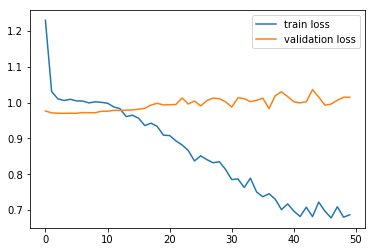

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147494971                                                   
MAE            156.341430  195.238822   285.908048  264.084066
RMSE           228.160396  289.324203   437.496714  412.694009
MAPE             0.404519    0.492310     0.482701    0.419998

array([-21.036, -38.93 , -21.26 , ...,  22.09 ,  36.285,  -6.247])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 23ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 362us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 367us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 370us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 379us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 416us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 398us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 385us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 439us/step - loss: nan - val_loss

> Training Time :  19.217108964920044 s
dict_keys(['val_loss', 'loss'])


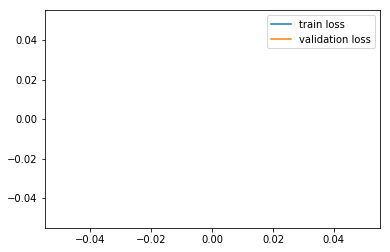

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147495045                                                 
MAE                   NaN  36.600220          NaN  44.484460
RMSE                  NaN  93.696405          NaN  61.624324
MAPE                  NaN   0.395976          NaN   0.142634

array([-0.46776, -7.4096 , -9.492  , ...,  3.4822 ,  4.9917 ,  3.6013 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.20438760175714718 6.284646333967997


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.04190727, -1.14647858, -1.47782578,  0.29842373,  0.47536288,
        0.665477  ,  0.69998968])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 27ms/step - loss: 1.2196 - val_loss: 0.9032
Epoch 2/50
459/459 [==============================] - 0s 427us/step - loss: 1.0398 - val_loss: 0.8979
Epoch 3/50
459/459 [==============================] - 0s 446us/step - loss: 1.0170 - val_loss: 0.8978
Epoch 4/50
459/459 [==============================] - 0s 406us/step - loss: 1.0211 - val_loss: 0.8989
Epoch 5/50
459/459 [==============================] - 0s 574us/step - loss: 1.0097 - val_loss: 0.8909
Epoch 6/50
459/459 [==============================] - 0s 432us/step - loss: 0.9994 - val_loss: 0.8984
Epoch 7/50
459/459 [==============================] - 0s 432us/step - loss: 0.9836 - val_loss: 0.9104
Epoch 8/50
459/459 [==============================] - 0s 393us/step - loss: 0.9779 - val_loss: 0.8964
Epoch 9/50
459/459 [==============================] - 0s 404us/step - loss: 0.9723 - val_loss: 0.8881
Epoch 10/50
459/459 [================

> Training Time :  21.764636993408203 s
dict_keys(['val_loss', 'loss'])


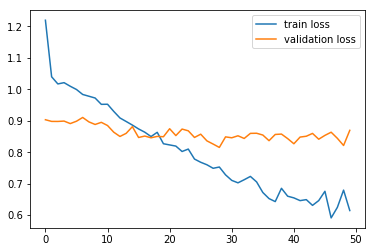

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147495313                                                
MAE              3.369625   4.442554     5.924520  6.444693
RMSE             4.753852   6.308462     8.638089  8.998945
MAPE             0.075444   0.095615     0.107935  0.113179

array([  7.0767, -22.026 , -20.056 , ...,  26.826 ,  23.327 ,  10.645 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 310us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 328us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 336us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 319us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 347us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 332us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 368us/step - loss: nan - val_loss:

> Training Time :  17.47340416908264 s
dict_keys(['val_loss', 'loss'])


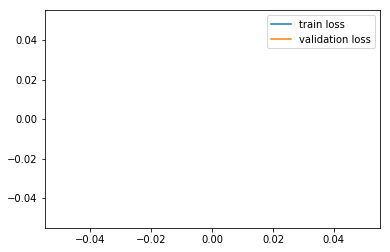

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147495380                                                  
MAE                   NaN   58.184657          NaN  30.073207
RMSE                  NaN  360.528914          NaN  71.743544
MAPE                  NaN    0.373234          NaN   0.793904

array([ 0.84402, -4.6468 , -3.9854 , ...,  6.3804 ,  7.009  ,  3.8506 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.3171072918263381 9.33824128877209


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.12434111, -0.46365183, -0.39282479,  0.27919682,  0.6178259 ,
        1.40819956,  0.68406963])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 25ms/step - loss: 1.1374 - val_loss: 1.4657
Epoch 2/50
459/459 [==============================] - 0s 331us/step - loss: 0.9194 - val_loss: 1.4539
Epoch 3/50
459/459 [==============================] - 0s 330us/step - loss: 0.9130 - val_loss: 1.4484
Epoch 4/50
459/459 [==============================] - 0s 330us/step - loss: 0.9095 - val_loss: 1.4463
Epoch 5/50
459/459 [==============================] - 0s 368us/step - loss: 0.9053 - val_loss: 1.4442
Epoch 6/50
459/459 [==============================] - 0s 341us/step - loss: 0.9017 - val_loss: 1.4399
Epoch 7/50
459/459 [==============================] - 0s 354us/step - loss: 0.8948 - val_loss: 1.4403
Epoch 8/50
459/459 [==============================] - 0s 377us/step - loss: 0.8940 - val_loss: 1.4369
Epoch 9/50
459/459 [==============================] - 0s 369us/step - loss: 0.8803 - val_loss: 1.4317
Epoch 10/50
459/459 [================

> Training Time :  20.89478302001953 s
dict_keys(['val_loss', 'loss'])


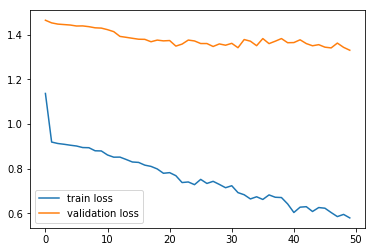

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147495391                                                
MAE              5.295983   6.745809     6.713830  7.077264
RMSE             7.345299   9.327206     8.568895  9.073974
MAPE             0.092340   0.114374     0.070510  0.074061

array([ 0.2388 , -1.6815 , -0.54461, ...,  1.8862 ,  2.2723 ,  0.69326])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.14341042139978707 9.106679035235443


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.01047468, -0.20039253, -0.07555119, -0.15853314, -0.09629421,
       -0.16176154, -0.14322569])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 19ms/step - loss: 1.3378 - val_loss: 0.2747
Epoch 2/50
459/459 [==============================] - 0s 408us/step - loss: 1.1640 - val_loss: 0.2664
Epoch 3/50
459/459 [==============================] - 0s 453us/step - loss: 1.1406 - val_loss: 0.2646
Epoch 4/50
459/459 [==============================] - 0s 451us/step - loss: 1.1216 - val_loss: 0.2641
Epoch 5/50
459/459 [==============================] - 0s 616us/step - loss: 1.0977 - val_loss: 0.2633
Epoch 6/50
459/459 [==============================] - 0s 763us/step - loss: 1.0665 - val_loss: 0.2657
Epoch 7/50
459/459 [==============================] - 0s 414us/step - loss: 1.0504 - val_loss: 0.2678
Epoch 8/50
459/459 [==============================] - 0s 383us/step - loss: 1.0469 - val_loss: 0.2715
Epoch 9/50
459/459 [==============================] - 0s 359us/step - loss: 0.9758 - val_loss: 0.2738
Epoch 10/50
459/459 [=================

> Training Time :  20.6246120929718 s
dict_keys(['val_loss', 'loss'])


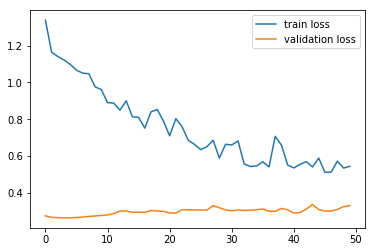

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147495407                                                
MAE              2.603069   3.105023     1.880470  1.939698
RMSE             6.075091   9.154442     2.957757  3.078073
MAPE             0.026055   0.029035     0.017828  0.018404

array([34.146 , 27.133 , 28.91  , ...,  8.9792,  7.7418,  6.5525])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 21ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 356us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 344us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 438us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 748us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 399us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 397us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 382us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 375us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 372us/step - loss: nan - val_loss

> Training Time :  21.238618850708008 s
dict_keys(['val_loss', 'loss'])


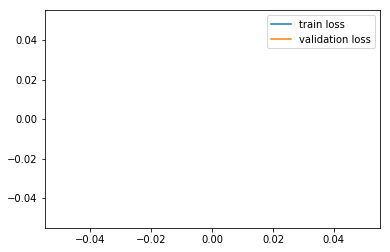

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147495490                                                 
MAE                   NaN  12.010943          NaN   9.189399
RMSE                  NaN  19.959552          NaN  15.682803
MAPE                  NaN   0.204661          NaN   0.341680

array([254.27 ,  37.304, -18.068, ...,  69.464,  74.982,  67.579])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 21ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 481us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 480us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 498us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 444us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 571us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 498us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 490us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 481us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 676us/step - loss: nan - val_loss:

> Training Time :  21.26216983795166 s
dict_keys(['val_loss', 'loss'])


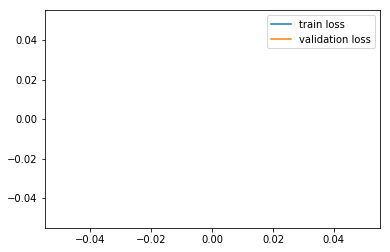

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147495496                                                  
MAE                   NaN   53.792548          NaN  62.793600
RMSE                  NaN  460.543154          NaN  92.603309
MAPE                  NaN    0.152272          NaN   0.133058

array([-39.675, -39.277, -30.494, ..., -91.178, -53.28 ,  35.552])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 446us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 417us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 456us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 402us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 477us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 366us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 427us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 426us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 447us/step - loss: nan - val_loss:

> Training Time :  20.351927042007446 s
dict_keys(['val_loss', 'loss'])


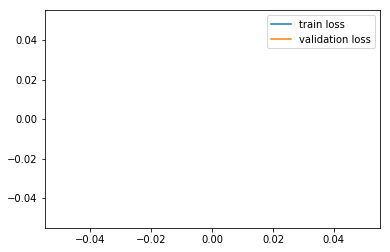

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147495575                                                 
MAE                   NaN  40.275256          NaN  79.771894
RMSE                  NaN  90.378335          NaN  98.400041
MAPE                  NaN  21.737857          NaN  79.079691

array([ 13.682 ,  -7.9718,  28.718 , ..., -58.412 , -53.153 ,  44.901 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.771695910112531 46.85915308572458


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.25417241, -0.20793154,  0.57504889,  0.61580934,  0.94334407,
        1.68475738,  1.47664436])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.0784 - val_loss: 1.5207
Epoch 2/50
459/459 [==============================] - 0s 360us/step - loss: 0.8556 - val_loss: 1.5200
Epoch 3/50
459/459 [==============================] - 0s 389us/step - loss: 0.8458 - val_loss: 1.5202
Epoch 4/50
459/459 [==============================] - 0s 362us/step - loss: 0.8446 - val_loss: 1.5206
Epoch 5/50
459/459 [==============================] - 0s 375us/step - loss: 0.8416 - val_loss: 1.5214
Epoch 6/50
459/459 [==============================] - 0s 395us/step - loss: 0.8397 - val_loss: 1.5217
Epoch 7/50
459/459 [==============================] - 0s 335us/step - loss: 0.8461 - val_loss: 1.5212
Epoch 8/50
459/459 [==============================] - 0s 336us/step - loss: 0.8366 - val_loss: 1.5219
Epoch 9/50
459/459 [==============================] - 0s 341us/step - loss: 0.8258 - val_loss: 1.5306
Epoch 10/50
459/459 [================

> Training Time :  23.05489206314087 s
dict_keys(['val_loss', 'loss'])


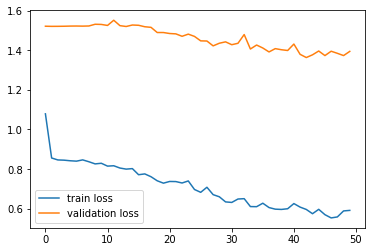

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147501601                                                 
MAE             26.516749  31.861553    41.625932  41.967628
RMSE            37.209314  45.638692    54.520264  55.025152
MAPE             0.072370   0.087884     0.114927   0.116571

array([95.718, 72.825, 84.677, ..., 46.364, 63.166, 19.08 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 22ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 325us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 335us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 317us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 334us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 320us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 381us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 359us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 365us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 386us/step - loss: nan - val_loss

> Training Time :  19.297868013381958 s
dict_keys(['val_loss', 'loss'])


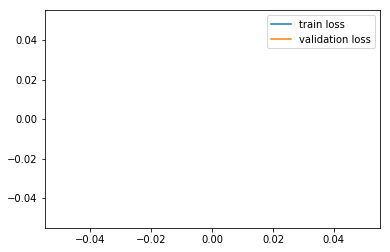

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN   4testFAR
T2147501699                                                  
MAE                   NaN   49.220337          NaN  49.296605
RMSE                  NaN  104.252315          NaN  62.507941
MAPE                  NaN    0.277391          NaN   0.099761

array([     nan,      nan,      nan, ...,  -2.8223,   6.8489, -10.337 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 22ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 490us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 390us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 417us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 457us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 442us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 471us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 494us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 448us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 478us/step - loss: nan - val_loss

> Training Time :  21.767802953720093 s
dict_keys(['val_loss', 'loss'])


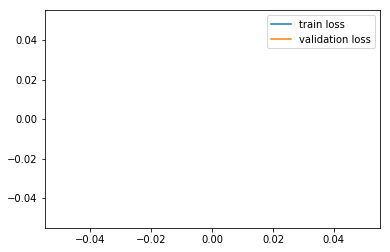

(541, 24)

(61, 24)

1trainFARCNN    2trainFAR  3testFARCNN    4testFAR
T2147501712                                                    
MAE                   NaN   405.975400          NaN  348.441456
RMSE                  NaN  1178.414460          NaN  477.493525
MAPE                  NaN   971.008162          NaN  861.070225

array([ 1.245 , -3.2794, -3.1275, ...,  7.8283,  4.006 ,  2.1668])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.0034290983675486393 8.71211270545931


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.14329809, -0.37602485, -0.35858936, -0.18828624, -0.00089438,
       -0.41234211, -0.25952039])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 21ms/step - loss: 1.2003 - val_loss: 0.9403
Epoch 2/50
459/459 [==============================] - 0s 404us/step - loss: 1.0203 - val_loss: 0.9422
Epoch 3/50
459/459 [==============================] - 0s 374us/step - loss: 1.0125 - val_loss: 0.9400
Epoch 4/50
459/459 [==============================] - 0s 428us/step - loss: 1.0048 - val_loss: 0.9390
Epoch 5/50
459/459 [==============================] - 0s 483us/step - loss: 1.0028 - val_loss: 0.9352
Epoch 6/50
459/459 [==============================] - 0s 484us/step - loss: 0.9936 - val_loss: 0.9373
Epoch 7/50
459/459 [==============================] - 0s 418us/step - loss: 0.9894 - val_loss: 0.9339
Epoch 8/50
459/459 [==============================] - 0s 391us/step - loss: 0.9690 - val_loss: 0.9265
Epoch 9/50
459/459 [==============================] - 0s 589us/step - loss: 0.9699 - val_loss: 0.9216
Epoch 10/50
459/459 [=================

> Training Time :  18.8385648727417 s
dict_keys(['val_loss', 'loss'])


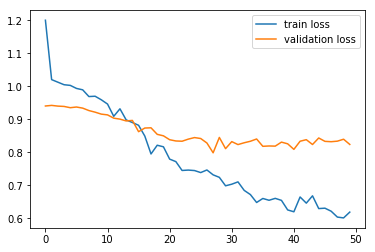

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147501744                                                
MAE              4.413884   6.042317     5.739016  7.311421
RMSE             6.488059   8.730649     7.528445  9.539328
MAPE             0.095229   0.129185     0.066540  0.084103

array([67.735 , 36.78  , 10.162 , ..., -6.784 ,  2.5437, -3.9427])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6719363265663014 43.82129206489815


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.56104334,  0.85465158,  0.24722996, -0.48994593, -1.24740876,
       -1.70036209, -1.71809319])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.1542 - val_loss: 1.3797
Epoch 2/50
459/459 [==============================] - 0s 573us/step - loss: 0.9392 - val_loss: 1.3712
Epoch 3/50
459/459 [==============================] - 0s 535us/step - loss: 0.9293 - val_loss: 1.3605
Epoch 4/50
459/459 [==============================] - 0s 507us/step - loss: 0.9206 - val_loss: 1.3602
Epoch 5/50
459/459 [==============================] - 0s 467us/step - loss: 0.9174 - val_loss: 1.3646
Epoch 6/50
459/459 [==============================] - 0s 857us/step - loss: 0.9059 - val_loss: 1.3670
Epoch 7/50
459/459 [==============================] - 0s 585us/step - loss: 0.9024 - val_loss: 1.3862
Epoch 8/50
459/459 [==============================] - 0s 796us/step - loss: 0.8826 - val_loss: 1.3755
Epoch 9/50
459/459 [==============================] - 0s 770us/step - loss: 0.8751 - val_loss: 1.3849
Epoch 10/50
459/459 [================

> Training Time :  27.616344213485718 s
dict_keys(['val_loss', 'loss'])


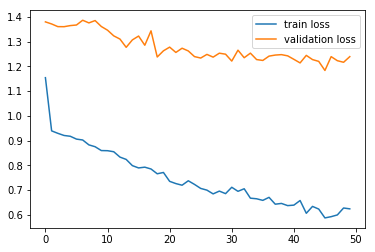

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147501964                                                 
MAE             25.532289  33.326655    31.902517  34.823342
RMSE            34.484892  43.846838    41.101887  43.896892
MAPE             0.123025   0.157411     0.069780   0.075151

array([16.836   , 14.581   , 18.674   , ..., -0.034709,  1.4167  ,
        2.8507  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.39058910787712897 18.112663632051515


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.90795099, 0.78345246, 1.00942695, 0.85754427, 0.62422685,
       0.70980233, 0.85213369])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 22ms/step - loss: 1.0881 - val_loss: 1.7446
Epoch 2/50
459/459 [==============================] - 0s 327us/step - loss: 0.8704 - val_loss: 1.7070
Epoch 3/50
459/459 [==============================] - 0s 361us/step - loss: 0.8546 - val_loss: 1.7169
Epoch 4/50
459/459 [==============================] - 0s 381us/step - loss: 0.8188 - val_loss: 1.7286
Epoch 5/50
459/459 [==============================] - 0s 367us/step - loss: 0.7954 - val_loss: 1.7421
Epoch 6/50
459/459 [==============================] - 0s 362us/step - loss: 0.7545 - val_loss: 1.7425
Epoch 7/50
459/459 [==============================] - 0s 356us/step - loss: 0.7510 - val_loss: 1.7398
Epoch 8/50
459/459 [==============================] - 0s 372us/step - loss: 0.7207 - val_loss: 1.6901
Epoch 9/50
459/459 [==============================] - 0s 389us/step - loss: 0.7124 - val_loss: 1.6795
Epoch 10/50
459/459 [================

> Training Time :  20.008867025375366 s
dict_keys(['val_loss', 'loss'])


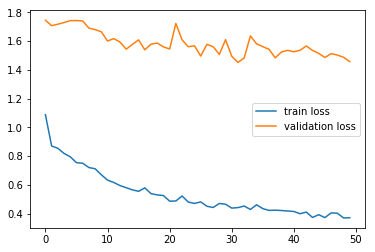

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147501981                                                
MAE              7.255062  12.266181     5.031087  6.502594
RMSE            12.478373  18.151623     6.186711  8.156486
MAPE             0.067403   0.118872     0.023361  0.030138

array([16.121  ,  4.1069 ,  7.9651 , ...,  7.2706 ,  7.7354 , -0.86173])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.41890005430276767 11.397741509284645


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.45115592,  0.39707867,  0.73558433,  0.83786775,  0.6582269 ,
        0.17635073, -0.04984759])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 16s 34ms/step - loss: 1.2325 - val_loss: 0.8066
Epoch 2/50
459/459 [==============================] - 0s 500us/step - loss: 1.0140 - val_loss: 0.7986
Epoch 3/50
459/459 [==============================] - 0s 509us/step - loss: 1.0090 - val_loss: 0.7852
Epoch 4/50
459/459 [==============================] - 0s 522us/step - loss: 0.9881 - val_loss: 0.7654
Epoch 5/50
459/459 [==============================] - 0s 442us/step - loss: 0.9576 - val_loss: 0.7505
Epoch 6/50
459/459 [==============================] - 0s 457us/step - loss: 0.9300 - val_loss: 0.7289
Epoch 7/50
459/459 [==============================] - 0s 499us/step - loss: 0.9007 - val_loss: 0.7089
Epoch 8/50
459/459 [==============================] - 0s 489us/step - loss: 0.8730 - val_loss: 0.7021
Epoch 9/50
459/459 [==============================] - 0s 469us/step - loss: 0.8070 - val_loss: 0.7052
Epoch 10/50
459/459 [================

> Training Time :  26.119692087173462 s
dict_keys(['val_loss', 'loss'])


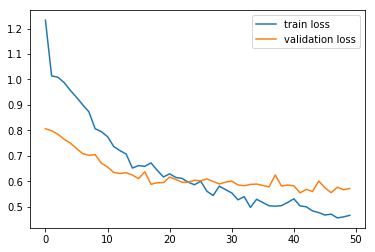

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147502071                                                 
MAE              5.196157   8.040542     9.464618  11.442617
RMSE             7.002578  11.414266    11.976618  14.485638
MAPE             0.067534   0.094781     0.063445   0.077305

array([  6.5329,  -8.108 , -18.367 , ...,   8.6698,  31.855 ,  22.225 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.5454242360553527 17.130016220207136


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.34953124, -0.50516147, -1.10405174,  0.00372129, -0.50714629,
       -0.87369586, -0.48230102])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 24ms/step - loss: 1.4081 - val_loss: 0.4435
Epoch 2/50
459/459 [==============================] - 0s 411us/step - loss: 1.1313 - val_loss: 0.4364
Epoch 3/50
459/459 [==============================] - 0s 515us/step - loss: 1.1069 - val_loss: 0.4361
Epoch 4/50
459/459 [==============================] - 0s 432us/step - loss: 1.1084 - val_loss: 0.4354
Epoch 5/50
459/459 [==============================] - 0s 726us/step - loss: 1.1039 - val_loss: 0.4347
Epoch 6/50
459/459 [==============================] - 0s 695us/step - loss: 1.1079 - val_loss: 0.4343
Epoch 7/50
459/459 [==============================] - 0s 474us/step - loss: 1.0978 - val_loss: 0.4336
Epoch 8/50
459/459 [==============================] - 0s 430us/step - loss: 1.0941 - val_loss: 0.4340
Epoch 9/50
459/459 [==============================] - 0s 398us/step - loss: 1.0933 - val_loss: 0.4337
Epoch 10/50
459/459 [================

> Training Time :  21.75576400756836 s
dict_keys(['val_loss', 'loss'])


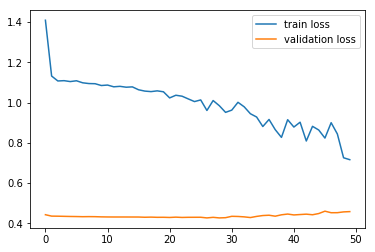

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147502091                                                 
MAE              8.915598   9.952127    11.172979  11.111122
RMSE            14.029232  17.198010    14.497155  14.382439
MAPE             0.162402   0.131260     0.078010   0.077525

array([38.115, 11.887, 23.063, ..., 40.241, 43.607, 13.292])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-1.311359460796837 34.79909706988765


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.13297076, 0.37927304, 0.7004308 , 0.89003342, 0.73221324,
       0.72796025, 0.4348492 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 19s 42ms/step - loss: 1.2715 - val_loss: 0.7250
Epoch 2/50
459/459 [==============================] - 0s 357us/step - loss: 1.0365 - val_loss: 0.7272
Epoch 3/50
459/459 [==============================] - 0s 370us/step - loss: 1.0216 - val_loss: 0.7291
Epoch 4/50
459/459 [==============================] - 0s 356us/step - loss: 1.0114 - val_loss: 0.7265
Epoch 5/50
459/459 [==============================] - 0s 342us/step - loss: 1.0049 - val_loss: 0.7270
Epoch 6/50
459/459 [==============================] - 0s 378us/step - loss: 0.9912 - val_loss: 0.7245
Epoch 7/50
459/459 [==============================] - 0s 342us/step - loss: 0.9650 - val_loss: 0.7187
Epoch 8/50
459/459 [==============================] - 0s 346us/step - loss: 0.9600 - val_loss: 0.7006
Epoch 9/50
459/459 [==============================] - 0s 396us/step - loss: 0.9275 - val_loss: 0.6768
Epoch 10/50
459/459 [================

> Training Time :  31.40720820426941 s
dict_keys(['val_loss', 'loss'])


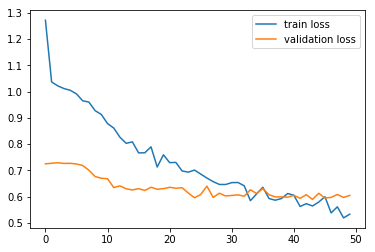

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147502103                                                 
MAE             17.262201  24.713366    29.017075  32.018708
RMSE            23.695475  34.604003    36.335207  39.343576
MAPE             0.154345   0.241252     0.083524   0.091105

array([ 0.59604 , -0.7392  , -0.073034, ..., -0.26867 , -0.68916 ,
        0.29224 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.005495275046000604 3.3120286591124337


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.17830302, -0.22484566, -0.02371032,  0.35652008, -2.31323339,
       -0.66303631, -0.33610678])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: 1.4681 - val_loss: 0.2171
Epoch 2/50
459/459 [==============================] - 0s 471us/step - loss: 1.1564 - val_loss: 0.2124
Epoch 3/50
459/459 [==============================] - 0s 572us/step - loss: 1.1304 - val_loss: 0.2120
Epoch 4/50
459/459 [==============================] - 0s 449us/step - loss: 1.1247 - val_loss: 0.2121
Epoch 5/50
459/459 [==============================] - 0s 442us/step - loss: 1.1225 - val_loss: 0.2120
Epoch 6/50
459/459 [==============================] - 0s 443us/step - loss: 1.1214 - val_loss: 0.2116
Epoch 7/50
459/459 [==============================] - 0s 418us/step - loss: 1.1201 - val_loss: 0.2103
Epoch 8/50
459/459 [==============================] - 0s 447us/step - loss: 1.1198 - val_loss: 0.2095
Epoch 9/50
459/459 [==============================] - 0s 489us/step - loss: 1.1189 - val_loss: 0.2106
Epoch 10/50
459/459 [=================

> Training Time :  20.553559064865112 s
dict_keys(['val_loss', 'loss'])


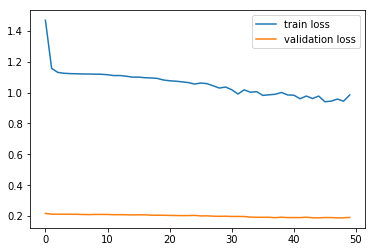

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147502183                                                
MAE              1.763251   2.041113     0.789506  0.843218
RMSE             2.903197   3.286504     1.020289  1.096363
MAPE             0.032727   0.038079     0.012946  0.013858

array([ 14.43  ,  17.873 ,   5.4039, ..., -31.041 , -26.839 , -47.153 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-10.461388191608883 196.77931693826142


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.12649393,  0.14399068,  0.08062478,  0.04643267,  0.01361977,
       -0.02176353,  0.04412856])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 9s 20ms/step - loss: 1.4462 - val_loss: 0.2289
Epoch 2/50
459/459 [==============================] - 0s 550us/step - loss: 1.1867 - val_loss: 0.2259
Epoch 3/50
459/459 [==============================] - 0s 832us/step - loss: 1.1228 - val_loss: 0.2266
Epoch 4/50
459/459 [==============================] - 0s 511us/step - loss: 1.1100 - val_loss: 0.2250
Epoch 5/50
459/459 [==============================] - 0s 790us/step - loss: 1.0943 - val_loss: 0.2258
Epoch 6/50
459/459 [==============================] - 0s 783us/step - loss: 1.0919 - val_loss: 0.2237
Epoch 7/50
459/459 [==============================] - 0s 400us/step - loss: 1.0745 - val_loss: 0.2258
Epoch 8/50
459/459 [==============================] - 0s 394us/step - loss: 1.0744 - val_loss: 0.2247
Epoch 9/50
459/459 [==============================] - 0s 400us/step - loss: 1.0438 - val_loss: 0.2248
Epoch 10/50
459/459 [=================

> Training Time :  20.508901119232178 s
dict_keys(['val_loss', 'loss'])


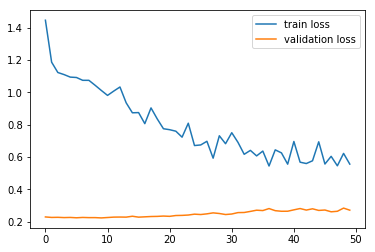

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147502227                                                   
MAE             53.307654   72.968721    70.218929   46.743281
RMSE           131.700078  196.317084   165.081499  125.602117
MAPE             1.865407    2.295164     3.510844    2.833182

array([ 9.3282,  7.8003, 16.413 , ..., 22.158 ,  7.9723,  3.7594])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.22500664454835773 22.78444145925226


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.41928641,  0.35222749,  0.73023544,  0.7725889 ,  0.3031282 ,
       -0.33500024, -0.5173703 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 36s 78ms/step - loss: 1.2849 - val_loss: 0.7695
Epoch 2/50
459/459 [==============================] - 0s 347us/step - loss: 1.0570 - val_loss: 0.7690
Epoch 3/50
459/459 [==============================] - 0s 344us/step - loss: 1.0476 - val_loss: 0.7691
Epoch 4/50
459/459 [==============================] - 0s 350us/step - loss: 1.0399 - val_loss: 0.7674
Epoch 5/50
459/459 [==============================] - 0s 411us/step - loss: 1.0436 - val_loss: 0.7671
Epoch 6/50
459/459 [==============================] - 0s 380us/step - loss: 1.0409 - val_loss: 0.7641
Epoch 7/50
459/459 [==============================] - 0s 348us/step - loss: 1.0366 - val_loss: 0.7593
Epoch 8/50
459/459 [==============================] - 0s 420us/step - loss: 1.0351 - val_loss: 0.7614
Epoch 9/50
459/459 [==============================] - 0s 538us/step - loss: 1.0271 - val_loss: 0.7613
Epoch 10/50
459/459 [================

> Training Time :  47.22303581237793 s
dict_keys(['val_loss', 'loss'])


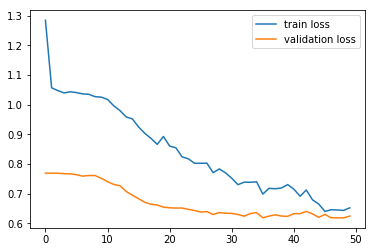

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147502619                                                 
MAE             12.803626  17.173240    15.879847  16.279525
RMSE            16.926721  22.846678    23.052589  23.345691
MAPE             0.128833   0.179318     0.143155   0.155173

array([ -70.194, -168.93 , -286.64 , ..., -247.69 , -207.74 ,  528.81 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.07964911929744324 294.71826940505326


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.23790297, -0.57292122, -0.9723196 , -0.85088159, -0.63878073,
       -0.60885384, -0.48789086])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 22ms/step - loss: 1.2990 - val_loss: 0.7917
Epoch 2/50
459/459 [==============================] - 0s 348us/step - loss: 1.0563 - val_loss: 0.7882
Epoch 3/50
459/459 [==============================] - 0s 348us/step - loss: 1.0384 - val_loss: 0.7885
Epoch 4/50
459/459 [==============================] - 0s 356us/step - loss: 1.0369 - val_loss: 0.7878
Epoch 5/50
459/459 [==============================] - 0s 405us/step - loss: 1.0314 - val_loss: 0.7854
Epoch 6/50
459/459 [==============================] - 0s 352us/step - loss: 1.0306 - val_loss: 0.7818
Epoch 7/50
459/459 [==============================] - 0s 430us/step - loss: 1.0296 - val_loss: 0.7786
Epoch 8/50
459/459 [==============================] - 0s 381us/step - loss: 1.0287 - val_loss: 0.7782
Epoch 9/50
459/459 [==============================] - 0s 362us/step - loss: 1.0265 - val_loss: 0.7791
Epoch 10/50
459/459 [================

> Training Time :  20.90165400505066 s
dict_keys(['val_loss', 'loss'])


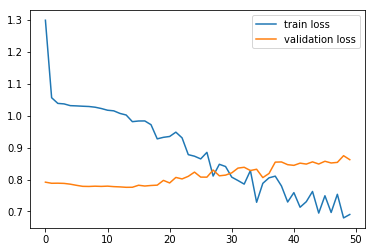

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147506244                                                   
MAE            171.205062  214.079307   269.387096  264.566588
RMSE           235.900287  294.579719   358.839071  346.959019
MAPE           103.266846  141.056056    55.994161   73.665042

array([ 35.651  , -12.021  ,   0.89954, ...,  51.356  ,  72.753  ,
        37.696  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

704.2765014621284 16565.759677578837


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.0403619 , -0.04323964, -0.04245969, -0.04230868, -0.04198112,
       -0.04263864, -0.04295597])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 27ms/step - loss: 0.0014 - val_loss: 8.6739
Epoch 2/50
459/459 [==============================] - 0s 406us/step - loss: 3.7019e-04 - val_loss: 8.7647
Epoch 3/50
459/459 [==============================] - 0s 442us/step - loss: 1.2243e-04 - val_loss: 8.8390
Epoch 4/50
459/459 [==============================] - 0s 430us/step - loss: 5.5500e-05 - val_loss: 8.8474
Epoch 5/50
459/459 [==============================] - 0s 391us/step - loss: 2.7150e-05 - val_loss: 8.8427
Epoch 6/50
459/459 [==============================] - 0s 369us/step - loss: 1.6022e-05 - val_loss: 8.8347
Epoch 7/50
459/459 [==============================] - 0s 387us/step - loss: 1.0677e-05 - val_loss: 8.8303
Epoch 8/50
459/459 [==============================] - 0s 359us/step - loss: 7.9462e-06 - val_loss: 8.8278
Epoch 9/50
459/459 [==============================] - 0s 370us/step - loss: 5.5682e-06 - val_loss: 8.8259
Epoch

> Training Time :  21.934821844100952 s
dict_keys(['val_loss', 'loss'])


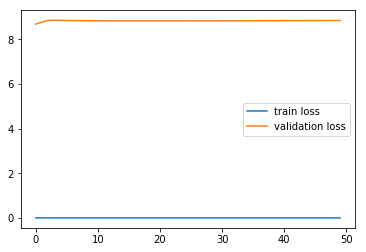

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN   4testFAR
T2147509585                                                    
MAE           1592.413045    735.740573    37.062698  37.813278
RMSE         19170.006907  16687.647115    48.212436  49.420423
MAPE            20.917812      9.260035     0.105046   0.108410

array([-11.623 ,  -8.298 ,  -0.8779, ...,   3.0021,   4.6093,   2.7042])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.08301586065845504 12.79643606205709


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.9147872 , -0.65494922, -0.07509246,  0.44059019,  0.70566399,
        0.69436397,  0.46151789])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 21ms/step - loss: 1.1127 - val_loss: 1.1083
Epoch 2/50
459/459 [==============================] - 0s 454us/step - loss: 0.8737 - val_loss: 1.0602
Epoch 3/50
459/459 [==============================] - 0s 454us/step - loss: 0.8279 - val_loss: 1.0017
Epoch 4/50
459/459 [==============================] - 0s 474us/step - loss: 0.7825 - val_loss: 0.9656
Epoch 5/50
459/459 [==============================] - 0s 472us/step - loss: 0.7507 - val_loss: 0.9345
Epoch 6/50
459/459 [==============================] - 0s 446us/step - loss: 0.7302 - val_loss: 0.9156
Epoch 7/50
459/459 [==============================] - 0s 572us/step - loss: 0.7223 - val_loss: 0.9085
Epoch 8/50
459/459 [==============================] - 0s 440us/step - loss: 0.7013 - val_loss: 0.8900
Epoch 9/50
459/459 [==============================] - 0s 446us/step - loss: 0.6653 - val_loss: 0.8800
Epoch 10/50
459/459 [================

> Training Time :  22.86543583869934 s
dict_keys(['val_loss', 'loss'])


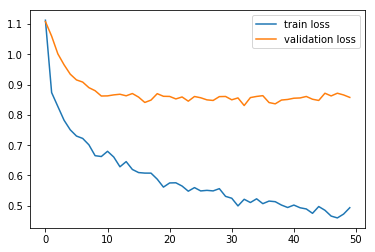

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147509808                                                 
MAE              6.614386   9.929215     8.615247  10.451225
RMSE             8.683129  12.760003    11.408050  14.098251
MAPE             0.199152   0.281211     0.187811   0.236204

array([ 121.42 , -495.04 , -484.77 , ...,   28.378,   41.611,  164.39 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 174s 379ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 672us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 569us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 603us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 486us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 529us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 576us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 487us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 514us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 697us/step - loss: nan - val_lo

> Training Time :  185.06342101097107 s
dict_keys(['val_loss', 'loss'])


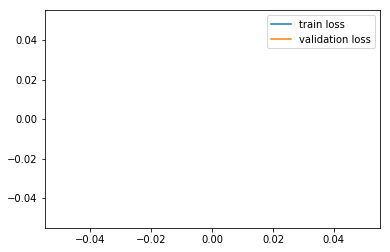

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147509897                                                   
MAE                   NaN  224.389602          NaN  361.319689
RMSE                  NaN  333.343582          NaN  429.249351
MAPE                  NaN   15.739067          NaN   20.642583

array([-5.4118e+01, -5.5977e+01, -1.9275e+01, ...,  2.0539e-15,
       -3.4694e-14, -2.1967e-04])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 17s 36ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 563us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 488us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 922us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 592us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 805us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Ep

> Training Time :  30.68646001815796 s
dict_keys(['val_loss', 'loss'])


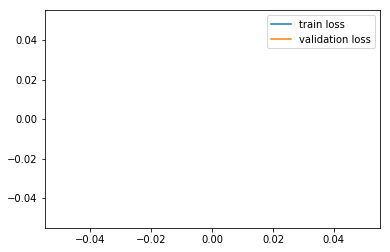

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN     4testFAR
T2147510012                                                      
MAE                   NaN   2269.297099          NaN   174.890099
RMSE                  NaN  36250.940718          NaN  1934.105227
MAPE                  NaN     11.292461          NaN   102.753624

array([219.   , 328.19 , 555.63 , ...,  65.304,  67.957,  -4.386])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.1646882830748166 329.0603084490409


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.66199206, 0.99381573, 1.68499602, 2.11187826, 2.07291884,
       2.0808809 , 1.8749612 ])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 10s 22ms/step - loss: 1.1308 - val_loss: 1.1511
Epoch 2/50
459/459 [==============================] - 0s 519us/step - loss: 0.9567 - val_loss: 1.1369
Epoch 3/50
459/459 [==============================] - 0s 457us/step - loss: 0.9384 - val_loss: 1.1067
Epoch 4/50
459/459 [==============================] - 0s 540us/step - loss: 0.9200 - val_loss: 1.0950
Epoch 5/50
459/459 [==============================] - 0s 484us/step - loss: 0.9078 - val_loss: 1.0671
Epoch 6/50
459/459 [==============================] - 0s 425us/step - loss: 0.8877 - val_loss: 1.0352
Epoch 7/50
459/459 [==============================] - 0s 379us/step - loss: 0.8692 - val_loss: 1.0046
Epoch 8/50
459/459 [==============================] - 0s 463us/step - loss: 0.8385 - val_loss: 0.9805
Epoch 9/50
459/459 [==============================] - 0s 442us/step - loss: 0.8148 - val_loss: 0.9474
Epoch 10/50
459/459 [================

> Training Time :  20.77664589881897 s
dict_keys(['val_loss', 'loss'])


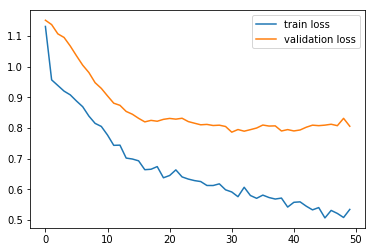

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147510016                                                   
MAE            165.844316  263.532505   211.258236  229.083433
RMSE           231.283294  328.309842   293.281220  295.079389
MAPE            79.577522  119.383084   191.547339  220.705940

array([ -5.1825,  -2.6622,  -9.1231, ...,  -3.6986,  -8.5775, -14.158 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.26422615724680654 15.70207482416562


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.31322446, -0.15271701, -0.56418492, -0.40959389, -0.46931211,
       -0.38857755, -0.44125849])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 13s 28ms/step - loss: 1.2607 - val_loss: 1.0540
Epoch 2/50
459/459 [==============================] - 0s 361us/step - loss: 1.0230 - val_loss: 1.0426
Epoch 3/50
459/459 [==============================] - 0s 368us/step - loss: 1.0056 - val_loss: 1.0413
Epoch 4/50
459/459 [==============================] - 0s 373us/step - loss: 1.0002 - val_loss: 1.0410
Epoch 5/50
459/459 [==============================] - 0s 352us/step - loss: 0.9999 - val_loss: 1.0393
Epoch 6/50
459/459 [==============================] - 0s 578us/step - loss: 0.9979 - val_loss: 1.0369
Epoch 7/50
459/459 [==============================] - 0s 457us/step - loss: 0.9977 - val_loss: 1.0361
Epoch 8/50
459/459 [==============================] - 0s 441us/step - loss: 0.9958 - val_loss: 1.0334
Epoch 9/50
459/459 [==============================] - 0s 526us/step - loss: 0.9997 - val_loss: 1.0366
Epoch 10/50
459/459 [================

> Training Time :  25.13830804824829 s
dict_keys(['val_loss', 'loss'])


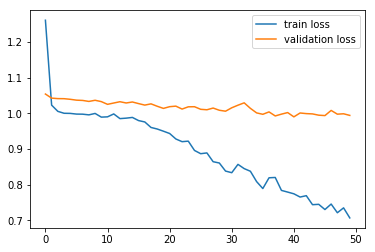

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147510213                                                 
MAE              7.923422   9.578059     9.813017   9.762578
RMSE            13.066762  15.765991    15.298005  15.577374
MAPE             0.139891   0.185062     0.156141   0.157363

array([-46.009, -50.097, -30.277, ..., 122.72 , 128.17 , 183.84 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 13s 28ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 666us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 788us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 737us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 923us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 970us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 976us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 844us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 848us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 817us/step - loss: nan - val_loss

> Training Time :  30.989529132843018 s
dict_keys(['val_loss', 'loss'])


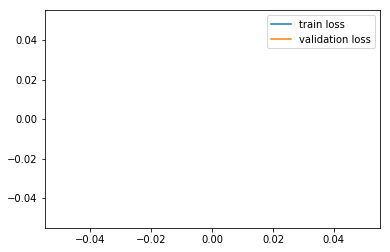

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147510242                                                   
MAE                   NaN   89.969804          NaN   65.832921
RMSE                  NaN  779.432401          NaN  101.763790
MAPE                  NaN   23.503374          NaN    0.650539

array([ -2.9306, -10.549 , -10.304 , ...,  13.228 ,  21.32  ,  33.503 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 14s 31ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 399us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 369us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 383us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 367us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 379us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 430us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 419us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 429us/step - loss: nan - val_loss

> Training Time :  25.676793098449707 s
dict_keys(['val_loss', 'loss'])


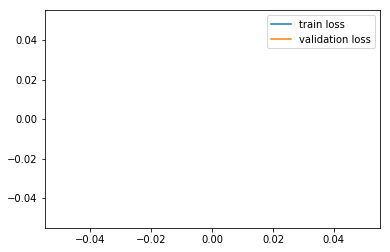

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147510296                                                 
MAE                   NaN  16.830037          NaN  21.171517
RMSE                  NaN  30.054959          NaN  31.128477
MAPE                  NaN   0.310523          NaN   0.280517

array([8.6264 , 6.4878 , 7.8936 , ..., 9.7048 , 9.6779 , 0.82824])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.005605312446776135 7.845172159028475


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.10029521,  0.82769443,  1.00688744,  0.93734148,  0.28459609,
       -0.23051052, -0.00163103])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 23s 51ms/step - loss: 1.2458 - val_loss: 0.6562
Epoch 2/50
459/459 [==============================] - 0s 452us/step - loss: 1.0482 - val_loss: 0.6499
Epoch 3/50
459/459 [==============================] - 0s 424us/step - loss: 1.0192 - val_loss: 0.6414
Epoch 4/50
459/459 [==============================] - 0s 449us/step - loss: 1.0014 - val_loss: 0.6277
Epoch 5/50
459/459 [==============================] - 0s 468us/step - loss: 0.9908 - val_loss: 0.6162
Epoch 6/50
459/459 [==============================] - 0s 450us/step - loss: 0.9479 - val_loss: 0.6056
Epoch 7/50
459/459 [==============================] - 0s 464us/step - loss: 0.9461 - val_loss: 0.5922
Epoch 8/50
459/459 [==============================] - 0s 543us/step - loss: 0.9180 - val_loss: 0.5823
Epoch 9/50
459/459 [==============================] - 0s 592us/step - loss: 0.8914 - val_loss: 0.5637
Epoch 10/50
459/459 [================

> Training Time :  34.86338019371033 s
dict_keys(['val_loss', 'loss'])


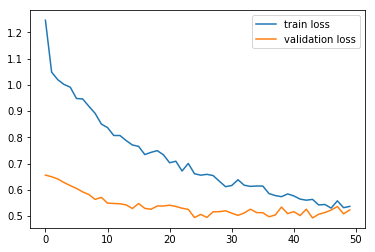

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147510418                                                 
MAE              3.672392   5.411032     6.431324   8.221360
RMSE             5.192952   7.837867     8.182152  10.387965
MAPE             0.113949   0.157872     0.073523   0.093276

array([ 27.024 ,  39.337 ,  44.248 , ...,   6.9812,  63.244 , 137.45  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 24ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 425us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 458us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 416us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 456us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 379us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 468us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 426us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 378us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 430us/step - loss: nan - val_loss

> Training Time :  25.720858812332153 s
dict_keys(['val_loss', 'loss'])


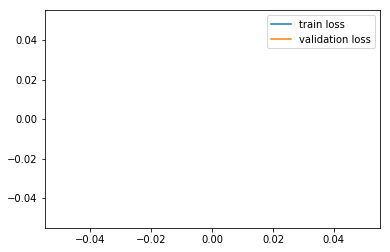

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147510433                                                   
MAE                   NaN   72.051046          NaN  100.804169
RMSE                  NaN  104.125878          NaN  125.442208
MAPE                  NaN    0.589918          NaN    0.494996

array([  -6.1108, -129.06  , -195.22  , ...,   67.432 ,   26.268 ,
         63.801 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-31.125140424041962 609.4690696517123


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.04104284, -0.16068881, -0.26924231,  0.1724733 , -0.33751485,
       -0.07687488, -0.30289455])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 17s 37ms/step - loss: 1.2291 - val_loss: 1.2629
Epoch 2/50
459/459 [==============================] - 0s 421us/step - loss: 0.9775 - val_loss: 1.2519
Epoch 3/50
459/459 [==============================] - 0s 433us/step - loss: 0.9703 - val_loss: 1.2531
Epoch 4/50
459/459 [==============================] - 0s 512us/step - loss: 0.9527 - val_loss: 1.2527
Epoch 5/50
459/459 [==============================] - 0s 457us/step - loss: 0.9469 - val_loss: 1.2517
Epoch 6/50
459/459 [==============================] - 0s 415us/step - loss: 0.9476 - val_loss: 1.2480
Epoch 7/50
459/459 [==============================] - 0s 441us/step - loss: 0.9423 - val_loss: 1.2475
Epoch 8/50
459/459 [==============================] - 0s 426us/step - loss: 0.9549 - val_loss: 1.2477
Epoch 9/50
459/459 [==============================] - 0s 403us/step - loss: 0.9332 - val_loss: 1.2416
Epoch 10/50
459/459 [================

> Training Time :  29.365718841552734 s
dict_keys(['val_loss', 'loss'])


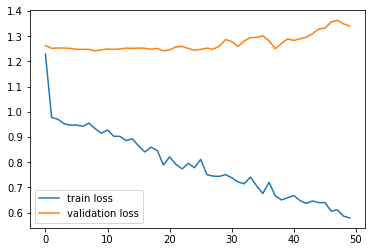

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147513857                                                   
MAE            343.741755  431.320635   385.905778  421.211413
RMSE           486.939921  612.535351   599.939550  611.980130
MAPE            12.103024   23.214161   226.959700  260.782085

array([19.7     , 16.236   , 17.413   , ...,  7.5811  , -0.061096,
        7.1835  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.2469043620597628 20.21362202744246


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.91290396, 0.74153438, 0.79976244, 0.80985464, 0.8928185 ,
       0.87095205, 1.01501332])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 19s 41ms/step - loss: 1.3246 - val_loss: 0.6960
Epoch 2/50
459/459 [==============================] - 0s 634us/step - loss: 1.0590 - val_loss: 0.6919
Epoch 3/50
459/459 [==============================] - 0s 671us/step - loss: 1.0443 - val_loss: 0.6833
Epoch 4/50
459/459 [==============================] - 0s 754us/step - loss: 1.0300 - val_loss: 0.6709
Epoch 5/50
459/459 [==============================] - 1s 1ms/step - loss: 1.0032 - val_loss: 0.6575
Epoch 6/50
459/459 [==============================] - 0s 864us/step - loss: 1.0099 - val_loss: 0.6450
Epoch 7/50
459/459 [==============================] - 1s 1ms/step - loss: 0.9890 - val_loss: 0.6388
Epoch 8/50
459/459 [==============================] - 0s 911us/step - loss: 0.9620 - val_loss: 0.6282
Epoch 9/50
459/459 [==============================] - 0s 775us/step - loss: 0.9555 - val_loss: 0.6160
Epoch 10/50
459/459 [====================

> Training Time :  35.50087904930115 s
dict_keys(['val_loss', 'loss'])


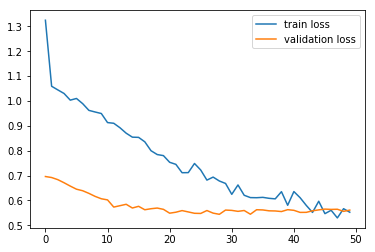

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147513868                                                 
MAE              9.665279  13.966111     7.842021   7.693945
RMSE            13.595442  20.315601    15.687101  16.984980
MAPE             0.125752   0.180822     0.072332   0.069440

array([  0.   ,   0.   ,   0.   , ..., -35.272, -35.957, -33.772])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 25ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 348us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 355us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 364us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 392us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 433us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 402us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 494us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 429us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 465us/step - loss: nan - val_loss

> Training Time :  22.78893733024597 s
dict_keys(['val_loss', 'loss'])


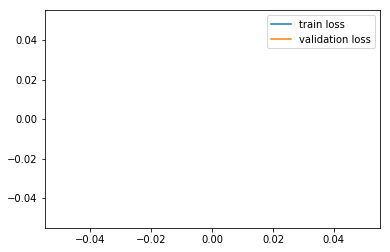

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147513877                                                 
MAE                   NaN  24.797175          NaN  25.191175
RMSE                  NaN  36.586918          NaN  33.947150
MAPE                  NaN   0.192875          NaN   0.106835

array([34.858  , 29.036  , 33.246  , ..., -0.71646,  6.3648 ,  7.8211 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.0512768891499389 33.62958300888614


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.00526739, 0.832146  , 0.9573334 , 1.02795575, 1.07235118,
       1.11933363, 1.12415081])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 18s 40ms/step - loss: 1.1604 - val_loss: 0.9062
Epoch 2/50
459/459 [==============================] - 0s 385us/step - loss: 1.0135 - val_loss: 0.9056
Epoch 3/50
459/459 [==============================] - 0s 401us/step - loss: 1.0104 - val_loss: 0.9059
Epoch 4/50
459/459 [==============================] - 0s 391us/step - loss: 0.9970 - val_loss: 0.9022
Epoch 5/50
459/459 [==============================] - 0s 407us/step - loss: 0.9954 - val_loss: 0.8941
Epoch 6/50
459/459 [==============================] - 0s 409us/step - loss: 0.9767 - val_loss: 0.8793
Epoch 7/50
459/459 [==============================] - 0s 423us/step - loss: 0.9621 - val_loss: 0.8672
Epoch 8/50
459/459 [==============================] - 0s 435us/step - loss: 0.9395 - val_loss: 0.8512
Epoch 9/50
459/459 [==============================] - 0s 428us/step - loss: 0.9314 - val_loss: 0.8399
Epoch 10/50
459/459 [================

> Training Time :  30.438093662261963 s
dict_keys(['val_loss', 'loss'])


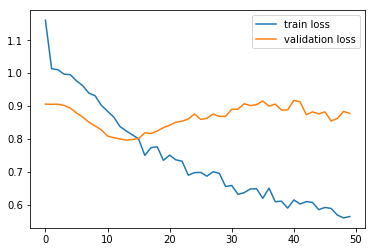

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147513885                                                 
MAE             16.892899  24.679392    13.879896  12.963932
RMSE            24.472713  33.593159    21.072002  20.074674
MAPE             1.492248   1.847566     0.072135   0.068128

array([  295.4 ,   313.84,   313.88, ..., -1399.2 , -1400.7 , -1438.6 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

10.289431181113136 569.0755098274275


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([0.50100657, 0.53341   , 0.53348029, 0.40934914, 0.42349489,
       0.47338282, 0.40627397])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 25ms/step - loss: 1.2149 - val_loss: 1.2175
Epoch 2/50
459/459 [==============================] - 0s 451us/step - loss: 0.9925 - val_loss: 1.2000
Epoch 3/50
459/459 [==============================] - 0s 478us/step - loss: 0.9756 - val_loss: 1.1967
Epoch 4/50
459/459 [==============================] - 0s 510us/step - loss: 0.9693 - val_loss: 1.1951
Epoch 5/50
459/459 [==============================] - 0s 485us/step - loss: 0.9768 - val_loss: 1.1996
Epoch 6/50
459/459 [==============================] - 0s 490us/step - loss: 0.9683 - val_loss: 1.1949
Epoch 7/50
459/459 [==============================] - 0s 485us/step - loss: 0.9668 - val_loss: 1.1940
Epoch 8/50
459/459 [==============================] - 0s 619us/step - loss: 0.9587 - val_loss: 1.1966
Epoch 9/50
459/459 [==============================] - 0s 745us/step - loss: 0.9596 - val_loss: 1.1941
Epoch 10/50
459/459 [================

> Training Time :  24.556274890899658 s
dict_keys(['val_loss', 'loss'])


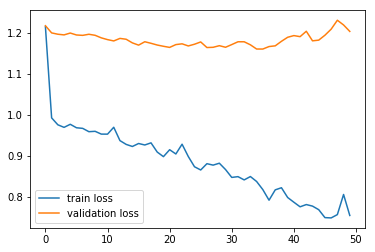

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147517131                                                   
MAE            328.416001  389.703842   691.933817  694.631870
RMSE           495.373020  571.841049   922.239041  863.980973
MAPE             4.691228    5.583774     5.916762    5.419108

array([ 0.17679 ,  0.076976,  0.066231, ..., -5.3982  , -5.8356  ,
       -5.6422  ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.08460985078999392 2.073946573846306


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.04444673, -0.00368083, -0.00886178, -0.12511405, -0.08309416,
       -0.00078249,  0.16121927])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 23ms/step - loss: 1.2507 - val_loss: 0.7730
Epoch 2/50
459/459 [==============================] - 0s 400us/step - loss: 1.0541 - val_loss: 0.7737
Epoch 3/50
459/459 [==============================] - 0s 379us/step - loss: 1.0334 - val_loss: 0.7691
Epoch 4/50
459/459 [==============================] - 0s 362us/step - loss: 1.0396 - val_loss: 0.7572
Epoch 5/50
459/459 [==============================] - 0s 367us/step - loss: 1.0271 - val_loss: 0.7475
Epoch 6/50
459/459 [==============================] - 0s 371us/step - loss: 1.0300 - val_loss: 0.7306
Epoch 7/50
459/459 [==============================] - 0s 390us/step - loss: 0.9725 - val_loss: 0.6950
Epoch 8/50
459/459 [==============================] - 0s 359us/step - loss: 0.9874 - val_loss: 0.6671
Epoch 9/50
459/459 [==============================] - 0s 355us/step - loss: 0.9406 - val_loss: 0.6323
Epoch 10/50
459/459 [================

> Training Time :  20.240267038345337 s
dict_keys(['val_loss', 'loss'])


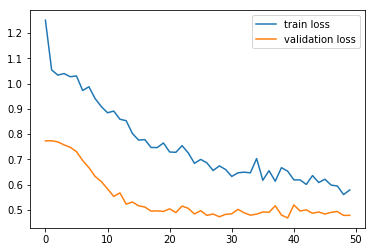

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147517225                                                
MAE              0.913625   1.375012     1.256773  1.476000
RMSE             1.423942   2.086861     1.785458  2.215013
MAPE             0.016783   0.025651     0.023464  0.027720

array([1.7596  , 1.768   , 1.7812  , ..., 0.04673 , 0.022256, 0.018606])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

1.2487708780433395 25.72415697350247


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.01985795,  0.0201845 ,  0.02069763,  0.00543183, -0.03470943,
       -0.06525582, -0.06494483])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 16s 35ms/step - loss: 1.6458 - val_loss: 0.2270
Epoch 2/50
459/459 [==============================] - 0s 480us/step - loss: 1.2702 - val_loss: 0.2220
Epoch 3/50
459/459 [==============================] - 0s 499us/step - loss: 1.1825 - val_loss: 0.2209
Epoch 4/50
459/459 [==============================] - 0s 514us/step - loss: 1.1570 - val_loss: 0.2211
Epoch 5/50
459/459 [==============================] - 0s 475us/step - loss: 1.1648 - val_loss: 0.2202
Epoch 6/50
459/459 [==============================] - 0s 680us/step - loss: 1.1464 - val_loss: 0.2190
Epoch 7/50
459/459 [==============================] - 0s 450us/step - loss: 1.1555 - val_loss: 0.2185
Epoch 8/50
459/459 [==============================] - 0s 477us/step - loss: 1.1571 - val_loss: 0.2182
Epoch 9/50
459/459 [==============================] - 0s 402us/step - loss: 1.1369 - val_loss: 0.2175
Epoch 10/50
459/459 [================

> Training Time :  27.911967992782593 s
dict_keys(['val_loss', 'loss'])


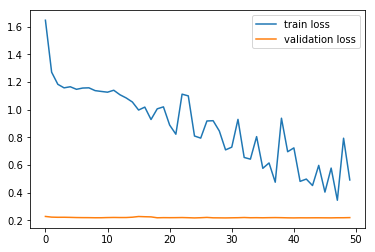

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147517313                                                
MAE              3.365779   4.281438     0.566049  0.097655
RMSE            14.391545  25.919921     0.679769  0.250653
MAPE             0.101888   0.296079     0.004704  0.000812

array([    nan,     nan,     nan, ..., 35.201 , 42.061 ,  9.2195])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 14s 31ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 438us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 715us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 725us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 557us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 554us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 612us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 451us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 436us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 498us/step - loss: nan - val_loss

> Training Time :  28.29347515106201 s
dict_keys(['val_loss', 'loss'])


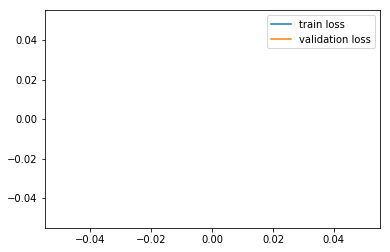

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147517318                                                   
MAE                   NaN  245.161556          NaN  216.431771
RMSE                  NaN  521.867376          NaN  278.197621
MAPE                  NaN   14.435119          NaN    2.560496

array([-2468.5, -2655.5, -2794.4, ...,     nan,     nan,     nan])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 22s 47ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 445us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 428us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 458us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 568us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 517us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 757us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 713us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 640us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 546us/step - loss: nan - val_loss

> Training Time :  35.385276794433594 s
dict_keys(['val_loss', 'loss'])


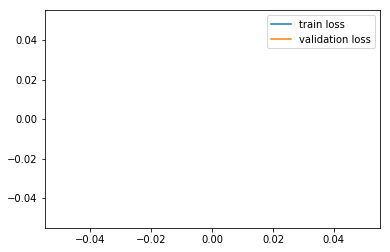

(541, 24)

(61, 24)

1trainFARCNN     2trainFAR  3testFARCNN     4testFAR
T2147517622                                                      
MAE                   NaN   1865.072440          NaN   356.199693
RMSE                  NaN  11010.129722          NaN  1378.324002
MAPE                  NaN      1.441118          NaN          NaN

array([-3.6497, -8.6608, -7.9006, ..., 13.356 ,  3.4558, -4.0751])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.03470167367700728 14.480691764228778


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.24964265, -0.59569656, -0.54319907, -0.46399015, -0.31689082,
       -0.3237068 , -1.38503731])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.0300 - val_loss: 1.8541
Epoch 2/50
459/459 [==============================] - 0s 600us/step - loss: 0.8658 - val_loss: 1.8439
Epoch 3/50
459/459 [==============================] - 0s 570us/step - loss: 0.8541 - val_loss: 1.8418
Epoch 4/50
459/459 [==============================] - 0s 559us/step - loss: 0.8503 - val_loss: 1.8433
Epoch 5/50
459/459 [==============================] - 0s 524us/step - loss: 0.8493 - val_loss: 1.8447
Epoch 6/50
459/459 [==============================] - 0s 640us/step - loss: 0.8465 - val_loss: 1.8471
Epoch 7/50
459/459 [==============================] - 0s 531us/step - loss: 0.8485 - val_loss: 1.8487
Epoch 8/50
459/459 [==============================] - 0s 568us/step - loss: 0.8453 - val_loss: 1.8515
Epoch 9/50
459/459 [==============================] - 0s 668us/step - loss: 0.8476 - val_loss: 1.8510
Epoch 10/50
459/459 [================

> Training Time :  28.879541158676147 s
dict_keys(['val_loss', 'loss'])


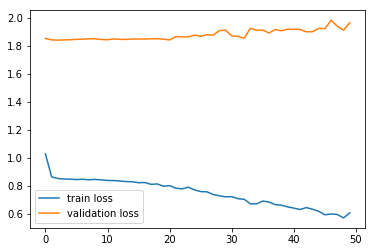

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147517934                                                 
MAE              8.434487  10.131428     7.724452   6.599400
RMSE            12.320263  14.488347    12.173424  11.496059
MAPE             0.157366   0.197378     0.070099   0.062103

array([ 65.471 ,  50.7   ,  45.004 , ...,   1.9354,   3.7704, -14.868 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.7223358796237833 38.834401923859836


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([1.66730169, 1.28694306, 1.14026899, 0.62412868, 0.57033617,
       0.93527034, 1.33455549])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: 1.2356 - val_loss: 1.0074
Epoch 2/50
459/459 [==============================] - 0s 402us/step - loss: 1.0006 - val_loss: 1.0004
Epoch 3/50
459/459 [==============================] - 0s 382us/step - loss: 0.9730 - val_loss: 1.0008
Epoch 4/50
459/459 [==============================] - 0s 425us/step - loss: 0.9629 - val_loss: 0.9941
Epoch 5/50
459/459 [==============================] - 0s 411us/step - loss: 0.9467 - val_loss: 0.9811
Epoch 6/50
459/459 [==============================] - 0s 379us/step - loss: 0.9214 - val_loss: 0.9622
Epoch 7/50
459/459 [==============================] - 0s 398us/step - loss: 0.8986 - val_loss: 0.9558
Epoch 8/50
459/459 [==============================] - 0s 424us/step - loss: 0.8903 - val_loss: 0.9349
Epoch 9/50
459/459 [==============================] - 0s 409us/step - loss: 0.8550 - val_loss: 0.9142
Epoch 10/50
459/459 [================

> Training Time :  21.535500049591064 s
dict_keys(['val_loss', 'loss'])


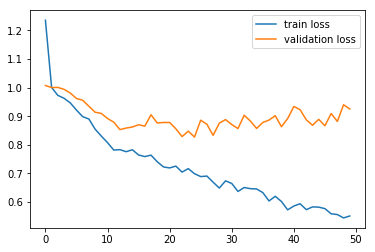

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147517939                                                 
MAE             20.912435  29.595225    41.337944  40.646540
RMSE            27.854544  38.717156    51.924281  52.945501
MAPE             0.264804   0.362732     0.274167   0.289702

array([-17.534 ,  -9.8923, -15.073 , ...,  15.508 ,  15.016 ,  15.591 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 147s 319ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 657us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 820us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 627us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 740us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 856us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 627us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 458us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 533us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 526us/step - loss: nan - val_lo

> Training Time :  158.88190698623657 s
dict_keys(['val_loss', 'loss'])


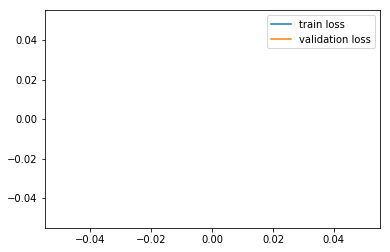

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN    4testFAR
T2147518104                                                  
MAE                   NaN  49.046437          NaN   95.587330
RMSE                  NaN  94.839416          NaN  183.880240
MAPE                  NaN   3.819645          NaN    4.358755

array([-1.7328 , -1.3888 , -0.94274, ..., -1.2567 ,  1.0374 , -0.4288 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.47452796941909986 6.473441640146415


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.34098214, -0.28784194, -0.21893578, -0.16413031, -0.00836463,
        0.00376338,  0.01114431])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 11s 24ms/step - loss: 1.1787 - val_loss: 1.0241
Epoch 2/50
459/459 [==============================] - 0s 369us/step - loss: 1.0070 - val_loss: 1.0233
Epoch 3/50
459/459 [==============================] - 0s 427us/step - loss: 0.9946 - val_loss: 1.0231
Epoch 4/50
459/459 [==============================] - 0s 391us/step - loss: 0.9872 - val_loss: 1.0121
Epoch 5/50
459/459 [==============================] - 0s 491us/step - loss: 0.9695 - val_loss: 0.9992
Epoch 6/50
459/459 [==============================] - 0s 473us/step - loss: 0.9728 - val_loss: 0.9936
Epoch 7/50
459/459 [==============================] - 0s 429us/step - loss: 0.9442 - val_loss: 0.9879
Epoch 8/50
459/459 [==============================] - 0s 407us/step - loss: 0.9129 - val_loss: 0.9833
Epoch 9/50
459/459 [==============================] - 0s 412us/step - loss: 0.9100 - val_loss: 0.9734
Epoch 10/50
459/459 [================

> Training Time :  23.365599155426025 s
dict_keys(['val_loss', 'loss'])


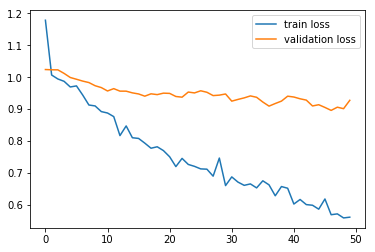

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147518357                                                
MAE              3.445433   4.457616     4.077558  4.283714
RMSE             4.767161   6.504138     5.552907  5.517858
MAPE             0.583155   2.785424     0.049413  0.051882

array([-27.707, -31.196, -29.149, ..., -11.127, -31.934, -25.321])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.07273636174726282 25.54432766852594


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.08181605, -1.21840215, -1.13826694, -1.61829523, -2.31833323,
       -2.13899792, -2.11410002])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 27ms/step - loss: 1.2585 - val_loss: 0.9817
Epoch 2/50
459/459 [==============================] - 0s 414us/step - loss: 1.0214 - val_loss: 0.9724
Epoch 3/50
459/459 [==============================] - 0s 497us/step - loss: 1.0046 - val_loss: 0.9726
Epoch 4/50
459/459 [==============================] - 0s 492us/step - loss: 1.0038 - val_loss: 0.9734
Epoch 5/50
459/459 [==============================] - 0s 467us/step - loss: 1.0016 - val_loss: 0.9736
Epoch 6/50
459/459 [==============================] - 0s 417us/step - loss: 0.9995 - val_loss: 0.9742
Epoch 7/50
459/459 [==============================] - 0s 455us/step - loss: 0.9973 - val_loss: 0.9764
Epoch 8/50
459/459 [==============================] - 0s 418us/step - loss: 0.9959 - val_loss: 0.9781
Epoch 9/50
459/459 [==============================] - 0s 489us/step - loss: 0.9939 - val_loss: 0.9736
Epoch 10/50
459/459 [================

> Training Time :  23.62130093574524 s
dict_keys(['val_loss', 'loss'])


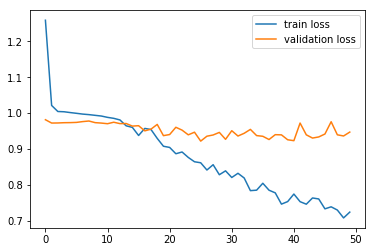

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147518504                                                 
MAE             16.232686  19.791567    20.320506  20.328840
RMSE            21.037375  25.523263    25.094329  24.980956
MAPE             0.713969   0.926317     0.683420   0.724156

array([ 6.3251,  4.143 ,  2.8851, ..., -3.4915, -4.5036, -4.6435])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6740417055959552 23.440856742880985


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.29858728,  0.20549768,  0.15183497, -0.03313268,  0.14008198,
        0.11308638,  0.17527694])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 14s 30ms/step - loss: 1.1775 - val_loss: 0.8561
Epoch 2/50
459/459 [==============================] - 0s 480us/step - loss: 1.0769 - val_loss: 0.8531
Epoch 3/50
459/459 [==============================] - 0s 463us/step - loss: 1.0449 - val_loss: 0.8531
Epoch 4/50
459/459 [==============================] - 0s 468us/step - loss: 1.0190 - val_loss: 0.8539
Epoch 5/50
459/459 [==============================] - 0s 524us/step - loss: 1.0150 - val_loss: 0.8541
Epoch 6/50
459/459 [==============================] - 0s 514us/step - loss: 1.0062 - val_loss: 0.8570
Epoch 7/50
459/459 [==============================] - 0s 723us/step - loss: 0.9713 - val_loss: 0.8602
Epoch 8/50
459/459 [==============================] - 0s 492us/step - loss: 0.9484 - val_loss: 0.8604
Epoch 9/50
459/459 [==============================] - 0s 608us/step - loss: 0.9523 - val_loss: 0.8673
Epoch 10/50
459/459 [================

> Training Time :  27.298694133758545 s
dict_keys(['val_loss', 'loss'])


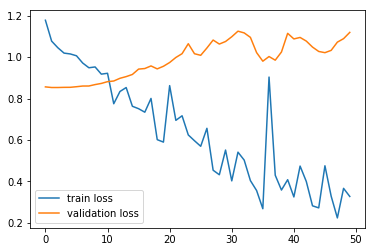

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN  4testFAR
T2147518521                                                
MAE              5.956157   7.189324     4.165056  4.591722
RMSE            13.175563  23.599188     7.143733  7.536558
MAPE             0.064013   0.073794     0.062423  0.068097

array([-2.827 , -1.2512, -1.1715, ...,  5.6622,  8.3342,  6.6468])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-0.6536228129957421 13.020158118721604


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.16692402, -0.04589631, -0.03977503,  0.14202768,  0.20564442,
        0.13560686, -0.06611112])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 13s 28ms/step - loss: 1.1040 - val_loss: 1.6374
Epoch 2/50
459/459 [==============================] - 0s 389us/step - loss: 0.9043 - val_loss: 1.6353
Epoch 3/50
459/459 [==============================] - 0s 407us/step - loss: 0.8944 - val_loss: 1.6341
Epoch 4/50
459/459 [==============================] - 0s 374us/step - loss: 0.8899 - val_loss: 1.6297
Epoch 5/50
459/459 [==============================] - 0s 388us/step - loss: 0.8866 - val_loss: 1.6258
Epoch 6/50
459/459 [==============================] - 0s 382us/step - loss: 0.8667 - val_loss: 1.6081
Epoch 7/50
459/459 [==============================] - 0s 384us/step - loss: 0.8658 - val_loss: 1.6007
Epoch 8/50
459/459 [==============================] - 0s 404us/step - loss: 0.8614 - val_loss: 1.5802
Epoch 9/50
459/459 [==============================] - 0s 383us/step - loss: 0.8388 - val_loss: 1.5662
Epoch 10/50
459/459 [================

> Training Time :  22.545495986938477 s
dict_keys(['val_loss', 'loss'])


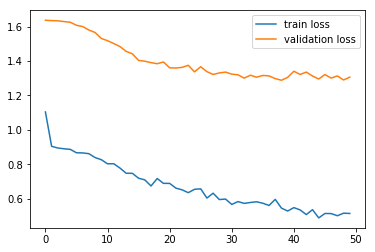

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147518540                                                 
MAE              6.007288   8.142303     9.253043   9.868342
RMSE             9.627726  13.106500    14.491214  15.245490
MAPE             0.083088   0.112249     0.103202   0.111580

array([ 70.876,  47.488,  92.402, ...,  75.321,  17.645, -34.476])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

5.6393926256462885 254.3635740462105


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 0.25646993,  0.1645228 ,  0.34109682, -0.00198964,  0.18165576,
        0.18535519,  0.30333198])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 17s 38ms/step - loss: 1.3255 - val_loss: 1.1824
Epoch 2/50
459/459 [==============================] - 0s 502us/step - loss: 0.9983 - val_loss: 1.1565
Epoch 3/50
459/459 [==============================] - 0s 447us/step - loss: 0.9857 - val_loss: 1.1560
Epoch 4/50
459/459 [==============================] - 0s 488us/step - loss: 0.9756 - val_loss: 1.1596
Epoch 5/50
459/459 [==============================] - 0s 511us/step - loss: 0.9590 - val_loss: 1.1549
Epoch 6/50
459/459 [==============================] - 0s 515us/step - loss: 0.9589 - val_loss: 1.1524
Epoch 7/50
459/459 [==============================] - 0s 441us/step - loss: 0.9389 - val_loss: 1.1469
Epoch 8/50
459/459 [==============================] - 0s 420us/step - loss: 0.9109 - val_loss: 1.1358
Epoch 9/50
459/459 [==============================] - 0s 457us/step - loss: 0.9109 - val_loss: 1.1178
Epoch 10/50
459/459 [================

> Training Time :  29.8833327293396 s
dict_keys(['val_loss', 'loss'])


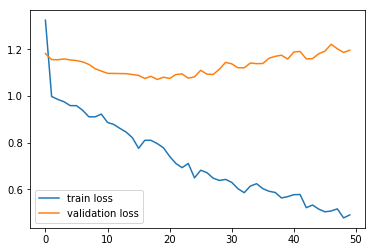

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147518948                                                   
MAE            111.291390  152.540128   250.704812  257.971779
RMSE           179.733692  255.674213   358.929685  370.192275
MAPE             0.862023    1.000949     0.335777    0.332834

array([-390.03 , -357.05 , -339.71 , ...,  -24.062,  -29.774,  -36.318])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

-6.6829342704455605 198.10315866149094


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-1.9350881 , -1.76860918, -1.68107903, -1.93448236, -2.43775551,
       -2.1957099 , -2.37763531])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 27ms/step - loss: 1.2006 - val_loss: 0.8986
Epoch 2/50
459/459 [==============================] - 0s 558us/step - loss: 1.0240 - val_loss: 0.8929
Epoch 3/50
459/459 [==============================] - 0s 827us/step - loss: 1.0157 - val_loss: 0.8916
Epoch 4/50
459/459 [==============================] - 0s 583us/step - loss: 1.0005 - val_loss: 0.8910
Epoch 5/50
459/459 [==============================] - 0s 563us/step - loss: 1.0031 - val_loss: 0.8889
Epoch 6/50
459/459 [==============================] - 0s 721us/step - loss: 1.0015 - val_loss: 0.8907
Epoch 7/50
459/459 [==============================] - 0s 581us/step - loss: 0.9952 - val_loss: 0.8905
Epoch 8/50
459/459 [==============================] - 0s 767us/step - loss: 0.9866 - val_loss: 0.8898
Epoch 9/50
459/459 [==============================] - 0s 508us/step - loss: 0.9707 - val_loss: 0.8869
Epoch 10/50
459/459 [================

> Training Time :  27.303825855255127 s
dict_keys(['val_loss', 'loss'])


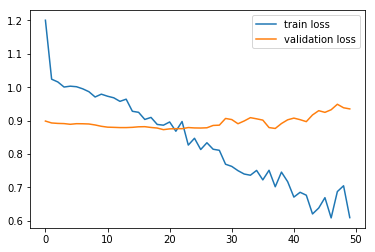

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147518969                                                   
MAE             98.557501  125.183721   196.539660  188.583279
RMSE           151.045971  198.365566   249.502276  242.922886
MAPE            29.566090   37.215943     0.502781    0.526821

array([-1.3148e+01, -1.1089e+00,  2.6355e-02, ..., -3.2025e+01,
       -1.1183e+01, -1.6766e+01])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 16s 35ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 467us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 562us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 432us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 434us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 453us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 394us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 428us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 461us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 499us/step - loss: nan - val_loss

> Training Time :  28.10570502281189 s
dict_keys(['val_loss', 'loss'])


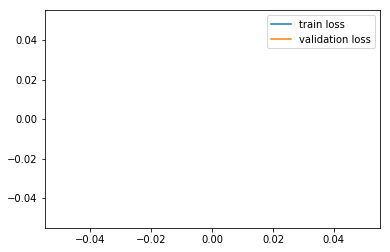

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147519157                                                   
MAE                   NaN   87.021851          NaN  218.781228
RMSE                  NaN  845.337448          NaN  821.771098
MAPE                  NaN    0.829992          NaN    0.479085

array([54.495, 38.009, 43.641, ..., 30.157, 29.306, 16.12 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

0.782762878406326 37.83893104640391


0.9999999999999999

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([ 1.41949668,  0.98380784,  1.13264926,  1.05141018,  0.88319718,
        0.59019207, -3.58764794])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 15s 34ms/step - loss: 1.2575 - val_loss: 1.3020
Epoch 2/50
459/459 [==============================] - 0s 677us/step - loss: 0.9745 - val_loss: 1.2801
Epoch 3/50
459/459 [==============================] - 0s 534us/step - loss: 0.9507 - val_loss: 1.2782
Epoch 4/50
459/459 [==============================] - 0s 526us/step - loss: 0.9516 - val_loss: 1.2789
Epoch 5/50
459/459 [==============================] - 0s 514us/step - loss: 0.9421 - val_loss: 1.2796
Epoch 6/50
459/459 [==============================] - 0s 548us/step - loss: 0.9394 - val_loss: 1.2803
Epoch 7/50
459/459 [==============================] - 0s 521us/step - loss: 0.9436 - val_loss: 1.2808
Epoch 8/50
459/459 [==============================] - 0s 547us/step - loss: 0.9390 - val_loss: 1.2813
Epoch 9/50
459/459 [==============================] - 0s 598us/step - loss: 0.9276 - val_loss: 1.2796
Epoch 10/50
459/459 [================

> Training Time :  28.46581792831421 s
dict_keys(['val_loss', 'loss'])


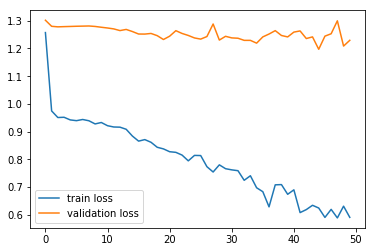

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN   4testFAR
T2147519183                                                 
MAE             19.620108  24.628426    22.802032  23.155527
RMSE            30.111430  37.805968    29.091055  29.537636
MAPE            10.433529  13.999421     0.099710   0.100802

array([ 56.827 , 154.55  , 124.01  , ...,  -3.9078,  18.333 , -12.818 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

nan nan


nan

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([nan, nan, nan, nan, nan, nan, nan])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 12s 26ms/step - loss: nan - val_loss: nan
Epoch 2/50
459/459 [==============================] - 0s 423us/step - loss: nan - val_loss: nan
Epoch 3/50
459/459 [==============================] - 0s 448us/step - loss: nan - val_loss: nan
Epoch 4/50
459/459 [==============================] - 0s 463us/step - loss: nan - val_loss: nan
Epoch 5/50
459/459 [==============================] - 0s 474us/step - loss: nan - val_loss: nan
Epoch 6/50
459/459 [==============================] - 0s 480us/step - loss: nan - val_loss: nan
Epoch 7/50
459/459 [==============================] - 0s 463us/step - loss: nan - val_loss: nan
Epoch 8/50
459/459 [==============================] - 0s 430us/step - loss: nan - val_loss: nan
Epoch 9/50
459/459 [==============================] - 0s 437us/step - loss: nan - val_loss: nan
Epoch 10/50
459/459 [==============================] - 0s 428us/step - loss: nan - val_loss

> Training Time :  22.720818996429443 s
dict_keys(['val_loss', 'loss'])


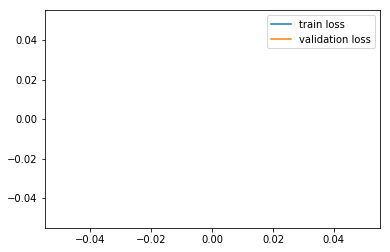

(541, 24)

(61, 24)

1trainFARCNN   2trainFAR  3testFARCNN    4testFAR
T2147519213                                                   
MAE                   NaN  223.204291          NaN  256.155464
RMSE                  NaN  331.710541          NaN  365.663310
MAPE                  NaN    0.260724          NaN    0.147782

array([-10.149  ,  -0.89682, -10.187  , ...,   3.2697 ,  -2.6907 ,
        -8.5993 ])

(13152, 1)

(1632, 1)

(24, 541)

(24, 61)

(24, 541)

(24, 61)

4.180675324791666 82.91401163658453


1.0

(541, 168)

(541, 24)

(61, 168)

(61, 24)

(541, 24, 7)

(61, 24, 7)

array([-0.17282574, -0.06123809, -0.17328405, -0.07437555, -0.1778068 ,
       -0.12751253, -0.17246392])

(541, 7, 24)

(61, 7, 24)

(541, 24, 7)

(61, 24, 7)

Train on 459 samples, validate on 82 samples
Epoch 1/50
459/459 [==============================] - 15s 32ms/step - loss: 1.3175 - val_loss: 0.4740
Epoch 2/50
459/459 [==============================] - 0s 475us/step - loss: 1.1373 - val_loss: 0.4667
Epoch 3/50
459/459 [==============================] - 0s 654us/step - loss: 1.0963 - val_loss: 0.4649
Epoch 4/50
459/459 [==============================] - 0s 512us/step - loss: 1.1022 - val_loss: 0.4642
Epoch 5/50
459/459 [==============================] - 0s 499us/step - loss: 1.0932 - val_loss: 0.4643
Epoch 6/50
459/459 [==============================] - 0s 503us/step - loss: 1.0861 - val_loss: 0.4650
Epoch 7/50
459/459 [==============================] - 0s 543us/step - loss: 1.0781 - val_loss: 0.4643
Epoch 8/50
459/459 [==============================] - 0s 518us/step - loss: 1.0725 - val_loss: 0.4650
Epoch 9/50
459/459 [==============================] - 0s 562us/step - loss: 1.0568 - val_loss: 0.4667
Epoch 10/50
459/459 [================

> Training Time :  38.67524790763855 s
dict_keys(['val_loss', 'loss'])


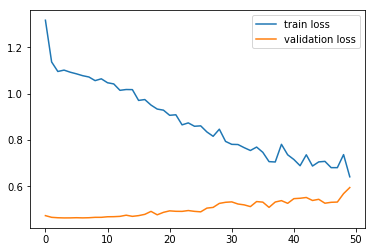

(541, 24)

(61, 24)

1trainFARCNN  2trainFAR  3testFARCNN    4testFAR
T2147519252                                                  
MAE             32.815655  41.833149    98.278376   97.892061
RMSE            62.518029  83.548551   151.160697  146.566812
MAPE             0.375621   0.398927     0.248982    0.261484

In [29]:
for index in range(200):

    node = node_list.iloc[index,0]

    path_res = 'data_FAR/'+ node + '_res.csv'

    path_yhat = 'data_FAR/'+ node + '_yhat.csv'

    path_original = 'data_reshape/'+node + '.csv'

    # load the dataset
    residual = pd.read_csv(path_res,header = None)
    yhat = pd.read_csv(path_yhat,header = None)

    residual = residual.values
    yhat = yhat.values

    predict = yhat-residual

    original = pd.read_csv(path_original,header = None)
    original = original.values[:,28:]

    data = residual
    data = data.T
    data = data.reshape(data.shape[0]*data.shape[1])
    data

    ## EDA

    # for i in range(24):
    #     plot_acf(residual[i,:],lags=30,title ='Hour %s'%(i+1));

    # for i in range(24):
    #     plot_pacf(residual[i,:],lags=30,title ='Hour %s'%(i+1));

    #plot_acf(data,lags=24*4);
    #plot_pacf(data,lags=24*4);

    ## Specific Settings

    timestep = 7
    predict_len = 24
    look_back = predict_len * timestep

    # Split into train and text data, train data 0.66 vs test data 0.34
    length = len(data)/predict_len
    train_len = int(length * 0.9)*predict_len

    train = data[:train_len]
    test = data[train_len-look_back:]

    train = train.reshape(-1, 1)
    test = test.reshape(-1,1)

    train.shape
    test.shape

    yhat_train = yhat[:,timestep:(train_len//24)]
    yhat_test = yhat[:,(train_len//24):]
    yhat_train.shape
    yhat_test.shape

    original_train = original[:,timestep:(train_len//24)]
    original_test = original[:,(train_len//24):]
    original_train.shape
    original_test.shape

    ## Normalize dataset



    moments = normalize_moments(train)

    train = normalize_fit(train,moments)
    test = normalize_fit(test,moments)



    # CNN

    train.std()

    trainX, trainY = create_dataset(train,look_back,predict_len)
    testX, testY = create_dataset(test,look_back,predict_len)
    trainX.shape
    trainY.shape
    testX.shape
    testY.shape

    # trainX[0]

    trainX = np.reshape(trainX, (trainX.shape[0], predict_len,timestep))
    testX = np.reshape(testX, (testX.shape[0], predict_len,timestep))
    trainX.shape
    testX.shape

    trainX[0,0,:]

    trainX = np.reshape(trainX, (trainX.shape[0], timestep, predict_len))
    testX = np.reshape(testX, (testX.shape[0],timestep, predict_len))
    trainX.shape
    testX.shape

    trainX = np.transpose(trainX, (0, 2, 1))
    testX = np.transpose(testX, (0, 2, 1))
    trainX.shape
    testX.shape

    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.layers import Embedding,Flatten
    from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

    model = Sequential()
    model.add(Conv1D(filters= 24,  kernel_size=2, strides = 1, activation='relu', input_shape=(predict_len, timestep)))
    model.add(MaxPooling1D(2, strides = 1))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(48,activation = 'relu'))
    model.add(Dropout(0.30))
    model.add(Dense(24))
    #model.add(Dense(24, activation='sigmoid'))

    # Log to tensorboard
    #tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
    # Compile model
    start = time.time()
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(trainX, trainY, epochs=50, batch_size=32,validation_split = 0.15)
    #history = model.fit(resampleX, resampleY, nb_epoch=100, batch_size=64,validation_split = 0.2) #
    Training_time = time.time() - start




    # Print the structure of the model
    #print(model.summary())
    plt.figure()
    print("> Training Time : ",Training_time,"s")
    print(history.history.keys())
    plt.plot(history.history['loss'],label = 'train loss')
    plt.plot(history.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show();

    ## Prediction
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    trainPredict = normalize_invert(trainPredict,moments)
    testPredict = normalize_invert(testPredict,moments)

    trainPredict.shape
    testPredict.shape

    trainPredict = trainPredict.T
    testPredict = testPredict.T

    trainPredict_final = yhat_train -trainPredict
    testPredict_final = yhat_test- testPredict

    f=open('180819/FARCNN_train_predict_0819.csv','ab')
    np.savetxt(f, trainPredict_final.T.reshape(1,-1), delimiter=",")
    f=open('180819/FARCNN_train_original_0819.csv','ab')
    np.savetxt(f, original_train.T.reshape(1,-1), delimiter=",")
    f=open('180819/FARCNN_test_predict_0819.csv','ab')
    np.savetxt(f, testPredict_final.T.reshape(1,-1), delimiter=",")
    f=open('180819/FARCNN_test_original_0819.csv','ab')
    np.savetxt(f, original_test.T.reshape(1,-1), delimiter=",") 
    
    trainResult = evaluation(trainPredict_final,original_train)

    trainFARResult=evaluation(yhat_train,original_train)

    testResult = evaluation(testPredict_final,original_test)

    testFARResult=evaluation(yhat_test,original_test)

    result = pd.DataFrame({'1trainFARCNN':trainResult,'2trainFAR':trainFARResult,'3testFARCNN':testResult,'4testFAR':testFARResult},index = ['MAE','RMSE','MAPE'])
    result.index.name = node
    result

    with open('180819/0819result_FARCNN.csv', 'a') as f:
        result.to_csv(f, header=True)

In [30]:
# trainPredict_final.shape
# original_train.shape
# testPredict_final.shape
# original_test.shape